# Load the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import time
import glob
import os
import pickle
from tqdm.notebook import tqdm
# Data Science Core Libraries
import pandas as pd
import numpy as np
# Model building
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# For Data handling
import json
# Imputation 
import sys
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',1500)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
import pickle
import gc
gc.collect()

0

# Load the Required Yelp Dataset
### Extracting only things that are required from the whole bunch

In [3]:
pwd

'C:\\Users\\rkumarrakeshkumar\\Desktop\\AI_Guild_Capstone_Project\\Yelp_Company_new'

In [ ]:
data_file = open(r"yelp_academic_dataset_business.json",encoding="utf8")
data1 = []
for line in data_file:
    data1.append(json.loads(line))
business_df = pd.DataFrame(data1)
data_file.close()

data_file = open(r"yelp_academic_dataset_review.json",encoding="utf8")
data1 = []
for line in data_file:
    data1.append(json.loads(line))
reviews_df = pd.DataFrame(data1)
data_file.close()

data_file = open(r"yelp_academic_dataset_tip.json",encoding="utf8")
data1 = []
for line in data_file:
    data1.append(json.loads(line))
tips_df = pd.DataFrame(data1)
data_file.close()


data_file = open(r"yelp_academic_dataset_user.json",encoding="utf8")
data1 = []
for line in data_file:
    data1.append(json.loads(line))
user_df = pd.DataFrame(data1)
data_file.close()

In [ ]:
print(business_df.shape)
print(business_df.columns)
print(business_df.info())

In [ ]:
print(reviews_df.shape)
print(reviews_df.columns)
print(reviews_df.info())

In [ ]:
print(tips_df.shape)
print(tips_df.columns)
print(tips_df.info())

In [ ]:
print(user_df.shape)
print(user_df.columns)
print(user_df.info())

In [ ]:
tips_df.head()

In [ ]:
business_df.head()

In [ ]:
reviews_df.head()

In [ ]:
user_df.head()

# Merging and Getting the Required Columns

In [ ]:
gc.collect()

In [ ]:
df = pd.merge(reviews_df,business_df[['business_id', 'name','city', 'state', 'postal_code', 'stars','attributes','categories']], left_on=['business_id'],right_on=['business_id'])
df.rename(columns={'stars_x':'review_stars','stars_y': 'overall_rest_rating'},inplace=True)
df.head()

In [ ]:
df = pd.merge(df,user_df[['user_id','average_stars','review_count']], left_on=['user_id'],right_on=['user_id'])
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.to_csv('master_df.csv',index=False)

In [ ]:
######################################### Thank You ###############################################################

# Yelp EDA

In [3]:
gc.collect()

0

In [ ]:
df.head()

In [ ]:
df.groupby(['postal_code']).agg({'review_id':'nunique'}).reset_index().sort_values(by='review_id',ascending=False)

In [ ]:
# The top 5 zip codes with most number of reviews are 
#     1) 70130-----LA----------Los Angeles
#     2) 19107-----PA----------Pennsylvania
#     3) 93101-----CA----------California
#     4) 19103-----MA and PA---Pennsylvania
#     5) 37203-----TN----------Tennessee

In [ ]:
print('The whole df shape is: ',df.shape)
sub_df = df[df.postal_code.isin(['70130','19107','19103'])]
print('The top 2 postal code has shape of: ',sub_df.shape)
print('The top 2 account for: ',(sub_df.shape[0]/df.shape[0])*100)

In [ ]:
## select all restaurants in USA
sub_rest_df1 = sub_df[sub_df['categories'].str.contains('Restaurants')]
sub_rest_df2 = sub_df[sub_df['categories'].str.contains(' Restaurants')]
only_rest_df = pd.concat([sub_rest_df1,sub_rest_df2],axis=0)
print(only_rest_df.shape)
print("Delta: ",(only_rest_df.shape[0]/sub_df.shape[0])*100)

In [ ]:
# Check If reviews are duplicated
only_rest_df.review_id.duplicated().sum()

In [ ]:
only_rest_df.drop_duplicates(subset=['review_id'], keep='last',inplace=True)
print(only_rest_df.shape)

In [ ]:
# select out  cuisine types and rest type of restaurants and rename the category
only_rest_df.is_copy=False
only_rest_df['rest_category']=pd.Series()
only_rest_df.loc[only_rest_df.categories.str.contains('American'),'rest_category'] = 'American'
only_rest_df.loc[only_rest_df.categories.str.contains('Mexican'), 'rest_category'] = 'Mexican'
only_rest_df.loc[only_rest_df.categories.str.contains('Italian'), 'rest_category'] = 'Italian'
only_rest_df.loc[only_rest_df.categories.str.contains('Japanese'), 'rest_category'] = 'Japanese'
only_rest_df.loc[only_rest_df.categories.str.contains('Chinese'), 'rest_category'] = 'Chinese'
only_rest_df.loc[only_rest_df.categories.str.contains('Thai'), 'rest_category'] = 'Thai'
only_rest_df.loc[only_rest_df.categories.str.contains('Mediterranean'), 'rest_category'] = 'Mediterranean'
only_rest_df.loc[only_rest_df.categories.str.contains('French'), 'rest_category'] = 'French'
only_rest_df.loc[only_rest_df.categories.str.contains('Vietnamese'), 'rest_category'] = 'Vietnamese'
only_rest_df.loc[only_rest_df.categories.str.contains('Greek'),'rest_category'] = 'Greek'
only_rest_df.loc[only_rest_df.categories.str.contains('Indian'),'rest_category'] = 'Indian'
only_rest_df.loc[only_rest_df.categories.str.contains('Korean'),'rest_category'] = 'Korean'
only_rest_df.loc[only_rest_df.categories.str.contains('Hawaiian'),'rest_category'] = 'Hawaiian'
only_rest_df.loc[only_rest_df.categories.str.contains('African'),'rest_category'] = 'African'
only_rest_df.loc[only_rest_df.categories.str.contains('Spanish'),'rest_category'] = 'Spanish'
only_rest_df.loc[only_rest_df.categories.str.contains('Middle_eastern'),'rest_category'] = 'Middle_eastern'
only_rest_df.loc[only_rest_df.categories.str.contains(' Middle Eastern'),'rest_category'] = 'Middle_eastern'
only_rest_df.loc[only_rest_df.categories.str.contains('Middle Eastern'),'rest_category'] = 'Middle_eastern'
only_rest_df.loc[only_rest_df.categories.str.contains(' Cajun/Creole'),'rest_category'] = 'Cajun_Creole'
only_rest_df.loc[only_rest_df.categories.str.contains('Cajun/Creole'),'rest_category'] = 'Cajun_Creole'

In [ ]:
## check missing values
only_rest_df.isnull().sum()/sub_df.shape[0]*100

In [ ]:
only_rest_df[only_rest_df.rest_category.isna()].shape

In [ ]:
other_cat = only_rest_df[only_rest_df.rest_category.isna()].categories.tolist()
word_dict = {}
for word in other_cat:
    in_words = word.split(',')
    for inner_words in in_words:
        if inner_words in word_dict.keys():
            word_dict[inner_words]+=1
        else:
            word_dict[inner_words]=1
words = {k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1],reverse=True)}
words

In [ ]:
# Drop these as they don't to belong to the mentioned cuisines
print("Before dropping: ",only_rest_df.shape)
sub_df = only_rest_df.dropna()
print("After dropping: ",sub_df.shape)
print("delta: ",(sub_df.shape[0]/only_rest_df.shape[0])*100)

In [ ]:
## check whether has duplicated business id
sub_df.review_id.duplicated().sum()

In [ ]:
sub_df[sub_df.rest_category.isna()].shape

In [ ]:
sub_df['num_words_review'] = sub_df.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

# Count Of Restaurant by Restaurant Type/Category

In [ ]:
plt.style.use('ggplot')

In [ ]:
plt.figure(figsize=(11,7))
grouped = sub_df.rest_category.value_counts()
sns.countplot(y='rest_category',data=sub_df, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('rest_category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(sub_df.rest_category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

In [ ]:
# Just Sorting as per required
sub_df.sort_values(by=['postal_code','business_id'],inplace=True)
sub_df.head()

# Number of rest in each City

In [ ]:
sub_df.city.value_counts(dropna=False)

In [ ]:
sub_df['city'] = sub_df['city'].str.replace('Philadephia','Philadelphia')
sub_df['city'] = sub_df['city'].str.replace('philadelphia','Philadelphia')
sub_df['city'] = sub_df['city'].str.replace('NEW ORLEANS','New Orleans')

In [ ]:
plt.figure(figsize=(11,6))
grouped = sub_df.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In [ ]:
sub_df.state.value_counts(dropna=False)

# Distribution Of reviews by Cuisine Type

In [ ]:
plt.figure(figsize=(11,7))
grouped = sub_df.groupby('rest_category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

# Top Restaurants with max reviews

In [ ]:
plt.figure(figsize=(11,6))
grouped = sub_df[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

In [ ]:
sub_df.head()

# Labelling reviews based on stars

In [ ]:
# label reviews as positive or negative
sub_df['labels'] = ''
sub_df.loc[sub_df.review_stars >=4, 'labels'] = 'positive'
sub_df.loc[sub_df.review_stars ==3, 'labels'] = 'neural'
sub_df.loc[sub_df.review_stars <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
sub_df.drop(sub_df[sub_df['labels'] =='neural'].index, axis=0, inplace=True)
sub_df.reset_index(drop=True, inplace=True)

sub_df.head()

In [ ]:
table = pd.pivot_table(sub_df, values=["review_id"], index=["rest_category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)

In [ ]:
table = pd.pivot_table(sub_df, values=["review_id"], index=["rest_category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplot(212)
grouped = sub_df.groupby('rest_category')['review_stars'].mean().round(2).sort_values(ascending=False)
sns.pointplot(grouped.index, grouped.values)
plt.ylim(3)
plt.xlabel('Catagory', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1)

# Average Length of Reviews in each category

In [ ]:
table = sub_df.groupby(['rest_category','labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)

# Rating Distribution

# Distribution of Rating by Restaurants

In [ ]:
plt.figure(figsize=(11,6))
grouped = sub_df.overall_rest_rating.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# Distributions of Ratings by reviews

In [ ]:
 plt.figure(figsize=(11,7))
grouped = sub_df.review_stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In [ ]:
sub_df['text'][1]

In [ ]:
sub_df.to_csv("Cleaned_dataset.csv",index=False)

In [ ]:
gc.collect()

# Here we have extracted and Processed some important variable for analysis
## Start here!!

In [3]:
sub_df = pd.read_csv("Cleaned_dataset.csv")
sub_df.head()

review_id                 user_id             business_id  \
0  ubI7YKxFK6cpJFZckFuSXw  8tG-VOcqZctOrhmhGIhsTg  -2-ih3mE8KPyeKVIzpBfPQ   
1  Yp_q9Xk7wOmzJyUORgunyg  ET8n-r7glWYqZhuR6GcdNw  -2-ih3mE8KPyeKVIzpBfPQ   
2  W22z4ikCGQpOVNY_VExZAg  wiIfZ8T2JdsRb8OKmdQj0Q  -2-ih3mE8KPyeKVIzpBfPQ   
3  tfpUXrLAzoVoq-5hrfBrbg  6EWf9mJbX7sz0hQTPlbfHw  -2-ih3mE8KPyeKVIzpBfPQ   
4  8I3ro0qCalaIyRQoP7kuJg  K17847uudqPFPIjSPgxs2A  -2-ih3mE8KPyeKVIzpBfPQ   

   review_stars  useful  funny  cool  \
0       4.00000       2      0     0   
1       5.00000      29     10    15   
2       2.00000       3      0     1   
3       5.00000       1      1     0   
4       2.00000       2      0     2   

                                                text                 date  \
0  Great view of the city. Sometimes it does get ...  2016-09-01 11:38:39   
1  My first visit to the SkyGarten was pretty gre...  2016-06-24 16:17:51   
2  I don't review many places but this place need...  2017-06-17 19:51:22   
3  My boyfriend had been wanting to take me here ...  2017-08-20 12:09:44   
4  There was much hype about the place before it ...  2016-08-27 20:11:29   

        name          city state  postal_code  overall_rest_rating  \
0  SkyGarten  Philadelphia    PA        19103              3.50000   
1  SkyGarten  Philadelphia    PA        19103              3.50000   
2  SkyGarten  Philadelphia    PA        19103              3.50000   
3  SkyGarten  Philadelphia    PA        19103              3.50000   
4  SkyGarten  Philadelphia    PA        19103              3.50000   

                                          attributes  \
0  {'BusinessAcceptsBitcoin': 'False', 'Ambience'...   
1  {'BusinessAcceptsBitcoin': 'False', 'Ambience'...   
2  {'BusinessAcceptsBitcoin': 'False', 'Ambience'...   
3  {'BusinessAcceptsBitcoin': 'False', 'Ambience'...   
4  {'BusinessAcceptsBitcoin': 'False', 'Ambience'...   

                                          categories  average_stars  \
0  American (Traditional), Bars, Restaurants, Nig...        4.18000   
1  American (Traditional), Bars, Restaurants, Nig...        4.05000   
2  American (Traditional), Bars, Restaurants, Nig...        4.25000   
3  American (Traditional), Bars, Restaurants, Nig...        4.11000   
4  American (Traditional), Bars, Restaurants, Nig...        3.69000   

   review_count rest_category  num_words_review    labels  
0           204      American                67  positive  
1          2256      American               226  positive  
2            24      American               335  negative  
3           121      American               175  positive  
4           530      American               131  negative

In [7]:
sub_df.rest_category.unique()

array(['American', 'Japanese', 'Italian', 'French', 'Mexican', 'Chinese',
       'Thai', 'Mediterranean', 'Korean', 'Greek', 'Middle_eastern',
       'Hawaiian', 'Vietnamese', 'Indian', 'Cajun_Creole', 'Spanish',
       'African'], dtype=object)

In [4]:
zipwise_rest = sub_df.groupby(['postal_code']).agg({'name':'unique'}).reset_index()
rest_19103 = zipwise_rest.iloc[0,1].tolist()
rest_19107 = zipwise_rest.iloc[1,1].tolist()
rest_70130 = zipwise_rest.iloc[2,1].tolist()
master_rest_name = rest_19103 + rest_19107 + rest_70130
print("We have a total of ",str(len(master_rest_name))+ " Restaurants")
print("Zipcode 19103 has : ",str(len(rest_19103)) + " Restaurants")
print("Zipcode 19107 has : ",str(len(rest_19107)) + " Restaurants")
print("Zipcode 70130 has : ",str(len(rest_70130)) + " Restaurants")

We have a total of  1053 Restaurants
Zipcode 19103 has :  290 Restaurants
Zipcode 19107 has :  386 Restaurants
Zipcode 70130 has :  377 Restaurants


# Working on Extracted Menu -  This was done by scrapping the Yelp website
The code for doing that is in a different notebook - YelpDataExtraction.ipynb

In [5]:
menu_data = pd.read_csv('Yelp_Menu_data.csv')
print(menu_data.shape)
menu_data.head()

(28460, 7)


Customer  ZipCode                 RestaurantType  \
0  Barbuzzo    19107  Mediterranean, Pizza, Italian   
1  Barbuzzo    19107  Mediterranean, Pizza, Italian   
2  Barbuzzo    19107  Mediterranean, Pizza, Italian   
3  Barbuzzo    19107  Mediterranean, Pizza, Italian   
4  Barbuzzo    19107  Mediterranean, Pizza, Italian   

                        Menu  \
0       Mediterranean Olives   
1            Whipped Ricotta   
2         Roasted Beet Salad   
3               Papas Fritas   
4  Butternut Squash Arancini   

                                     MenuDescription   Price  CityZipcode  
0                   Italian, Spanish, French olives.   $8.00        19103  
1  Olive oil, fig condiment, sicilian oregano, se...  $14.00        19103  
2  Goat cheese, orange, tuscan kale and pistachio...  $13.00        19103  
3  Crispy skin potato, roasted garlic aioli, smok...   $9.00        19103  
4           Fontina, roasted garlic aioli, Parmesan.  $12.00        19103

In [6]:
print(menu_data.shape)
menu_data = menu_data.drop_duplicates(['Customer','Menu'])
print(menu_data.shape)

(28460, 7)
(27089, 7)


In [7]:
menu_data.groupby(['ZipCode']).size().sort_values(ascending=False)

ZipCode
19107    9751
19103    8075
70130    2969
19102    2857
19130     709
19106     393
70116     384
19146     382
70112     355
70113     344
19104     234
70117     175
70115     166
70195      84
70119      70
19123      65
19147      52
70170      24
dtype: int64

In [8]:
# Trimming away numbers in Rest name of Scrapped data
menu_data['Customer'] = menu_data['Customer'].apply(lambda x: x.lstrip('0123456789-').lstrip(' '))
menu_data['Price'] = menu_data['Price'].apply(lambda x: x.lstrip('$').lstrip(' '))
menu_data['Price_num'] = menu_data['Price'].str.extract('(\d+)').astype(float)
menu_data.loc[menu_data.Price.str.contains('review|photo'), 'Price_num']= np.NaN
print(menu_data.shape)
# menu_data['Customer'].unique()

(27089, 8)


In [9]:
menu_data['Price'].unique().tolist()

['8.00',
 '14.00',
 '13.00',
 '9.00',
 '12.00',
 '16.00',
 '15.00',
 '18.00',
 '17.00',
 '22.00',
 '21.00',
 '25.00',
 '19.00',
 '27.00',
 '24.00',
 '10.00',
 '5.50',
 '23.00',
 '20.00',
 '11.00',
 '7.00',
 '6.00',
 '32.00',
 '28.00',
 '38.00',
 '35.00',
 '34.00',
 '40.00',
 '33.00',
 '31.00',
 '4.00',
 '130.00',
 '85.00',
 '5.00',
 '15.50',
 '0.24',
 '45.00',
 '29.00',
 '26.00',
 '42.00',
 '36.00',
 '63.00',
 '68.00',
 '39.00',
 '5.59',
 '7.79',
 '13.29',
 '3.39',
 '16.20',
 '31.20',
 '4.75',
 '5.40',
 '6.60',
 '7.80',
 '5.25',
 '5.99',
 '4.99',
 '7.95',
 '6.95',
 '8.95',
 '9.95',
 '10.25',
 '10.95',
 '9.59',
 '3.95',
 '15.95',
 '16.25',
 '14.25',
 '17.95',
 '16.95',
 '14.95',
 '14.59',
 '16.59',
 '3.00',
 '2.50',
 '1.50',
 '2.00',
 '5.95',
 '2.95',
 '13.95',
 '11.95',
 '1.00',
 '0.00',
 '14.91',
 '10.91',
 '13.31',
 '12.25',
 '14.38',
 '12.51',
 '43.00',
 '5.09',
 '5.48',
 '3.45',
 '3.17',
 '4.59',
 '4.50',
 '0.50',
 '13.50',
 '13.70',
 '16.90',
 '19.90',
 '15.90',
 '1 photo',
 'Roas

In [10]:
# Just for Check
menu_data[menu_data.Price=='8 photos']

Customer  ZipCode                       RestaurantType  \
2599   Real Food Eatery    19102  American (Traditional), Gluten-Free   
20231  Real Food Eatery    19102  American (Traditional), Gluten-Free   

             Menu MenuDescription     Price  CityZipcode  Price_num  
2599   Brown Rice      37 reviews  8 photos        19103        nan  
20231  Brown Rice      37 reviews  8 photos        19107        nan

In [11]:
# Just for Check
menu_data[menu_data.Price=='Black Belt $23.00']

Customer  ZipCode        RestaurantType               Menu  \
6647     Zama    19103  Sushi Bars, Japanese  Sashimi Appetizer   

                          MenuDescription              Price  CityZipcode  \
6647  9 piece of Chef's selection sashimi  Black Belt $23.00        19103   

      Price_num  
6647   23.00000

# Just checking out of all 1053 restaurant in the master_df, for how many of them do we have the Menu available!!

In [12]:
zipwise_menu_rest = menu_data.groupby(['CityZipcode']).agg({'Customer':'unique'}).reset_index()
rest_menu_19103 = zipwise_menu_rest.iloc[0,1].tolist()
rest_menu_19107 = zipwise_menu_rest.iloc[1,1].tolist()
rest_menu_70130 = zipwise_menu_rest.iloc[2,1].tolist()
master_rest_menu_available = rest_menu_19103 + rest_menu_19107 + rest_menu_70130
print("We have a total of ",str(len(master_rest_menu_available))+ " Restaurants")
print("Zipcode 19103 has : ",str(len(rest_menu_19103)) + " Restaurants")
print("Zipcode 19107 has : ",str(len(rest_menu_19107)) + " Restaurants")
print("Zipcode 70130 has : ",str(len(rest_menu_70130)) + " Restaurants")

We have a total of  372 Restaurants
Zipcode 19103 has :  138 Restaurants
Zipcode 19107 has :  141 Restaurants
Zipcode 70130 has :  93 Restaurants


In [13]:
full_counter = 0
full_rest_menu_name=[]
for i in master_rest_name:
    if i in master_rest_menu_available:
        full_counter = full_counter+1
        full_rest_menu_name.append(i)
print("We have found",str(full_counter)+" from a total of 1053 restaurants")

We have found 157 from a total of 1053 restaurants


In [14]:
counter = 0
rest_menu_name_19103 = []
for i in rest_19103:
    if i in rest_menu_19103:
        rest_menu_name_19103.append(i)
        counter = counter+1
print("WE have found ",str(counter))

WE have found  48


In [15]:
counter = 0
rest_menu_name_19107 = []
for i in rest_19107:
    if i in rest_menu_19107:
        rest_menu_name_19107.append(i)
        counter = counter+1
print("WE have found ",str(counter))

WE have found  67


In [16]:
counter = 0
rest_menu_name_70130 = []
for i in rest_70130:
    if i in rest_menu_70130:
        rest_menu_name_70130.append(i)
        counter = counter+1
print("WE have found ",str(counter))

WE have found  35


In [18]:
combo_list = rest_menu_name_19103 + rest_menu_name_19107 + rest_menu_name_70130
for z in full_rest_menu_name:
    if z not in combo_list:
        print(z)

BurgerFi
Barbuzzo
Marathon


In [17]:
menu_data.head()

Customer  ZipCode                 RestaurantType  \
0  Barbuzzo    19107  Mediterranean, Pizza, Italian   
1  Barbuzzo    19107  Mediterranean, Pizza, Italian   
2  Barbuzzo    19107  Mediterranean, Pizza, Italian   
3  Barbuzzo    19107  Mediterranean, Pizza, Italian   
4  Barbuzzo    19107  Mediterranean, Pizza, Italian   

                        Menu  \
0       Mediterranean Olives   
1            Whipped Ricotta   
2         Roasted Beet Salad   
3               Papas Fritas   
4  Butternut Squash Arancini   

                                     MenuDescription  Price  CityZipcode  \
0                   Italian, Spanish, French olives.   8.00        19103   
1  Olive oil, fig condiment, sicilian oregano, se...  14.00        19103   
2  Goat cheese, orange, tuscan kale and pistachio...  13.00        19103   
3  Crispy skin potato, roasted garlic aioli, smok...   9.00        19103   
4           Fontina, roasted garlic aioli, Parmesan.  12.00        19103   

   Price_num  
0    8.00000  
1   14.00000  
2   13.00000  
3    9.00000  
4   12.00000

In [18]:
print("Before NAN dropping Shape: ",menu_data.shape)
menu_data.dropna(inplace=True)
print("After NAN dropping Shape: ",menu_data.shape)

Before NAN dropping Shape:  (27089, 8)
After NAN dropping Shape:  (25658, 8)


In [19]:
menu_data['item_price_dict'] = menu_data['Menu'] + " : " + menu_data['Price_num'].astype('str')

In [20]:
new_menu_data = menu_data.groupby("Customer").agg(
        total_menu_items = pd.NamedAgg(column='Menu', aggfunc='count'),
        menu = pd.NamedAgg(column='Menu',aggfunc=','.join),
        menu_price_dict = pd.NamedAgg(column='item_price_dict',aggfunc=','.join),
        average_price = pd.NamedAgg(column='Price_num', aggfunc=np.mean),
        median_price = pd.NamedAgg(column='Price_num', aggfunc=np.median),
        min_price = pd.NamedAgg(column='Price_num', aggfunc='min'),
        max_price = pd.NamedAgg(column='Price_num', aggfunc='max'),
    ).reset_index()

new_menu_data

Customer  total_menu_items  \
0                                &pizza - Chestnut                12   
1                                    13 Restaurant                44   
2                                 1518 Bar & Grill                76   
3                                20th Street Pizza                19   
4                            4 Seasons Food Market               174   
5                                       Abe Fisher               176   
6                                    Abiha Kitchen                66   
7                                Acme Oyster House                55   
8                                         Adolfo’s                43   
9                                      Alice Pizza                65   
10                                      Almaz Cafe                32   
11                                      Alpen Rose                86   
12                     Amma’s South Indian Cuisine               304   
13                        Ancient Spirits & Grille                89   
14                                  Andy’s Chicken                11   
15                                     Animo Juice               222   
16                                         Aqimero                76   
17                          Atchafalaya Restaurant                23   
18                                         Ateethi                90   
19                               BRÜ Craft & Wurst                74   
20                         Backspace Bar & Kitchen                11   
21                                         Bai Wei               218   
22                                     Banana Leaf               221   
23                                  Bank & Bourbon                74   
24                                        Bao Nine                32   
25                                Bar-Ly Chinatown                 5   
26                                        Barbuzzo                51   
27                             Baroness On Baronne                11   
28                          Barra Rossa Ristorante               121   
29                                       Bayou Bar                44   
30                               Beck’s Cajun Cafe                56   
31                                Bistro SouthEast                58   
32                                  Bluestone Lane               213   
33                   Bluestone Lane - Philadelphia               202   
34                                      Bodega Bar                56   
35                                         Bonchon                65   
36                                      Bower Cafe                 9   
37                                 Bud & Marilyn’s               152   
38                                      Buena Onda                40   
39                                        BurgerFi                40   
40                                     Butcher Bar                67   
41                    Cafe Beignet on Royal Street                 7   
42                               Cafe Fleur De Lis                43   
43                         Cafe Porche and snowbar                22   
44                              Café at The Square               137   
45                         Cajun Mike’s Pub & Grub                34   
46                               Callahan’s Grille                10   
47                               Callowhill Greens                61   
48                                     Canto House               133   
49                          Capriccio Cafe and Bar                69   
50                                           Carmo                40   
51                         Cavanaugh’s Rittenhouse                59   
52                   Cayenne Nashville Hot Chicken                45   
53                                Central City BBQ                10   
54                            Charlie Was a Sinner               116   
55        

In [23]:
new_menu_data.to_csv("Rowwise_Menu_price_dict.csv",index=False)

# Merge the Menu data with the review dataset for each review against  
# particular restaurant's Menu

In [21]:
print("Original df: ",sub_df.shape)
new_sub_df = pd.merge(sub_df,new_menu_data,left_on=['name'],right_on=['Customer'])
print("After Merge: ",new_sub_df.shape)
new_sub_df.head()

Original df:  (294332, 21)
After Merge:  (87057, 29)


review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
2  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
3  __8pR8gkoFrU7pyy8p444Q  55fCofuKVb7XP3newzmX3w  0-JRAY0LpBazDuA9761U5w   
4  nSYDbTG_4gQahDFMifCNyg  6bxzJaXxGCqApmJsyIlr9w  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       4.00000       3      3     2   
2       4.00000       0      0     0   
3       4.00000       4      0     0   
4       5.00000       2      0     2   

                                                text                 date  \
0  What a bunch of baloney.\n\nCame here at 4:30p...  2018-07-15 15:33:08   
1  (to the sweet tune of Sia's "Elastic Heart")\n...  2015-07-16 19:06:03   
2  Great beer selection! Casual atmosphere and pi...  2016-02-23 21:27:10   
3  I came here for the pizza after dark night. Un...  2019-01-31 23:03:16   
4  Vetri never fails. Awesome, family-style seati...  2017-01-07 14:56:19   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
2  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
3  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
4  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
2  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
3  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
4  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        4.40000           440   
2  Salad, Italian, Pizza, Restaurants, Cafes        4.01000           198   
3  Salad, Italian, Pizza, Restaurants, Cafes        3.93000           354   
4  Salad, Italian, Pizza, Restaurants, Cafes        4.14000           143   

  rest_category  num_words_review    labels        Customer  total_menu_items  \
0       Italian               175  negative  Pizzeria Vetri                59   
1       Italian               516  positive  Pizzeria Vetri                59   
2       Italian               161  positive  Pizzeria Vetri                59   
3       Italian               153  positive  Pizzeria Vetri                59   
4       Italian               124  positive  Pizzeria Vetri                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
2  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
3  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
4  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
2  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
3  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
4  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  
0      13.00000    3.00000   34.00000  
1      13.00000    3.00000   34.00000  
2      13.00000    3.00000   34.00000  
3      13.00000    3.00000   34.00000  
4      13.00000    3.00000   34.00000

In [22]:
new_sub_df.isnull().sum()/new_sub_df.shape[0]*100

review_id             0.00000
user_id               0.00000
business_id           0.00000
review_stars          0.00000
useful                0.00000
funny                 0.00000
cool                  0.00000
text                  0.00000
date                  0.00000
name                  0.00000
city                  0.00000
state                 0.00000
postal_code           0.00000
overall_rest_rating   0.00000
attributes            0.00000
categories            0.00000
average_stars         0.00000
review_count          0.00000
rest_category         0.00000
num_words_review      0.00000
labels                0.00000
Customer              0.00000
total_menu_items      0.00000
menu                  0.00000
menu_price_dict       0.00000
average_price         0.00000
median_price          0.00000
min_price             0.00000
max_price             0.00000
dtype: float64

# EDA once we have the Menu attached to Reviews dataset

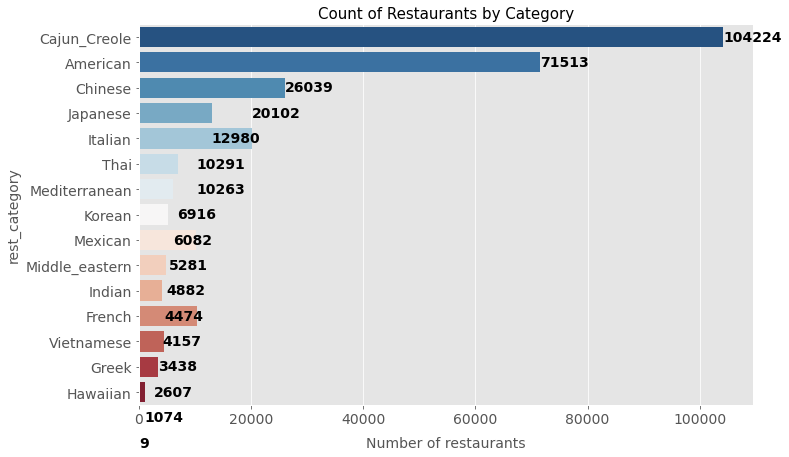

In [25]:
# Count of Restaurants by Category/Cuisine
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = new_sub_df.rest_category.value_counts()
sns.countplot(y='rest_category',data=sub_df, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('rest_category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(sub_df.rest_category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

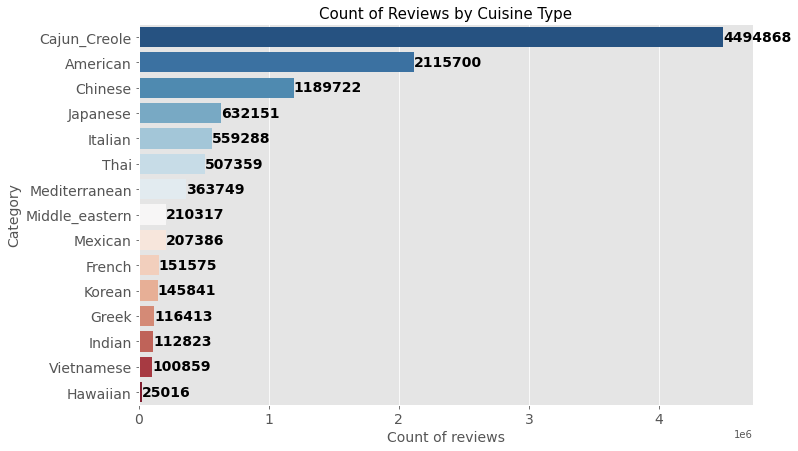

In [26]:
# Distribution of Review basis the Cuisine/Category type 
plt.figure(figsize=(11,7))
grouped = new_sub_df.groupby('rest_category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

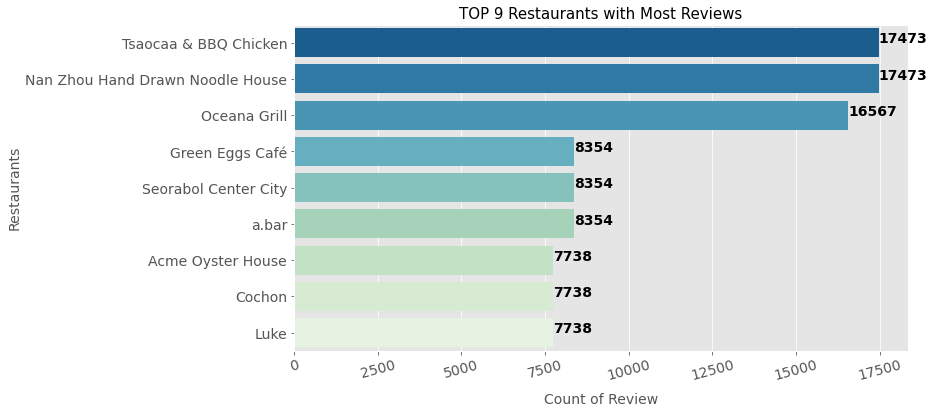

In [27]:
# Top Restaurant with Max reviews
plt.figure(figsize=(11,6))
grouped = new_sub_df[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

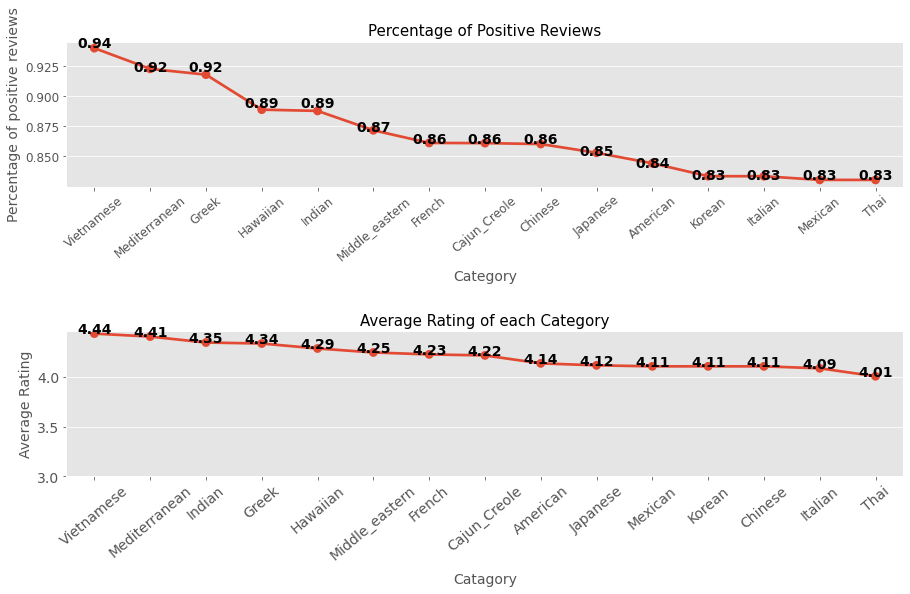

In [28]:
table = pd.pivot_table(new_sub_df, values=["review_id"], index=["rest_category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
table = pd.pivot_table(new_sub_df, values=["review_id"], index=["rest_category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplot(212)
grouped = new_sub_df.groupby('rest_category')['review_stars'].mean().round(2).sort_values(ascending=False)
sns.pointplot(grouped.index, grouped.values)
plt.ylim(3)
plt.xlabel('Catagory', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1)

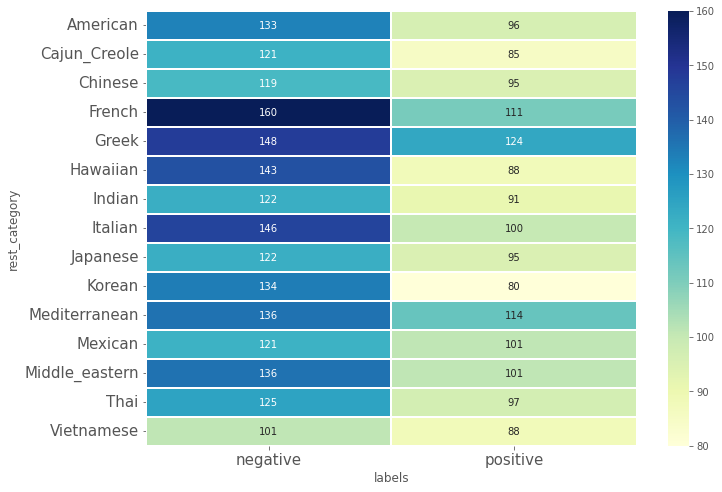

In [29]:
# Average length of Review
table = new_sub_df.groupby(['rest_category','labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)

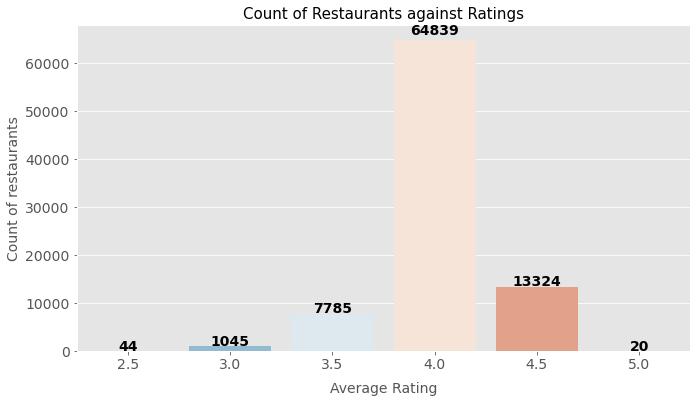

In [30]:
# Count of restaurants against thier average ratings
plt.figure(figsize=(11,6))
grouped = new_sub_df.overall_rest_rating.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

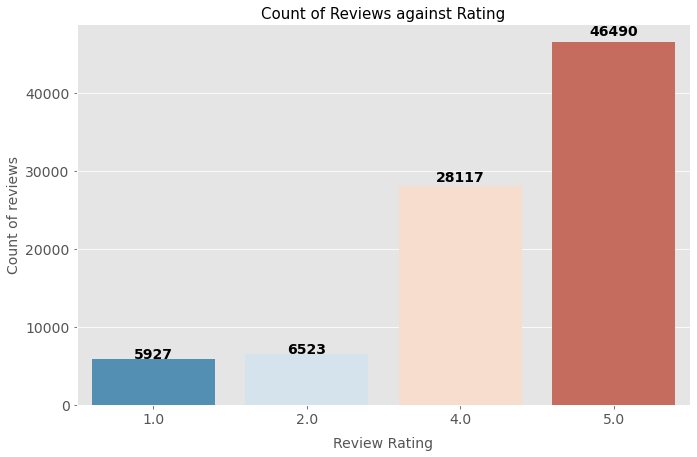

In [31]:
# Count of Ratings against reviews
plt.figure(figsize=(11,7))
grouped = new_sub_df.review_stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# Cleaning the Reviews

In [23]:
new_sub_df.head(3)

review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
2  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       4.00000       3      3     2   
2       4.00000       0      0     0   

                                                text                 date  \
0  What a bunch of baloney.\n\nCame here at 4:30p...  2018-07-15 15:33:08   
1  (to the sweet tune of Sia's "Elastic Heart")\n...  2015-07-16 19:06:03   
2  Great beer selection! Casual atmosphere and pi...  2016-02-23 21:27:10   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
2  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
2  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        4.40000           440   
2  Salad, Italian, Pizza, Restaurants, Cafes        4.01000           198   

  rest_category  num_words_review    labels        Customer  total_menu_items  \
0       Italian               175  negative  Pizzeria Vetri                59   
1       Italian               516  positive  Pizzeria Vetri                59   
2       Italian               161  positive  Pizzeria Vetri                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
2  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
2  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  
0      13.00000    3.00000   34.00000  
1      13.00000    3.00000   34.00000  
2      13.00000    3.00000   34.00000

# Steps for Cleaning the reviews
     1) Convert to Lowercase
     2) Replace with Expansions
     3) Remove Punctutation
     4) Remove URL and Tags

In [24]:
# 1) converting to Lowercase
new_sub_df['text'] = new_sub_df['text'].apply(lambda x: x.lower())

In [25]:
# Step-2 -Replace with Expansions
# creating a dictionary with contractions and their expansions
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"We'll":"We will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

# custom made function to convert contraction to expansion
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
# converting contraction to expansion in every row of the review column
new_sub_df['text'] = new_sub_df['text'].apply(lambda x:cont_to_exp(x))
new_sub_df.iloc[1,7]

'(to the sweet tune of sia\'s "elastic heart")\n\nand another patron bites the crust\noh why can i not take his \'za?\nand i know that i\'m still waiting for ours....\ncannot face this calzone without weapons.\n\nsure, they are just a fork and just a knife\nand i wish that one was sharper, yeah.\nbut another patron bites the crust\nyeah, let us be clear, i\'m going in....\n\nyou cannot beat this dough....\ni\'ll eat just one more piece.....\n\n\'cuz it is got crisp crust and the perfect cheese\nthough sometimes it may flop in the breeze\ntoppings can weight it down, this pizza\'s so thin\nso eat it fast and you will win\nget yourself a rotolooooo\nand bask in the glory of their dough.\n\nbask in the glory of their dough....\njust bask in the glory of their dough.\n\nok, now that that is out of the way: last night was my first jaunt to pizzeria vetri\'s alley location. nestled carefully on chancellor street, semi-stealthy that you sort of have to hunt it down, we traipsed in ready to tr

In [26]:
# Step-3) Remove Punctutation
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

new_sub_df['text']=new_sub_df['text'].apply(lambda z: remove_punctuations(z))
new_sub_df.iloc[1,7]

'to the sweet tune of sias elastic heart\n\nand another patron bites the crust\noh why can i not take his za\nand i know that im still waiting for ours\ncannot face this calzone without weapons\n\nsure they are just a fork and just a knife\nand i wish that one was sharper yeah\nbut another patron bites the crust\nyeah let us be clear im going in\n\nyou cannot beat this dough\nill eat just one more piece\n\ncuz it is got crisp crust and the perfect cheese\nthough sometimes it may flop in the breeze\ntoppings can weight it down this pizzas so thin\nso eat it fast and you will win\nget yourself a rotolooooo\nand bask in the glory of their dough\n\nbask in the glory of their dough\njust bask in the glory of their dough\n\nok now that that is out of the way last night was my first jaunt to pizzeria vetris alley location nestled carefully on chancellor street semistealthy that you sort of have to hunt it down we traipsed in ready to try one of everything except their were three of us so we d

In [27]:
# Step-4) Remove URL and Tags

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

new_sub_df['text']=new_sub_df['text'].apply(lambda z: remove_html(z))
new_sub_df['text']=new_sub_df['text'].apply(lambda z: remove_url(z))
new_sub_df.iloc[1,7]

'to the sweet tune of sias elastic heart\n\nand another patron bites the crust\noh why can i not take his za\nand i know that im still waiting for ours\ncannot face this calzone without weapons\n\nsure they are just a fork and just a knife\nand i wish that one was sharper yeah\nbut another patron bites the crust\nyeah let us be clear im going in\n\nyou cannot beat this dough\nill eat just one more piece\n\ncuz it is got crisp crust and the perfect cheese\nthough sometimes it may flop in the breeze\ntoppings can weight it down this pizzas so thin\nso eat it fast and you will win\nget yourself a rotolooooo\nand bask in the glory of their dough\n\nbask in the glory of their dough\njust bask in the glory of their dough\n\nok now that that is out of the way last night was my first jaunt to pizzeria vetris alley location nestled carefully on chancellor street semistealthy that you sort of have to hunt it down we traipsed in ready to try one of everything except their were three of us so we d

In [28]:
# Review
new_sub_df['text'] = new_sub_df.text.replace('\\n',' ', regex=True)
new_sub_df.iloc[2,7]

'great beer selection casual atmosphere and picnic table bench style seating we went very early for dinner so did not have to wait for a spot at all not sure what the normal wait time is   this place can be no frillsthey only have ice cream for dessert i am vegetarian and the only non meat pizzas i could order was the margherita pizza luckily it was fantastic i think they have slices as an option but i was starving and got a small pizza that i shared with my boyfriend he ordered a salad and tried to add chicken to which the waitress replied that they do not have chicken here note i still give this place 4 stars i think you just have to know what you are getting into the food is quality though so we will definitely be back   the pizza is baked in a wood oven so the crust had that crispy taste and smell which i love'

In [29]:
new_sub_df.head(3)

review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
2  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       4.00000       3      3     2   
2       4.00000       0      0     0   

                                                text                 date  \
0  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
1  to the sweet tune of sias elastic heart  and a...  2015-07-16 19:06:03   
2  great beer selection casual atmosphere and pic...  2016-02-23 21:27:10   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
2  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
2  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        4.40000           440   
2  Salad, Italian, Pizza, Restaurants, Cafes        4.01000           198   

  rest_category  num_words_review    labels        Customer  total_menu_items  \
0       Italian               175  negative  Pizzeria Vetri                59   
1       Italian               516  positive  Pizzeria Vetri                59   
2       Italian               161  positive  Pizzeria Vetri                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
2  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
2  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  
0      13.00000    3.00000   34.00000  
1      13.00000    3.00000   34.00000  
2      13.00000    3.00000   34.00000

In [30]:
new_sub_df.iloc[1,23]

'Crispy Brussels (Seasonal),Meatballs,Roasted Cauliflower (seasonal),Olives,Crispy Potatoes,Rotolo,Golden Beets,Italian Caesar Salad,Shaved Cauliflower Salad (seasonal),Woodgrain Bowl,Arugula Salad,Roasted Veg Bowl (seasonal),Fennel Sausage Calzone,Scarole Calzone,Broccoli Rabe Calzone (seasonal),12" Margherita Pizza,12" Pepperoni Pizza,12" Maurizio Pizza,12" Reggiano Pizza,12" Speck Pizza,12" Harvest Pizza (Seasonal),12" Wild Boar Pizza (Seasonal),12" Fennel Sausage Pizza,12" Shroom Pizza,12" Crudo Pizza,12" Spinach Pizza,12" Eggplant Pizza,28" Al Metro Pizza,Nutella Pizza,Tiramisu,Cannoli,Fried Pizza Dough with Nutella,Drinks,Rotolo,Meatballs,Neapolitan Breadsticks,Prosciutto & Burrata Board,Cauliflower,Golden Beets,Roasted Carrots,Olives,Spring Veg Bowl,Sesame Heirloom Salad,Strawberry Basil Salad,Italian Caesar,Arugula Salad,Sausage,Mushroom & Spinach,Meatball & Escarole,Lamb Meatball,Maurizio,Crudo,Spinach,Shroom,Eggplant,Fennel Sausage,Pepperoni,Margherita,Marinara'

In [31]:
new_sub_df.iloc[1,24]

'Crispy Brussels (Seasonal) : 7.0,Meatballs : 9.0,Roasted Cauliflower (seasonal) : 10.0,Olives : 5.0,Crispy Potatoes : 7.0,Rotolo : 5.0,Golden Beets : 8.0,Italian Caesar Salad : 10.0,Shaved Cauliflower Salad (seasonal) : 12.0,Woodgrain Bowl : 12.0,Arugula Salad : 9.0,Roasted Veg Bowl (seasonal) : 14.0,Fennel Sausage Calzone : 13.0,Scarole Calzone : 15.0,Broccoli Rabe Calzone (seasonal) : 14.0,12" Margherita Pizza : 14.0,12" Pepperoni Pizza : 17.0,12" Maurizio Pizza : 12.0,12" Reggiano Pizza : 12.0,12" Speck Pizza : 18.0,12" Harvest Pizza (Seasonal) : 14.0,12" Wild Boar Pizza (Seasonal) : 18.0,12" Fennel Sausage Pizza : 16.0,12" Shroom Pizza : 16.0,12" Crudo Pizza : 17.0,12" Spinach Pizza : 14.0,12" Eggplant Pizza : 14.0,28" Al Metro Pizza : 22.0,Nutella Pizza : 12.0,Tiramisu : 9.0,Cannoli : 4.0,Fried Pizza Dough with Nutella : 7.0,Drinks : 3.0,Rotolo : 5.0,Meatballs : 9.0,Neapolitan Breadsticks : 5.0,Prosciutto & Burrata Board : 16.0,Cauliflower : 10.0,Golden Beets : 8.0,Roasted Carrot

In [ ]:
new_sub_df.to_csv('data_with_menu.csv',index=False)

In [5]:
# Cleaned Reviews with Menu data attached Dataframe is available Here!!

In [6]:
new_sub_df = pd.read_csv('data_with_menu.csv')

In [7]:
new_sub_df.columns

Index(['review_id', 'user_id', 'business_id', 'review_stars', 'useful',
       'funny', 'cool', 'text', 'date', 'name', 'city', 'state', 'postal_code',
       'overall_rest_rating', 'attributes', 'categories', 'average_stars',
       'review_count', 'rest_category', 'num_words_review', 'labels',
       'Customer', 'total_menu_items', 'menu', 'menu_price_dict',
       'average_price', 'median_price', 'min_price', 'max_price'],
      dtype='object')

In [8]:
new_sub_df.drop(columns=['Customer'],inplace=True)
new_sub_df.head(2)

review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       4.00000       3      3     2   

                                                text                 date  \
0  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
1  to the sweet tune of sias elastic heart  and a...  2015-07-16 19:06:03   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        4.40000           440   

  rest_category  num_words_review    labels  total_menu_items  \
0       Italian               175  negative                59   
1       Italian               516  positive                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  
0      13.00000    3.00000   34.00000  
1      13.00000    3.00000   34.00000

In [9]:
new_sub_df.head()

review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
2  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
3  __8pR8gkoFrU7pyy8p444Q  55fCofuKVb7XP3newzmX3w  0-JRAY0LpBazDuA9761U5w   
4  nSYDbTG_4gQahDFMifCNyg  6bxzJaXxGCqApmJsyIlr9w  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       4.00000       3      3     2   
2       4.00000       0      0     0   
3       4.00000       4      0     0   
4       5.00000       2      0     2   

                                                text                 date  \
0  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
1  to the sweet tune of sias elastic heart  and a...  2015-07-16 19:06:03   
2  great beer selection casual atmosphere and pic...  2016-02-23 21:27:10   
3  i came here for the pizza after dark night unf...  2019-01-31 23:03:16   
4  vetri never fails awesome familystyle seating ...  2017-01-07 14:56:19   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
2  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
3  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
4  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
2  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
3  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
4  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        4.40000           440   
2  Salad, Italian, Pizza, Restaurants, Cafes        4.01000           198   
3  Salad, Italian, Pizza, Restaurants, Cafes        3.93000           354   
4  Salad, Italian, Pizza, Restaurants, Cafes        4.14000           143   

  rest_category  num_words_review    labels  total_menu_items  \
0       Italian               175  negative                59   
1       Italian               516  positive                59   
2       Italian               161  positive                59   
3       Italian               153  positive                59   
4       Italian               124  positive                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
2  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
3  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
4  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
2  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
3  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
4  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  
0      13.00000    3.00000   34.00000  
1      13.00000    3.00000   34.00000  
2      13.00000    3.00000   34.00000  
3      13.00000    3.00000   34.00000  
4      13.00000    3.00000   34.00000

In [12]:
menu_data.head()

Customer  ZipCode                 RestaurantType  \
0  Barbuzzo    19107  Mediterranean, Pizza, Italian   
1  Barbuzzo    19107  Mediterranean, Pizza, Italian   
2  Barbuzzo    19107  Mediterranean, Pizza, Italian   
3  Barbuzzo    19107  Mediterranean, Pizza, Italian   
4  Barbuzzo    19107  Mediterranean, Pizza, Italian   

                        Menu  \
0       Mediterranean Olives   
1            Whipped Ricotta   
2         Roasted Beet Salad   
3               Papas Fritas   
4  Butternut Squash Arancini   

                                     MenuDescription  Price  CityZipcode  \
0                   Italian, Spanish, French olives.   8.00        19103   
1  Olive oil, fig condiment, sicilian oregano, se...  14.00        19103   
2  Goat cheese, orange, tuscan kale and pistachio...  13.00        19103   
3  Crispy skin potato, roasted garlic aioli, smok...   9.00        19103   
4           Fontina, roasted garlic aioli, Parmesan.  12.00        19103   

   Price_num                   item_price_dict                  Menu_text  \
0    8.00000        Mediterranean Olives : 8.0       mediterranean olives   
1   14.00000            Whipped Ricotta : 14.0            whipped ricotta   
2   13.00000         Roasted Beet Salad : 13.0         roasted beet salad   
3    9.00000                Papas Fritas : 9.0               papas fritas   
4   12.00000  Butternut Squash Arancini : 12.0  butternut squash arancini   

                                MenuDescription_text  
0                      italian spanish french olives  
1  olive oil fig condiment sicilian oregano sea s...  
2  goat cheese orange tuscan kale and pistachio p...  
3  crispy skin potato roasted garlic aioli smoked...  
4              fontina roasted garlic aioli parmesan

# More Work on Menu and Menu Description

In [37]:
# 1) converting to Lowercase
menu_data['Menu_text'] = menu_data['Menu'].apply(lambda x: x.lower())
menu_data['MenuDescription_text'] =  menu_data['MenuDescription'].apply(lambda x: x.lower())

In [38]:
menu_data['Menu_text'] = menu_data['Menu_text'].apply(lambda z: remove_punctuations(z))
menu_data['Menu_text'] = menu_data['Menu_text'].apply(lambda z: remove_html(z))
menu_data['Menu_text'] = menu_data['Menu_text'].apply(lambda z: remove_url(z))
menu_data['Menu_text'] = menu_data['Menu_text'].str.replace('\d+', '')
menu_data['Menu_text'] = menu_data['Menu_text'].str.strip()

menu_data['MenuDescription_text']=menu_data['MenuDescription_text'].apply(lambda z: remove_punctuations(z))
menu_data['MenuDescription_text']=menu_data['MenuDescription_text'].apply(lambda z: remove_html(z))
menu_data['MenuDescription_text']=menu_data['MenuDescription_text'].apply(lambda z: remove_url(z))

In [39]:
menu_data.head()

Customer  ZipCode                 RestaurantType  \
0  Barbuzzo    19107  Mediterranean, Pizza, Italian   
1  Barbuzzo    19107  Mediterranean, Pizza, Italian   
2  Barbuzzo    19107  Mediterranean, Pizza, Italian   
3  Barbuzzo    19107  Mediterranean, Pizza, Italian   
4  Barbuzzo    19107  Mediterranean, Pizza, Italian   

                        Menu  \
0       Mediterranean Olives   
1            Whipped Ricotta   
2         Roasted Beet Salad   
3               Papas Fritas   
4  Butternut Squash Arancini   

                                     MenuDescription  Price  CityZipcode  \
0                   Italian, Spanish, French olives.   8.00        19103   
1  Olive oil, fig condiment, sicilian oregano, se...  14.00        19103   
2  Goat cheese, orange, tuscan kale and pistachio...  13.00        19103   
3  Crispy skin potato, roasted garlic aioli, smok...   9.00        19103   
4           Fontina, roasted garlic aioli, Parmesan.  12.00        19103   

   Price_num                   item_price_dict                  Menu_text  \
0    8.00000        Mediterranean Olives : 8.0       mediterranean olives   
1   14.00000            Whipped Ricotta : 14.0            whipped ricotta   
2   13.00000         Roasted Beet Salad : 13.0         roasted beet salad   
3    9.00000                Papas Fritas : 9.0               papas fritas   
4   12.00000  Butternut Squash Arancini : 12.0  butternut squash arancini   

                                MenuDescription_text  
0                      italian spanish french olives  
1  olive oil fig condiment sicilian oregano sea s...  
2  goat cheese orange tuscan kale and pistachio p...  
3  crispy skin potato roasted garlic aioli smoked...  
4              fontina roasted garlic aioli parmesan

In [40]:
# drop duplicates again
print(menu_data.shape)
menu_data = menu_data.drop_duplicates(['Customer','Menu'])
print(menu_data.shape)

(25658, 11)
(23237, 11)


In [41]:
test = menu_data[menu_data.Customer=='Pizzeria Vetri']
test

Customer  ZipCode         RestaurantType  \
2214  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2215  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2216  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2217  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2218  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2219  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2220  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2221  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2222  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2223  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2224  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2225  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2226  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2227  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2228  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2229  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2230  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2231  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2232  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2233  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2234  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2235  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2236  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2237  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2238  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2239  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2240  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2241  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2242  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2243  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2244  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2245  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
2246  Pizzeria Vetri    19103  Pizza, Italian, Cafes   
3238  Pizzeria Vetri    19130         Pizza, Italian   
3239  Pizzeria Vetri    19130         Pizza, Italian   
3240  Pizzeria Vetri    19130         Pizza, Italian   
3242  Pizzeria Vetri    19130         Pizza, Italian   
3244  Pizzeria Vetri    19130         Pizza, Italian   
3245  Pizzeria Vetri    19130         Pizza, Italian   
3246  Pizzeria Vetri    19130         Pizza, Italian   
3247  Pizzeria Vetri    19130         Pizza, Italian   
3249  Pizzeria Vetri    19130         Pizza, Italian   
3250  Pizzeria Vetri    19130         Pizza, Italian   
3251  Pizzeria Vetri    19130         Pizza, Italian   
3252  Pizzeria Vetri    19130         Pizza, Italian   
3253  Pizzeria Vetri    19130         Pizza, Italian   
3254  Pizzeria Vetri    19130         Pizza, Italian   
3255  Pizzeria Vetri    19130         Pizza, Italian   
3256  Pizzeria Vetri    19130         Pizza, Italian   
3257  Pizzeria Vetri    19130         Pizza, Italian   
3258  Pizzeria Vetri    19130         Pizza, Italian   
3259  Pizzeria Vetri    19130         Pizza, Italian   
3260  Pizzeria Vetri    19130         Pizza, Italian   
3261  Pizzeria Vetri    19130         Pizza, Italian   

                                     Menu  \
2214           Crispy Brussels (Seasonal)   
2215                            Meatballs   
2216       Roasted Cauliflower (seasonal)   
2217                               Olives   
2218                      Crispy Potatoes   
2219                               Rotolo   
2220                         Golden Beets   
2221                 Italian Caesar Salad   
2222  Shaved Cauliflower Salad (seasonal)   
2223                       Woodgrain Bowl   
2224                        Arugula Salad   
2225          Roasted Veg Bowl (seasonal)   
2226               Fennel Sausage Calzone   
2227                      Scarole Calzone   
2228     Broccoli Rabe Calzone (seasonal)   
2229                 12" Margherita Pizza   
2230                  12" Pepperoni Pizza   
2231                   12" Maurizio Pizza   
2232                   12" Reggiano Pizza   
2233                      12" S

In [42]:
menu_data.Menu_text.value_counts(dropna=False)

french fries                         46
caesar salad                         41
bottled water                        40
diet coke                            36
coke                                 32
                                     ..
spaghetti with veal parmesan          1
breakfast platter no meat             1
c rose milk tea                       1
roast duck and wonton noodle soup     1
cajun shrimp caesar salad             1
Name: Menu_text, Length: 17852, dtype: int64

In [43]:
menu_data.to_csv("Finalized_menu_Data.csv",index=False)

# Here is the Finalized Dataset with Cleaned Menu & Reviews 

In [10]:
menu_data = pd.read_csv('Finalized_menu_Data.csv')
menu_data.head(1)

Customer  ZipCode                 RestaurantType                  Menu  \
0  Barbuzzo    19107  Mediterranean, Pizza, Italian  Mediterranean Olives   

                    MenuDescription Price  CityZipcode  Price_num  \
0  Italian, Spanish, French olives.  8.00        19103    8.00000   

              item_price_dict             Menu_text  \
0  Mediterranean Olives : 8.0  mediterranean olives   

            MenuDescription_text  
0  italian spanish french olives

In [8]:
menu_data.shape

(28460, 7)

In [44]:
# Cleaned Menu data removing numbers at start & gaps
# requires data_with_menu(new sub df) and menu_data(finalized menu)

# Merge with parent df

In [94]:
print("Original df: ",new_sub_df.shape)
new_sub_df_2 = pd.merge(new_sub_df,menu_data[['Customer','Price_num','Menu_text','MenuDescription_text']],left_on=['name'],right_on=['Customer'])
print("After Merge: ",new_sub_df_2.shape)
new_sub_df_2.head(2)

# Original df:  (87057, 28)
# After Merge:  (5797132, 32)

Original df:  (87057, 28)
After Merge:  (5797132, 32)


review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       2.00000       2      2     1   

                                                text                 date  \
0  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
1  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   

  rest_category  num_words_review    labels  total_menu_items  \
0       Italian               175  negative                59   
1       Italian               175  negative                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price        Customer  Price_num  \
0      13.00000    3.00000   34.00000  Pizzeria Vetri    7.00000   
1      13.00000    3.00000   34.00000  Pizzeria Vetri    9.00000   

                  Menu_text                 MenuDescription_text  
0  crispy brussels seasonal          caper honey mustard parsley  
1                 meatballs  pork marinara parmigianaand parsley

In [95]:
new_sub_df_2.drop(columns=['Customer'],inplace=True)

In [96]:
new_sub_df_2['menu_item_list'] = new_sub_df_2['Menu_text'].str.split(' ')
new_sub_df_2.tail(1)

review_id                 user_id  \
5797131  QTTLIp5E60mXLxhWGSNc6Q  g7niYbBeXkmQ2jRdTy-9eA   

                    business_id  review_stars  useful  funny  cool  \
5797131  yKAOohng_AJl22LgjBPl1g       5.00000       0      0     0   

                                                      text  \
5797131  food is awesome this was first time dining her...   

                        date                   name         city state  \
5797131  2021-12-09 03:22:27  Gyu-Kaku Japanese BBQ  New Orleans    LA   

         postal_code  overall_rest_rating  \
5797131        70130              4.50000   

                                                attributes  \
5797131  {'RestaurantsAttire': "u'casual'", 'BusinessPa...   

                                            categories  average_stars  \
5797131  Asian Fusion, Japanese, Restaurants, Barbeque        5.00000   

         review_count rest_category  num_words_review    labels  \
5797131             1      Japanese                31  positive   

         total_menu_items                                               menu  \
5797131                75  Tuna Poke Nachos,Fried Calamari,Spicy Tuna Vol...   

                                           menu_price_dict  average_price  \
5797131  Tuna Poke Nachos : 9.0,Fried Calamari : 7.0,Sp...        7.02667   

         median_price  min_price  max_price  Price_num    Menu_text  \
5797131       7.00000    3.00000   24.00000    4.00000  corn butter   

        MenuDescription_text  menu_item_list  
5797131             1 review  [corn, butter]

In [ ]:
new_sub_df_2.to_csv("9thNovember_Processed_df.csv",index=False)
# Not able to execute because no disk space- # requires 54.1 GB spac

In [18]:
new_sub_df_2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5797132 entries, 0 to 5797131
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   review_id             object 
 1   user_id               object 
 2   business_id           object 
 3   review_stars          float64
 4   useful                int64  
 5   funny                 int64  
 6   cool                  int64  
 7   text                  object 
 8   date                  object 
 9   name                  object 
 10  city                  object 
 11  state                 object 
 12  postal_code           int64  
 13  overall_rest_rating   float64
 14  attributes            object 
 15  categories            object 
 16  average_stars         float64
 17  review_count          int64  
 18  rest_category         object 
 19  num_words_review      int64  
 20  labels                object 
 21  total_menu_items      int64  
 22  menu                  object 
 23  menu_pr

In [13]:
# Can't download this to Local because of Storage constraints

# Find duplicates in Menu Text

In [56]:
# This shows the whole menu for that restaurant
new_sub_df_2.iloc[0:53,29]
# No duplicates found----- Also assuming that roasted cauliflower seasonal is different from cauliflower

0              crispy brussels seasonal
1                             meatballs
2          roasted cauliflower seasonal
3                                olives
4                       crispy potatoes
5                                rotolo
6                          golden beets
7                  italian caesar salad
8     shaved cauliflower salad seasonal
9                        woodgrain bowl
10                        arugula salad
11            roasted veg bowl seasonal
12               fennel sausage calzone
13                      scarole calzone
14       broccoli rabe calzone seasonal
15                     margherita pizza
16                      pepperoni pizza
17                       maurizio pizza
18                       reggiano pizza
19                          speck pizza
20               harvest pizza seasonal
21             wild boar pizza seasonal
22                 fennel sausage pizza
23                         shroom pizza
24                          crudo pizza


In [57]:
new_sub_df_2.iloc[2,:]

review_id                                          GafzjBDaoNma2pHhc6MhwA
user_id                                            bJgfxs6_h5Tcp5anvdTtYQ
business_id                                        0-JRAY0LpBazDuA9761U5w
review_stars                                                      2.00000
useful                                                                  2
funny                                                                   2
cool                                                                    1
text                    what a bunch of baloney  came here at 430pm on...
date                                                  2018-07-15 15:33:08
name                                                       Pizzeria Vetri
city                                                         Philadelphia
state                                                                  PA
postal_code                                                         19103
overall_rest_rating                   

In [64]:
# First review
new_sub_df_2.iloc[1,7]

'what a bunch of baloney  came here at 430pm on a saturday the place was dead and pizza came out cold from the brick oven fireplace how inexperienced pizza spinners thats how  they only list two red wines on the menu for 9 bucks a pop when we asked if they had any other reds the waitress said we have one other i thinkseemed a bit odd at a place that is not cheap they give you such limited options  i am going to cut this review short but will say the bathroom which i never reference in reviews has a facet that looked like it was the cheapest facet any builder can install  you turn on the water and it does not turn off unless you spend about 4 minutes turning the knobs to the top this is foreshadowing for the meal you will about to receive a half assed meal for the full price presentation on the pizza was good the pizza you ask  charred cold not enough eggplant or pepperoni i will not be back'

# Find Similarity Scores

In [ ]:
import re
def word_search_func(row):
    output_list = []
    for single_item in row['menu_item_list']:
        if single_item in row['text']:
            output_list.append(1)
        else:
            output_list.append(0)
    return(sum(output_list)/len(output_list))
        
new_sub_df_2['Exact_match_list'] = new_sub_df_2.apply(word_search_func,axis=1)
new_sub_df_2.head()

In [ ]:
new_sub_df_2['Exact_match_list'].describe()

In [53]:
# This is Cross validation purpose
new_sub_df_2.head(53)

review_id                 user_id             business_id  \
0   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
2   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
3   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
4   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
5   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
6   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
7   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
8   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
9   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
10  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
11  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
12  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
13  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
14  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
15  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
16  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
17  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
18  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
19  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
20  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
21  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
22  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
23  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
24  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
25  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
26  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
27  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
28  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
29  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
30  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
31  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
32  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
33  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
34  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
35  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
36  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
37  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
38  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
39  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
40  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
41  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
42  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
43  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
44  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
45  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
46  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
47  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
48  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
49  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
50  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5T

In [ ]:
import re
from fuzzywuzzy import fuzz
def Fuzzy_word_search_func(row):
    output_list = []
    for single_item in row['menu_item_list']:
        output_list.append(fuzz.token_set_ratio(single_item,row['text']))
    return(sum(output_list)/(len(output_list)*100))
        
new_sub_df_2['Fuzzy_match_score'] = new_sub_df_2.apply(Fuzzy_word_search_func,axis=1)
new_sub_df_2.head()

In [55]:
new_sub_df_2.iloc[1,7]

'what a bunch of baloney  came here at 430pm on a saturday the place was dead and pizza came out cold from the brick oven fireplace how inexperienced pizza spinners thats how  they only list two red wines on the menu for 9 bucks a pop when we asked if they had any other reds the waitress said we have one other i thinkseemed a bit odd at a place that is not cheap they give you such limited options  i am going to cut this review short but will say the bathroom which i never reference in reviews has a facet that looked like it was the cheapest facet any builder can install  you turn on the water and it does not turn off unless you spend about 4 minutes turning the knobs to the top this is foreshadowing for the meal you will about to receive a half assed meal for the full price presentation on the pizza was good the pizza you ask  charred cold not enough eggplant or pepperoni i will not be back'

In [ ]:
##################### Checking if we were able to find these menu Items ##########################
# calzone,
# rotolooooo,
# pizzas, 
# 1 pizza al taglio,
# 2 salsiccia  fennel sausage
# 3 calzone  ricotta prosciutto cotto tomato sauce  the pizza al taglio
# salsiccia 

In [56]:
new_sub_df_2.iloc[54,7]

'to the sweet tune of sias elastic heart  and another patron bites the crust oh why can i not take his za and i know that im still waiting for ours cannot face this calzone without weapons  sure they are just a fork and just a knife and i wish that one was sharper yeah but another patron bites the crust yeah let us be clear im going in  you cannot beat this dough ill eat just one more piece  cuz it is got crisp crust and the perfect cheese though sometimes it may flop in the breeze toppings can weight it down this pizzas so thin so eat it fast and you will win get yourself a rotolooooo and bask in the glory of their dough  bask in the glory of their dough just bask in the glory of their dough  ok now that that is out of the way last night was my first jaunt to pizzeria vetris alley location nestled carefully on chancellor street semistealthy that you sort of have to hunt it down we traipsed in ready to try one of everything except their were three of us so we decided to try one of thre

In [57]:
new_sub_df_2.head(53)

review_id                 user_id             business_id  \
0   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
2   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
3   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
4   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
5   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
6   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
7   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
8   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
9   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
10  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
11  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
12  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
13  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
14  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
15  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
16  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
17  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
18  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
19  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
20  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
21  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
22  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
23  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
24  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
25  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
26  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
27  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
28  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
29  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
30  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
31  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
32  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
33  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
34  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
35  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
36  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
37  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
38  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
39  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
40  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
41  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
42  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
43  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
44  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
45  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
46  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
47  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
48  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
49  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
50  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5T

In [ ]:
# calzone,
# rotolooooo,
# pizzas, 
# 1 pizza al taglio,
# 2 salsiccia  fennel sausage
# 3 calzone  ricotta prosciutto cotto tomato sauce  the pizza al taglio
# salsiccia 

In [58]:
new_sub_df_2.loc[54:107,:]

review_id                 user_id             business_id  \
54   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
55   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
56   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
57   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
58   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
59   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
60   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
61   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
62   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
63   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
64   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
65   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
66   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
67   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
68   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
69   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
70   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
71   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
72   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
73   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
74   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
75   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
76   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
77   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
78   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
79   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
80   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
81   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
82   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
83   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
84   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
85   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
86   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
87   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
88   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
89   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
90   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
91   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
92   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
93   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
94   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
95   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
96   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
97   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
98   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
99   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
100  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
101  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
102  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
103  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA

In [59]:
new_sub_df_2['weighted_menu_list'] = ((new_sub_df_2['Exact_match_list']*0.50)+(new_sub_df_2['Fuzzy_match_score']*0.50))
new_sub_df_2.head(53)

review_id                 user_id             business_id  \
0   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
2   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
3   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
4   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
5   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
6   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
7   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
8   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
9   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
10  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
11  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
12  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
13  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
14  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
15  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
16  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
17  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
18  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
19  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
20  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
21  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
22  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
23  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
24  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
25  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
26  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
27  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
28  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
29  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
30  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
31  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
32  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
33  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
34  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
35  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
36  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
37  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
38  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
39  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
40  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
41  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
42  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
43  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
44  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
45  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
46  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
47  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
48  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
49  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
50  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5T

In [60]:
new_sub_df_2.loc[54:107,:]

review_id                 user_id             business_id  \
54   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
55   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
56   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
57   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
58   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
59   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
60   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
61   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
62   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
63   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
64   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
65   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
66   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
67   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
68   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
69   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
70   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
71   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
72   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
73   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
74   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
75   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
76   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
77   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
78   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
79   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
80   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
81   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
82   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
83   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
84   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
85   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
86   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
87   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
88   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
89   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
90   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
91   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
92   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
93   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
94   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
95   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
96   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
97   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
98   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
99   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
100  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
101  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
102  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
103  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA

In [61]:
new_sub_df_2.loc[54:107,:]

review_id                 user_id             business_id  \
54   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
55   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
56   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
57   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
58   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
59   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
60   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
61   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
62   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
63   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
64   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
65   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
66   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
67   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
68   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
69   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
70   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
71   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
72   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
73   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
74   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
75   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
76   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
77   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
78   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
79   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
80   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
81   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
82   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
83   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
84   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
85   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
86   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
87   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
88   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
89   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
90   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
91   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
92   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
93   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
94   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
95   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
96   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
97   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
98   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
99   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
100  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
101  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
102  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
103  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA

In [62]:
new_sub_df_2.iloc[108,7]

'great beer selection casual atmosphere and picnic table bench style seating we went very early for dinner so did not have to wait for a spot at all not sure what the normal wait time is   this place can be no frillsthey only have ice cream for dessert i am vegetarian and the only non meat pizzas i could order was the margherita pizza luckily it was fantastic i think they have slices as an option but i was starving and got a small pizza that i shared with my boyfriend he ordered a salad and tried to add chicken to which the waitress replied that they do not have chicken here note i still give this place 4 stars i think you just have to know what you are getting into the food is quality though so we will definitely be back   the pizza is baked in a wood oven so the crust had that crispy taste and smell which i love'

In [63]:
new_sub_df_2.loc[108:161,:]

review_id                 user_id             business_id  \
108  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
109  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
110  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
111  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
112  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
113  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
114  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
115  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
116  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
117  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
118  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
119  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
120  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
121  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
122  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
123  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
124  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
125  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
126  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
127  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
128  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
129  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
130  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
131  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
132  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
133  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
134  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
135  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
136  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
137  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
138  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
139  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
140  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
141  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
142  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
143  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
144  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
145  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
146  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
147  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
148  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
149  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
150  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
151  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
152  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
153  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
154  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
155  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
156  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA9761U5w   
157  sC_uokC-aRTv3azB4u8Q1w  tVjZsrpIldh3P-1tHECaug  0-JRAY0LpBazDuA

In [64]:
new_sub_df_2.head(53)

review_id                 user_id             business_id  \
0   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
2   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
3   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
4   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
5   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
6   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
7   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
8   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
9   GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
10  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
11  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
12  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
13  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
14  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
15  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
16  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
17  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
18  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
19  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
20  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
21  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
22  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
23  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
24  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
25  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
26  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
27  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
28  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
29  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
30  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
31  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
32  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
33  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
34  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
35  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
36  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
37  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
38  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
39  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
40  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
41  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
42  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
43  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
44  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
45  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
46  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
47  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
48  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
49  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
50  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5T

# Here we say that if we were able to find Exact match then raise the score of Fuzzy match to same level

In [ ]:
################################# Important Step ##############################################
new_sub_df_2['weighted_menu_list'] = np.where(new_sub_df_2['Exact_match_list']==1, 1,new_sub_df_2['weighted_menu_list'])
new_sub_df_2.head(53)

In [78]:
new_sub_df_2.loc[54:107,:]
# calzone,
# rotolooooo,
# pizzas, 
# 1 pizza al taglio,
# 2 salsiccia  fennel sausage
# 3 calzone  ricotta prosciutto cotto tomato sauce  the pizza al taglio
# salsiccia 

review_id                 user_id             business_id  \
54   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
55   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
56   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
57   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
58   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
59   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
60   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
61   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
62   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
63   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
64   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
65   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
66   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
67   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
68   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
69   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
70   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
71   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
72   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
73   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
74   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
75   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
76   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
77   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
78   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
79   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
80   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
81   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
82   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
83   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
84   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
85   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
86   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
87   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
88   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
89   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
90   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
91   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
92   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
93   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
94   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
95   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
96   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
97   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
98   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
99   lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
100  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
101  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
102  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA9761U5w   
103  lvrASSEkV4hEAP7sS9bMLw  ryisT19-tzvMyVVi0iLvwA  0-JRAY0LpBazDuA

In [66]:
new_sub_df_2.weighted_menu_list.describe()

count   5797132.00000
mean          0.13560
std           0.19245
min           0.00000
25%           0.01667
50%           0.03300
75%           0.20500
max           1.00000
Name: weighted_menu_list, dtype: float64

# Lets keep a Threshold of 0.51 in order to capture all the things sold as it  was talked in the review

In [ ]:
#################### For Threshold as 50 ############################
print("Before removing non sold items: ",new_sub_df_2.shape)
sold_item_df = new_sub_df_2[new_sub_df_2.weighted_menu_list>0.51]
print("After removing non sold items: ",sold_item_df.shape)
# Before removing non sold items:  (5797132, 35)
# After removing non sold items:  (64857, 35)
# to be required
# Before removing non sold items:  (5797132, 35)
# After removing non sold items:  (277083, 35)

In [81]:
#################### For Threshold as 80 ############################
print("Before removing non sold items: ",new_sub_df_2.shape)
sold_item_df2 = new_sub_df_2[new_sub_df_2.weighted_menu_list>0.80000]
print("After removing non sold items: ",sold_item_df2.shape)
####################### Just for checking ##########################

Before removing non sold items:  (5797132, 35)
After removing non sold items:  (78453, 35)


In [68]:
sold_item_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277083 entries, 16 to 5797029
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_id             277083 non-null  object 
 1   user_id               277083 non-null  object 
 2   business_id           277083 non-null  object 
 3   review_stars          277083 non-null  float64
 4   useful                277083 non-null  int64  
 5   funny                 277083 non-null  int64  
 6   cool                  277083 non-null  int64  
 7   text                  277083 non-null  object 
 8   date                  277083 non-null  object 
 9   name                  277083 non-null  object 
 10  city                  277083 non-null  object 
 11  state                 277083 non-null  object 
 12  postal_code           277083 non-null  int64  
 13  overall_rest_rating   277083 non-null  float64
 14  attributes            277083 non-null  object 
 15

In [84]:
sold_item_df.to_csv("Sold_item_df_51.csv",index=False)

# Here we have the most sold items across the 3 postal codes

In [11]:
sold_item_df = pd.read_csv('Sold_item_df_51.csv')

In [12]:
sold_item_df.head(4)

review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
2  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
3  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       2.00000       2      2     1   
2       2.00000       2      2     1   
3       2.00000       2      2     1   

                                                text                 date  \
0  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
1  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
2  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
3  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
2  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
3  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
2  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
3  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
2  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
3  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   

  rest_category  num_words_review    labels  total_menu_items  \
0       Italian               175  negative                59   
1       Italian               175  negative                59   
2       Italian               175  negative                59   
3       Italian               175  negative                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
2  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
3  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
2  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
3  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  Price_num        Menu_text  \
0      13.00000    3.00000   34.00000   17.00000  pepperoni pizza   
1      13.00000    3.00000   34.00000   14.00000   eggplant pizza   
2      13.00000    3.00000   34.00000   26.00000         eggplant   
3      13.00000    3.00000   34.00000   32.00000        pepperoni   

                                MenuDescription_text          menu_item_list  \
0  pepperoni tomato sauce mozarella and oregano s...  ['pepperoni', 'pizza']   
1  eggplant crushed san marzano tomatoes straccia...   ['eggplant', 'pizza']   
2  crushed san marzano tomatoes stracciatella che...            ['eggplant']   
3              tomato sauce mozzarella fresh oregano           ['pepperoni']   

   Exact_match_list  Fuzzy_match_score  weighted_menu_list  
0           1.00000            1.00000             1.00000  
1           1.00000            1.00000             1.00000  
2           1.00000            1.00000             1.00000  
3           1.00000            1.00000        

In [22]:
sold_item_df.postal_code.unique()

array([19103, 19107, 70130], dtype=int64)

In [13]:
print(sold_item_df.shape)
sold_item_df.head(3)

(277083, 35)


review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
2  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       2.00000       2      2     1   
2       2.00000       2      2     1   

                                                text                 date  \
0  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
1  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
2  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
2  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
2  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
2  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   

  rest_category  num_words_review    labels  total_menu_items  \
0       Italian               175  negative                59   
1       Italian               175  negative                59   
2       Italian               175  negative                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
2  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
2  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  Price_num        Menu_text  \
0      13.00000    3.00000   34.00000   17.00000  pepperoni pizza   
1      13.00000    3.00000   34.00000   14.00000   eggplant pizza   
2      13.00000    3.00000   34.00000   26.00000         eggplant   

                                MenuDescription_text          menu_item_list  \
0  pepperoni tomato sauce mozarella and oregano s...  ['pepperoni', 'pizza']   
1  eggplant crushed san marzano tomatoes straccia...   ['eggplant', 'pizza']   
2  crushed san marzano tomatoes stracciatella che...            ['eggplant']   

   Exact_match_list  Fuzzy_match_score  weighted_menu_list  
0           1.00000            1.00000             1.00000  
1           1.00000            1.00000             1.00000  
2           1.00000            1.00000             1.00000

In [14]:
sold_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277083 entries, 0 to 277082
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_id             277083 non-null  object 
 1   user_id               277083 non-null  object 
 2   business_id           277083 non-null  object 
 3   review_stars          277083 non-null  float64
 4   useful                277083 non-null  int64  
 5   funny                 277083 non-null  int64  
 6   cool                  277083 non-null  int64  
 7   text                  277083 non-null  object 
 8   date                  277083 non-null  object 
 9   name                  277083 non-null  object 
 10  city                  277083 non-null  object 
 11  state                 277083 non-null  object 
 12  postal_code           277083 non-null  int64  
 13  overall_rest_rating   277083 non-null  float64
 14  attributes            277083 non-null  object 
 15  

# Working on some Blank Columns and renaming them based on other dishes with same description

In [ ]:
sold_item_df[sold_item_df.Menu_text.str.contains('bienville')].shape

In [16]:
sold_item_df['Menu_text'] = np.where(sold_item_df['Menu_text']=='','tuna salamon',sold_item_df['Menu_text'])
sold_item_df['Menu_text'] = np.where(sold_item_df['Exact_match_list']=='','bienville',sold_item_df['Menu_text'])

In [17]:
sold_item_df.head(2)

review_id                 user_id             business_id  \
0  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   
1  GafzjBDaoNma2pHhc6MhwA  bJgfxs6_h5Tcp5anvdTtYQ  0-JRAY0LpBazDuA9761U5w   

   review_stars  useful  funny  cool  \
0       2.00000       2      2     1   
1       2.00000       2      2     1   

                                                text                 date  \
0  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   
1  what a bunch of baloney  came here at 430pm on...  2018-07-15 15:33:08   

             name          city state  postal_code  overall_rest_rating  \
0  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   
1  Pizzeria Vetri  Philadelphia    PA        19103              4.00000   

                                          attributes  \
0  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
1  {'GoodForKids': 'True', 'RestaurantsPriceRange...   

                                  categories  average_stars  review_count  \
0  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   
1  Salad, Italian, Pizza, Restaurants, Cafes        3.43000           284   

  rest_category  num_words_review    labels  total_menu_items  \
0       Italian               175  negative                59   
1       Italian               175  negative                59   

                                                menu  \
0  Crispy Brussels (Seasonal),Meatballs,Roasted C...   
1  Crispy Brussels (Seasonal),Meatballs,Roasted C...   

                                     menu_price_dict  average_price  \
0  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   
1  Crispy Brussels (Seasonal) : 7.0,Meatballs : 9...       14.11864   

   median_price  min_price  max_price  Price_num        Menu_text  \
0      13.00000    3.00000   34.00000   17.00000  pepperoni pizza   
1      13.00000    3.00000   34.00000   14.00000   eggplant pizza   

                                MenuDescription_text          menu_item_list  \
0  pepperoni tomato sauce mozarella and oregano s...  ['pepperoni', 'pizza']   
1  eggplant crushed san marzano tomatoes straccia...   ['eggplant', 'pizza']   

   Exact_match_list  Fuzzy_match_score  weighted_menu_list  
0           1.00000            1.00000             1.00000  
1           1.00000            1.00000             1.00000

In [24]:
# Aggregating by Dishes

In [18]:
citem_azip = sold_item_df.groupby(['Menu_text']).agg({'name':'first','rest_category':'first','review_stars':'max',
                                         'text':'first','postal_code':'max','overall_rest_rating':'max',
                                         'attributes':'first','average_stars':'max',
                                         'labels':'first','Price_num':'mean','MenuDescription_text':'first'}).reset_index()
citem_azip.head()

Menu_text            name   rest_category  review_stars  \
0    a fried mandu         Dae Bak          Korean       5.00000   
1    a good pickle  Twenty Manning  Middle_eastern       5.00000   
2  a steamed mandu         Dae Bak          Korean       5.00000   
3         aac roll    Kabuki Sushi        Japanese       5.00000   
4              abc          Penang            Thai       5.00000   

                                                text  postal_code  \
0  props to dae bak for handling our fairly tipsy...        19107   
1  decided to stop in for dinner during cc restau...        19103   
2  as far as authentic korean food goes this plac...        19107   
3  very pleasant staff    i love to the spicy tun...        19107   
4  came here with a craving for roti after eating...        19107   

   overall_rest_rating                                         attributes  \
0              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   
1              3.50000  {'BusinessParking': "{'garage': False, 'street...   
2              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   
3              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
4              3.50000  {'RestaurantsPriceRange2': '2', 'BikeParking':...   

   average_stars    labels  Price_num  \
0        5.00000  positive   10.00000   
1        5.00000  positive    1.00000   
2        4.29000  positive   10.00000   
3        5.00000  positive    5.00000   
4        4.54000  positive    5.00000   

                                MenuDescription_text  
0                                     fried dumpling  
1                                                100  
2                                   steamed dumpling  
3                     asparagus avocado and cucumber  
4  shaved ice milky dessert topped with sweet red...

In [27]:
citem_azip['rank'] = np.arange(citem_azip.shape[0])
citem_azip['const'] = 1
citem_azip.head()

Menu_text            name   rest_category  review_stars  \
0    a fried mandu         Dae Bak          Korean       5.00000   
1    a good pickle  Twenty Manning  Middle_eastern       5.00000   
2  a steamed mandu         Dae Bak          Korean       5.00000   
3         aac roll    Kabuki Sushi        Japanese       5.00000   
4              abc          Penang            Thai       5.00000   

                                                text  postal_code  \
0  props to dae bak for handling our fairly tipsy...        19107   
1  decided to stop in for dinner during cc restau...        19103   
2  as far as authentic korean food goes this plac...        19107   
3  very pleasant staff    i love to the spicy tun...        19107   
4  came here with a craving for roti after eating...        19107   

   overall_rest_rating                                         attributes  \
0              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   
1              3.50000  {'BusinessParking': "{'garage': False, 'street...   
2              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   
3              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
4              3.50000  {'RestaurantsPriceRange2': '2', 'BikeParking':...   

   average_stars    labels  Price_num  \
0        5.00000  positive   10.00000   
1        5.00000  positive    1.00000   
2        4.29000  positive   10.00000   
3        5.00000  positive    5.00000   
4        4.54000  positive    5.00000   

                                MenuDescription_text  rank  const  
0                                     fried dumpling     0      1  
1                                                100     1      1  
2                                   steamed dumpling     2      1  
3                     asparagus avocado and cucumber     3      1  
4  shaved ice milky dessert topped with sweet red...     4      1

In [28]:
citem_azip.groupby(['postal_code']).agg({'Menu_text':'nunique'})

Menu_text
postal_code           
19103             1900
19107             4414
70130             1115

In [170]:
# Need to do afterwards
# citem_azip_103 = citem_azip[citem_azip.postal_code==19103]
# citem_azip_107 = citem_azip[citem_azip.postal_code==19107]
# citem_azip_130 = citem_azip[citem_azip.postal_code==70130]
# print(citem_azip_103.shape)
# print(citem_azip_107.shape)
# print(citem_azip_130.shape)

In [27]:
citem_azip.head(1)
# citem_azip.shape

Menu_text     name rest_category  review_stars  \
0  a fried mandu  Dae Bak        Korean       5.00000   

                                                text  postal_code  \
0  props to dae bak for handling our fairly tipsy...        19107   

   overall_rest_rating                                         attributes  \
0              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   

   average_stars    labels  Price_num MenuDescription_text  rank  const  
0        5.00000  positive   10.00000       fried dumpling     0      1

In [29]:
result = pd.merge(citem_azip, citem_azip[['Menu_text','MenuDescription_text','Price_num','const','rank']],how='outer',on='const')
result = result.loc[(result['Menu_text_x'] != result['Menu_text_y'])]
result = result.loc[(result['rank_y']>result['rank_x'])]
print(result.shape)
result.head(3)

(27591306, 18)


Menu_text_x     name rest_category  review_stars  \
1  a fried mandu  Dae Bak        Korean       5.00000   
2  a fried mandu  Dae Bak        Korean       5.00000   
3  a fried mandu  Dae Bak        Korean       5.00000   

                                                text  postal_code  \
1  props to dae bak for handling our fairly tipsy...        19107   
2  props to dae bak for handling our fairly tipsy...        19107   
3  props to dae bak for handling our fairly tipsy...        19107   

   overall_rest_rating                                         attributes  \
1              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   
2              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   
3              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   

   average_stars    labels  Price_num_x MenuDescription_text_x  rank_x  const  \
1        5.00000  positive     10.00000         fried dumpling       0      1   
2        5.00000  positive     10.00000         fried dumpling       0      1   
3        5.00000  positive     10.00000         fried dumpling       0      1   

       Menu_text_y          MenuDescription_text_y  Price_num_y  rank_y  
1    a good pickle                             100      1.00000       1  
2  a steamed mandu                steamed dumpling     10.00000       2  
3         aac roll  asparagus avocado and cucumber      5.00000       3

In [226]:
# Tested my code here
# import pandas as pd
# # initialize list of lists
# data = [['tom', 10,0], ['nick', 15,1], ['juli', 14,2],['tommy', 12,3], ['dick', 16,4], ['harry', 18,5]]
# # Create the pandas DataFrame
# df = pd.DataFrame(data, columns=['Input_A', 'Input_B','rank'])
# df['cons'] = 1
# # print dataframe.
# df2 = df.copy(deep=True)
# df
# result = pd.merge(df, df2,how='outer',on= 'cons')
# result = result.loc[(result['Input_A_x'] != result['Input_A_y'])]
# result = result.loc[(result['rank_y']>result['rank_x'])]
# result

Input_A  Input_B  rank  cons
0     tom       10     0     1
1    nick       15     1     1
2    juli       14     2     1
3   tommy       12     3     1
4    dick       16     4     1
5   harry       18     5     1

In [ ]:
# Can be used for Splitting dataframes
# def split_dataframe(df, chunk_size = 100000): 
#     chunks = list()
#     num_chunks = len(df) // chunk_size + 1
#     for i in range(num_chunks):
#         chunks.append(df[i*chunk_size:(i+1)*chunk_size].reset_index(drop=True))
#     return chunks
# list_of_dfs = split_dataframe(result)
# print(len(list_of_dfs))

# Sentence Similarity using Bert

In [81]:
from sentence_transformers import SentenceTransformer, util
sentences = ["I'm happy", "I'm full of happiness"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Compute embedding for both lists
embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

z = util.pytorch_cos_sim(embedding_1, embedding_2)
print(z.item())

0.6002566814422607


In [30]:
# Some cleaning to make it worth
result.drop(result[result.MenuDescription_text_y.str.contains('reviews') | result.MenuDescription_text_x.str.contains('reviews')].index, inplace=True)
result.drop(result[result.MenuDescription_text_y.str.contains('review') | result.MenuDescription_text_x.str.contains('review')].index, inplace=True)
result.drop(result[result.MenuDescription_text_y.str.contains('photo') | result.MenuDescription_text_x.str.contains('photo')].index, inplace=True)
result.drop(result[result.MenuDescription_text_y.str.contains('slice') | result.MenuDescription_text_x.str.contains('slice')].index, inplace=True)
result.drop(result[result.MenuDescription_text_y.str.isnumeric() | result.MenuDescription_text_x.str.isnumeric()].index, inplace=True)
result.drop(result[(result.MenuDescription_text_y.str.len()<9) | (result.MenuDescription_text_x.str.len()<9)].index, inplace=True)
print("Final Result Shape: ",result.shape)

Final Result Shape:  (10568503, 18)


In [295]:
citem_azip.to_csv("citem_azip.csv",index=False)

In [31]:
menu_text_x = result["MenuDescription_text_x"].unique().tolist()

In [32]:
menu_text_x

['fried dumpling',
 'steamed dumpling',
 'asparagus avocado and cucumber',
 'shaved ice milky dessert topped with sweet red bean yellow corn palm seeds grass jelly red rose syrup and chefs brown sugar sauce',
 'sweet plantains fritters filled with mozzarella',
 'cookerys spin on the traditional white russian featuring three olives vanilla vodka kaluha  liquor 43 and milk',
 'american cheese cornichon dijonnaise high street roll',
 'acai coconut milk frozen banana blueberries honey  topped with fruit and gf granola',
 'grilled garlic chicken guacamole pico de gallo chihuahua cheese green chili aioli brioche bun',
 'a blackeyed pea fritter stuffed with vatapá a cashew peanut coconut paste shrimp and salsa fresca served with our own special hot sauce available vegan without shrimp',
 'grilled marinated paneer hint of indian mango pickle sauce fresh mintcoriander chutney red onions',
 'indian mango pickle sauce',
 'pickled vegetables in turmeric and spicy herbs with sesame seeds',
 'vegeta

# Here is where we create pairs of 1 menu item with all other basis the description and not just the name

In [32]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

#Compute embeddings
embeddings = model.encode(menu_text_x, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

# for pair in pairs[0:10]:
#     i, j = pair['index']
#     print("{} \t\t {} \t\t Score: {:.4f}".format(menu_text_x[i], menu_text_x[j], pair['score']))

In [33]:
pairs

[{'index': [86, 750], 'score': tensor(0.9951)},
 {'index': [3163, 3164], 'score': tensor(0.9948)},
 {'index': [675, 726], 'score': tensor(0.9935)},
 {'index': [124, 3806], 'score': tensor(0.9934)},
 {'index': [690, 691], 'score': tensor(0.9920)},
 {'index': [781, 2072], 'score': tensor(0.9919)},
 {'index': [2074, 3708], 'score': tensor(0.9918)},
 {'index': [573, 591], 'score': tensor(0.9917)},
 {'index': [935, 1748], 'score': tensor(0.9913)},
 {'index': [2665, 2666], 'score': tensor(0.9912)},
 {'index': [1332, 1828], 'score': tensor(0.9903)},
 {'index': [2404, 2405], 'score': tensor(0.9900)},
 {'index': [144, 149], 'score': tensor(0.9898)},
 {'index': [897, 898], 'score': tensor(0.9894)},
 {'index': [2285, 3158], 'score': tensor(0.9893)},
 {'index': [18, 19], 'score': tensor(0.9879)},
 {'index': [1572, 1573], 'score': tensor(0.9879)},
 {'index': [3987, 3990], 'score': tensor(0.9876)},
 {'index': [1688, 1693], 'score': tensor(0.9874)},
 {'index': [173, 174], 'score': tensor(0.9871)},
 {

In [34]:
Menu_item_1 = []
Menu_item_2 = []
cc_score = []
for pair in pairs:
    i, j = pair['index']
    Menu_item_1.append(menu_text_x[i])
    Menu_item_2.append(menu_text_x[j])
    cc_score.append(pair['score'])

similar_item_frame = pd.DataFrame(list(zip(Menu_item_1,Menu_item_2,cc_score)),columns =['Menu_item_1','Menu_item_2','cosine_similarity'])
print(similar_item_frame.shape)
# similar_item_frame['numeric_cs'] = similar_item_frame.apply(lambda x: x['cosine_similarity'].item(),axis=1)
similar_item_frame2 = similar_item_frame[similar_item_frame.Menu_item_1==similar_item_frame.Menu_item_2]
print(similar_item_frame2.shape)
similar_item_frame2.head(5)

(7962045, 3)
(0, 3)


Empty DataFrame
Columns: [Menu_item_1, Menu_item_2, cosine_similarity]
Index: []

In [35]:
similar_item_frame.head()

Menu_item_1  \
0                          served with salad or soup   
1     swiss spinach remoulade tomato and country bun   
2  steak cheese and caramelized onion sandwich al...   
3  root vegetables cabbage mushroom and sweet chi...   
4  thick belgianstyle waffle topped with handbatt...   

                                         Menu_item_2 cosine_similarity  
0                          served with soup or salad    tensor(0.9951)  
1     swiss spinach tomato remoulade and country bun    tensor(0.9948)  
2  chicken steak cheese and caramelized onion san...    tensor(0.9935)  
3  root vegetables cabbage mushrooms and sweet ch...    tensor(0.9934)  
4  thick belgian style waffle topped with handbat...    tensor(0.9920)

In [92]:
similar_item_frame.head()

Menu_item_1  \
0                          served with salad or soup   
1     swiss spinach remoulade tomato and country bun   
2  steak cheese and caramelized onion sandwich al...   
3  root vegetables cabbage mushroom and sweet chi...   
4  thick belgianstyle waffle topped with handbatt...   

                                         Menu_item_2 cosine_similarity  
0                          served with soup or salad    tensor(0.9951)  
1     swiss spinach tomato remoulade and country bun    tensor(0.9948)  
2  chicken steak cheese and caramelized onion san...    tensor(0.9935)  
3  root vegetables cabbage mushrooms and sweet ch...    tensor(0.9934)  
4  thick belgian style waffle topped with handbat...    tensor(0.9920)

In [96]:
similar_item_frame.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966036 entries, 0 to 7966035
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Menu_item_1        object
 1   Menu_item_2        object
 2   cosine_similarity  object
dtypes: object(3)
memory usage: 2.4 GB


In [36]:
def convert_t_f(x):
    return(x.item())
similar_item_frame['score'] = similar_item_frame.apply(lambda row : convert_t_f(row['cosine_similarity']), axis = 1)

In [63]:
similar_item_frame.to_csv("same_item_list.csv",index=False)

# Looking for best threshold

In [19]:
similar_item_frame = pd.read_csv('same_item_list.csv')

In [20]:
similar_item_frame.score.describe()

count   7962045.00000
mean          0.33567
std           0.12037
min          -0.19758
25%           0.25429
50%           0.33520
75%           0.41681
max           0.99506
Name: score, dtype: float64

In [39]:
similar_item_frame.shape

(7962045, 4)

In [38]:
similar_item_frame.Menu_item_1.nunique()

3990

In [40]:
similar_item_frame.head()

Menu_item_1  \
0                          served with salad or soup   
1     swiss spinach remoulade tomato and country bun   
2  steak cheese and caramelized onion sandwich al...   
3  root vegetables cabbage mushroom and sweet chi...   
4  thick belgianstyle waffle topped with handbatt...   

                                         Menu_item_2 cosine_similarity   score  
0                          served with soup or salad    tensor(0.9951) 0.99506  
1     swiss spinach tomato remoulade and country bun    tensor(0.9948) 0.99484  
2  chicken steak cheese and caramelized onion san...    tensor(0.9935) 0.99345  
3  root vegetables cabbage mushrooms and sweet ch...    tensor(0.9934) 0.99339  
4  thick belgian style waffle topped with handbat...    tensor(0.9920) 0.99204

In [46]:
similar_item_frame[similar_item_frame.score>0.90].shape

(480, 4)

In [49]:
similar_item_frame[similar_item_frame.score>0.85].shape

(1006, 4)

In [107]:
similar_item_frame[similar_item_frame.score>0.80].shape

(2092, 4)

In [47]:
similar_item_frame[similar_item_frame.score>0.90].tail()

Menu_item_1  \
475  grilled pork rice vermicelli green leaf lettuc...   
476  stir fried flat rice noodle egg chinese brocco...   
477  spicy crunch tuna roll topped with avocado  sp...   
478  with complementary cucumber raitaa royal savor...   
479  sandwich with seasoned meat that has been roll...   

                                           Menu_item_2 cosine_similarity  \
475  shredded pork rice vermicelli green leaf lettu...    tensor(0.9008)   
476       stir fried flat rice noodle chinese broccoli    tensor(0.9007)   
477  spicy crunch yellowtail avocado roll topped wi...    tensor(0.9006)   
478  with complementary cucumber raitaa royal delic...    tensor(0.9004)   
479  sandwich with seasoned meat that has been roll...    tensor(0.9001)   

      score  
475 0.90079  
476 0.90070  
477 0.90058  
478 0.90036  
479 0.90015

In [48]:
similar_item_frame[similar_item_frame.score>0.90].head()

Menu_item_1  \
0                          served with salad or soup   
1     swiss spinach remoulade tomato and country bun   
2  steak cheese and caramelized onion sandwich al...   
3  root vegetables cabbage mushroom and sweet chi...   
4  thick belgianstyle waffle topped with handbatt...   

                                         Menu_item_2 cosine_similarity   score  
0                          served with soup or salad    tensor(0.9951) 0.99506  
1     swiss spinach tomato remoulade and country bun    tensor(0.9948) 0.99484  
2  chicken steak cheese and caramelized onion san...    tensor(0.9935) 0.99345  
3  root vegetables cabbage mushrooms and sweet ch...    tensor(0.9934) 0.99339  
4  thick belgian style waffle topped with handbat...    tensor(0.9920) 0.99204

In [51]:
similar_item_frame[similar_item_frame.score>0.85].head()

Menu_item_1  \
0                          served with salad or soup   
1     swiss spinach remoulade tomato and country bun   
2  steak cheese and caramelized onion sandwich al...   
3  root vegetables cabbage mushroom and sweet chi...   
4  thick belgianstyle waffle topped with handbatt...   

                                         Menu_item_2 cosine_similarity   score  
0                          served with soup or salad    tensor(0.9951) 0.99506  
1     swiss spinach tomato remoulade and country bun    tensor(0.9948) 0.99484  
2  chicken steak cheese and caramelized onion san...    tensor(0.9935) 0.99345  
3  root vegetables cabbage mushrooms and sweet ch...    tensor(0.9934) 0.99339  
4  thick belgian style waffle topped with handbat...    tensor(0.9920) 0.99204

In [50]:
similar_item_frame[similar_item_frame.score>0.85].tail()

Menu_item_1  \
1001  chicken noodles soup flat rice noodles in beef...   
1002  chicken cutlet buffalo cheese  spicy blend of ...   
1003  chicken cutlet  sharp provolone topped with lo...   
1004  served with field greens napa cabbage cucumber...   
1005  our classic hummus garnished with green tehina...   

                                            Menu_item_2 cosine_similarity  \
1001  banh pho khong thit beef noodles soup flat ric...    tensor(0.8503)   
1002  chicken cutlet  fresh mozzarella with roasted ...    tensor(0.8503)   
1003  eggplant sharp provolone with broccoli rabe  r...    tensor(0.8503)   
1004  crispy chicken napa cabbage cucumber carrot se...    tensor(0.8502)   
1005  hummus tehina garnished with your choice of ve...    tensor(0.8501)   

       score  
1001 0.85033  
1002 0.85031  
1003 0.85026  
1004 0.85016  
1005 0.85006

In [55]:
similar_item_frame[similar_item_frame.score>0.42].shape

(1924044, 4)

In [21]:
# Sorting the df based on Score
similar_item_frame = similar_item_frame.sort_values(by=['score'],ascending=False)
similar_item_frame.head(3000)

Menu_item_1  \
0                             served with salad or soup   
1        swiss spinach remoulade tomato and country bun   
2     steak cheese and caramelized onion sandwich al...   
3     root vegetables cabbage mushroom and sweet chi...   
4     thick belgianstyle waffle topped with handbatt...   
...                                                 ...   
2995  avocado outside wrapped with spicy crunchy sal...   
2996  2 eggs choice of meat home fries white wheat o...   
2997  shrimp tempura topped with smoked salmon and e...   
2998  lemongrass chicken onions scallions garlic chi...   
2999  shrimp scallop squid vegetable tofu and fish cake   

                                            Menu_item_2 cosine_similarity  \
0                             served with soup or salad    tensor(0.9951)   
1        swiss spinach tomato remoulade and country bun    tensor(0.9948)   
2     chicken steak cheese and caramelized onion san...    tensor(0.9935)   
3     root vegetables cabbage mushrooms and sweet ch...    tensor(0.9934)   
4     thick belgian style waffle topped with handbat...    tensor(0.9920)   
...                                                 ...               ...   
2995  salmon avocado and cucumber roll in spicy crun...    tensor(0.7782)   
2996  2 pieces pancakes 2 eggs choice of meat and ho...    tensor(0.7781)   
2997  shrimp tempura and mango rolled and topped wit...    tensor(0.7781)   
2998  served with field greens napa cabbage cucumber...    tensor(0.7781)   
2999                   scallop shrimp crabmeat and tofu    tensor(0.7780)   

       score  
0    0.99506  
1    0.99484  
2    0.99345  
3    0.99339  
4    0.99204  
...      ...  
2995 0.77815  
2996 0.77813  
2997 0.77811  
2998 0.77808  
2999 0.77804  

[3000 rows x 4 columns]

# Fixed my threshold to 80% 

In [22]:
print("Before Subsetting: ",similar_item_frame.shape)
similar_item_frame = similar_item_frame.sort_values(by='Menu_item_1',ascending=False)
similar_item_frame_new = similar_item_frame[similar_item_frame.score>0.80]
print("Before Subsetting: ",similar_item_frame_new.shape)
similar_item_frame_new.head()

Before Subsetting:  (7962045, 4)
Before Subsetting:  (2092, 4)


Menu_item_1  \
17          zucchine whipped ricotta mozzarella oregano   
985   your choice of salad or soup of the day panini...   
767   your choice of salad or soup of the day entree...   
458   your choice of salad or soup of the day entree...   
1117         yellow lentil cooked with onion and tomato   

                                            Menu_item_2 cosine_similarity  \
17      zucchine mozzarella whipped ricotta and oregano    tensor(0.9876)   
985   your choice of salad or soup of the day pasta ...    tensor(0.8512)   
767   your choice of salad or soup of the day panini...    tensor(0.8682)   
458   your choice of salad or soup of the day pasta ...    tensor(0.9026)   
1117  boiled yellow lentils tempered with garlic tom...    tensor(0.8418)   

       score  
17   0.98756  
985  0.85121  
767  0.86817  
458  0.90259  
1117 0.84176

In [23]:
similar_item_frame_new.Menu_item_2.nunique()

954

In [24]:
similar_item_frame_new.Menu_item_1.nunique()

923

In [25]:
similar_item_frame_new.tail()

Menu_item_1  \
1185  1 chefs special roll 2 hand rolls 12 pieces of...   
741   1 chefs special roll 2 hand rolls 12 pieces of...   
998   1 chefs special roll 1 tuna roll 1 california ...   
1263  1 chefs special roll 1 tuna roll 1 california ...   
1921  1 chefs special roll 1 tuna roll 1 california ...   

                                            Menu_item_2 cosine_similarity  \
1185  12 pieces of sushi 18 pieces of sashimi 1 drag...    tensor(0.8382)   
741   1 chefs special roll 1 tuna roll 1 california ...    tensor(0.8708)   
998   12 pieces of sushi 18 pieces of sashimi 1 drag...    tensor(0.8504)   
1263              california roll and 8 pieces of sushi    tensor(0.8330)   
1921  10 pieces of sushi and spicy crunchy tuna roll...    tensor(0.8055)   

       score  
1185 0.83819  
741  0.87082  
998  0.85040  
1263 0.83302  
1921 0.80555

# We are mapping Menu_2 from Menu_1 i.e. Join on Menu_1 and replace by Menu_2

In [109]:
similar_item_frame_new.to_csv("Menu_mapping.csv",index=False)

In [26]:
similar_item_frame_new = pd.read_csv("Menu_mapping.csv")

# Plan for using it in citem_azip Merge and delete Menu_item_1

In [92]:
################################ Just for explanation purpose ###########################

# apple--pineapple------0.85
# apple--custard_apple--0.80
# then replace both pineapple & custard apple with apple

In [27]:
citem_azip.head(3)

Menu_text            name   rest_category  review_stars  \
0    a fried mandu         Dae Bak          Korean       5.00000   
1    a good pickle  Twenty Manning  Middle_eastern       5.00000   
2  a steamed mandu         Dae Bak          Korean       5.00000   

                                                text  postal_code  \
0  props to dae bak for handling our fairly tipsy...        19107   
1  decided to stop in for dinner during cc restau...        19103   
2  as far as authentic korean food goes this plac...        19107   

   overall_rest_rating                                         attributes  \
0              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   
1              3.50000  {'BusinessParking': "{'garage': False, 'street...   
2              4.00000  {'BikeParking': 'True', 'BusinessParking': "{'...   

   average_stars    labels  Price_num MenuDescription_text  
0        5.00000  positive   10.00000       fried dumpling  
1        5.00000  positive    1.00000                  100  
2        4.29000  positive   10.00000     steamed dumpling

In [28]:
mapper = similar_item_frame_new.groupby(['Menu_item_2','Menu_item_1']).agg({'score':'max'}).reset_index()
new_citem = df = pd.merge(citem_azip,mapper, left_on=['MenuDescription_text'],right_on=['Menu_item_1'])
new_citem.drop(columns=['Menu_item_1'],inplace=True)
new_citem.head(50)

Menu_text                                name  \
0                       aac roll                        Kabuki Sushi   
1                          achat                              Penang   
2             acme special poboy                   Acme Oyster House   
3           adana kebab sandwich  Paprica Modern Mediterranean Grill   
4           adana kebab sandwich  Paprica Modern Mediterranean Grill   
5                 aged tofu poke                         Oishii Poké   
6                 aged tofu poke                         Oishii Poké   
7                       ak  roll                         Crazy Sushi   
8                       ak  roll                         Crazy Sushi   
9                       aka buns                       Nom Nom Ramen   
10           akamaru modem ramen                Maple Japanese Ramen   
11           akamaru modem ramen                Maple Japanese Ramen   
12           akamaru modem ramen                Maple Japanese Ramen   
13  catering akamaru modem ramen                Maple Japanese Ramen   
14  catering akamaru modem ramen                Maple Japanese Ramen   
15  catering akamaru modem ramen                Maple Japanese Ramen   
16                  aladdin roll                        Kabuki Sushi   
17                  alaskan roll                         Crazy Sushi   
18                  alaskan roll                         Crazy Sushi   
19                  alaskan roll                         Crazy Sushi   
20                  alaskan roll                         Crazy Sushi   
21                  alaskan roll                         Crazy Sushi   
22      albacore tuna salad wrap              Marathon On the Square   
23              alligator omelet                 Daisy Dukes Express   
24             alligator platter     Coterie Restaurant & Oyster Bar   
25                alligator roll                Kai Japanese Cuisine   
26                alligator roll                Kai Japanese Cuisine   
27                alligator roll                Kai Japanese Cuisine   
28                alligator roll                Kai Japanese Cuisine   
29                alligator roll                Kai Japanese Cuisine   
30                alligator roll                Kai Japanese Cuisine   
31                alligator roll                Kai Japanese Cuisine   
32                alligator roll                Kai Japanese Cuisine   
33             alligator sausage                      Napoleon House   
34             alligator sausage                      Napoleon House   
35             alligator sausage                      Napoleon House   
36             alligator sausage                      Napoleon House   
37                     aloo saag                             Ateethi   
38                     aloo saag                             Ateethi   
39           amazing spider roll                     Yamitsuki Ramen   
40           amazing spider roll                     Yamitsuki Ramen   
41           amazing spider roll                     Yamitsuki Ramen   
42           amazing spider roll                     Yamitsuki Ramen   
43            american breakfast                               Mixto   
44           american dream roll                         Crazy Sushi   
45                american sushi   Megumi Japanese Ramen & Sushi Bar   
46                american sushi   Megumi Japanese Ramen & Sushi Bar   
47                american sushi   Megumi Japanese Ramen & Sushi Bar   
48                american sushi   Megumi Japanese Ramen & Sushi Bar   
49   american wagyu beef hot dog                            BurgerFi   

    rest_category  review_stars  \
0        Japanese       5.00000   
1            Thai       5.00000   
2    Cajun_Creole       5.00000   
3   Mediterranean       5.00000   
4   Mediterranean       5.00000   
5        Hawaiian       4.00000   
6        Hawaiian       4.00000   
7        Japanese       5.00000   
8        Japanese       5.00000   


# Here are few examples of same dish description at different restaurants based on name of dish

In [37]:
z = new_citem.groupby(['Menu_item_2']).agg({"name":"nunique"})
z[z.name>1].sort_values(by='name',ascending=False)

name
Menu_item_2                                             
shrimp tempura cucumbers topped with spicy crab...     6
12 pieces of sushi 18 pieces of sashimi 1 drago...     6
stirfried wide rice noodles with chicken garlic...     6
shrimp tempura rolled and topped with spicy tun...     6
shrimp tempura topped with spicy tuna eel masag...     6
lobster tempura avocado cucumber top with spicy...     6
shrimp tempura crab stick and avocado roll topp...     6
stir fry flat rice noodle with onions chinese b...     5
4 pieces sushi 4 pieces sashimi with spicy tuna...     5
shrimp tempura avocado rolled and topped with s...     4
6 pieces of sushi 10 pieces of sashimi and spic...     4
stir fry flat rice noodle with shrimp chicken o...     4
mozzarella cheese and side of tomato sauce             4
cheese lettuce tomato onions and mayo                  4
tomato sauce basil mozzarella                          4
shrimp scallops and squid                              4
chicken shrimp and pork                                4
6 pieces assorted sashimi  4 pieces sushi  a sa...     4
10 pieces of sushi and spicy crunchy tuna roll ...     4
served with a side of fries                            4
shrimp tempura crabmeat avocado topped with tun...     4
10 pieces of sushi 10 pieces of sashimi  one sp...     3
stirfried flat rice noodle with shrimp squid sc...     3
stirfried flat noodles on light brown egg sauce...     3
drunken noodle stirfried flat rice noodle onion...     3
shrimp tempura mango roll topped with spicy cru...     3
shrimp tempura top with spicy white tuna crunch...     3
spicy tuna roll fresh salmon and avocado               3
spicy stirfried flat rice noodle tomato basil b...     3
mozzarella and tomato sauce                            3
mild spicy miso and chicken broth with sesame p...     3
flat noodles with shrimp chicken onion chinese ...     3
singapore style stirfried rice noodles in speci...     3
flat rice noodle with chinese broccoli cabbage ...     3
fried calamari with sweet chili sauce mild spicy       3
singapore style stirs fry rice noodles in a spe...     3
stirfried rice noodle with shrimp squid scallop...     3
lettuce tomato creole mustard mayo                     3
tomato sauce fresh mozzarella basil                    3
topped with lettuce tomato  spicy mayo                 3
rice with steamed chicken topped with chefs spe...     3
9 piece sashimi  5 pieces sushi with spicy tuna...     3
shrimp tempura cucumber caviar mayonnaise and a...     3
20 pieces of sushi with a dragon roll and a spi...     3
a traditional indian pancake filled with egg on...     3
served with handcut fries                              3
2 pieces tempura shrimp  4 pieces tempura veget...     3
salmon tuna eel avocado cream cheese tempura st...     3
pork chicken broth with spicy garlic paste sea ...     3
boiled shrimp romaine lettuce crabmeat cucumber...     3
california roll and 8 pieces of sushi                  3
14 piece assortment of sashimi                         3
panfried wide rice noodles tofu vegetables chin...     3
pan fried crispy egg noodles topped with a ligh...     3
chicken corn romaine lettuce cucumber red onion...     3
4 pieces of tuna 4 pieces of salmon sushi and 1...     3
served with 2 eggs your way grits or hash brown...     2
served with red beans and rice                         2
served with soup or salad and rice                     2
shrimp tempura crab stick and cucumber roll top...     2
served with shoestring fries                           2
shrimp noodles soup flat rice noodles in beef b...     2
served with side of french fries                       2
shrimp and vegetable with sauce over rice serve...     2
served with side of french fries blue cheese an...     2
served with soup or salad                              2
served with whipped cream                              2
10 pieces                                              2
spicy crunchy salmon with shrimp and avocado ou...     2
shrim

In [49]:
new_citem[new_citem.Menu_item_2.str.contains('shrimp tempura rolled and topped with spicy tuna scallion and flying fish roe on top')]

# Menu Descriptions

# 'shrimp tempura topped with smoked salmon and eel with spicy mayo and eel sauce',
# 'shrimp and avocado rolled and topped with tuna yellowtail drizzled with wasabi sauce eel and spicy sauce tobiko and scallion on top',
# 'shrimp tempura with spicy crunchy tuna on the top',
# 'shrimp tempura crabmeat avocado topped with tuna salmon eel sauce spicy mayo masago and scallions',
# 'shrimp tempura mango roll topped with spicy crunch tuna avocado tobiko eel sauce raw',
# 'shrimp tempura crab stick and avocado roll topped with tuna salmon avocado eel sauce spicy sauce masago and scallions',
# 'shrimp tempura top with spicy white tuna crunch sweet mayo'

# Different Names 

# 'fancy dragon roll'
# 'kabuki roll'
# 'leo roll'
# 'marriott roll'
# 'out of control roll',
# 'sansom roll',
# 'snow white'

# Different Restaurants where these are served

# 'Yamitsuki Ramen',
# 'Kabuki Sushi',
# 'Crazy Sushi',
# 'QU JAPAN BISTRO & BAR',
# 'Vic Sushi Bar',
# 'Kai Japanese Cuisine'

# Last selected Name

# 'leo roll'

Menu_text                   name rest_category  review_stars  \
1352  leo roll        Yamitsuki Ramen      Japanese       5.00000   
1741  leo roll           Kabuki Sushi      Japanese       5.00000   
1805  leo roll            Crazy Sushi      Japanese       5.00000   
1874  leo roll           Kabuki Sushi      Japanese       5.00000   
1971  leo roll  QU JAPAN BISTRO & BAR      Japanese       5.00000   
2241  leo roll          Vic Sushi Bar      Japanese       5.00000   
2347  leo roll   Kai Japanese Cuisine      Japanese       4.00000   

                                                   text  postal_code  \
1352  dined here for lunch mid week and could not be...        19107   
1741  close to marriott courtyard  i visit philadelp...        19107   
1805  fabulous please ask for kc as your server he i...        19103   
1874  close to marriott courtyard  i visit philadelp...        19107   
1971  i was really excited to try out this new place...        19107   
2241  excellent sushi at a great price and for some ...        19103   
2347  had their take out shu mai is very small but t...        19107   

      overall_rest_rating                                         attributes  \
1352              3.50000  {'WheelchairAccessible': 'True', 'RestaurantsP...   
1741              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
1805              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   
1874              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
1971              4.50000  {'Caters': 'True', 'Music': "{'dj': None, 'bac...   
2241              4.00000  {'HasTV': 'False', 'RestaurantsDelivery': 'Tru...   
2347              4.50000  {'HasTV': 'False', 'GoodForKids': 'True', 'Res...   

      average_stars    labels  Price_num  \
1352        5.00000  positive   14.79094   
1741        5.00000  positive   14.79094   
1805        5.00000  positive   14.79094   
1874        5.00000  positive   14.79094   
1971        5.00000  negative   14.79094   
2241        5.00000  positive   14.79094   
2347        3.96000  positive   14.79094   

                                   MenuDescription_text  rank  const  \
1352  shrimp tempura topped with smoked salmon and e...  2360      1   
1741  shrimp and avocado rolled and topped with tuna...  3394      1   
1805  shrimp tempura with spicy crunchy tuna on the top  3684      1   
1874  shrimp tempura crabmeat avocado topped with tu...  3938      1   
1971  shrimp tempura mango roll topped with spicy cr...  4381      1   
2241  shrimp tempura crab stick and avocado roll top...  5416      1   
2347  shrimp tempura top with spicy white tuna crunc...  6141      1   

                                            Menu_item_2   score  \
1352  shrimp tempura rolled and topped with spicy tu... 0.82571   
1741  shrimp tempura rolled and topped with spicy tu... 0.82027   
1805  shrimp tempura rolled and topped with spicy tu... 0.87147   
1874  shrimp tempura rolled and topped with spicy tu... 0.80722   
1971  shrimp tempura rolled and topped with spicy tu... 0.80306   
2241  shrimp tempura rolled and topped with spicy tu... 0.82040   
2347  shrimp tempura rolled and topped with spicy tu... 0.81787   

           Menu_text_copy  Price_num_copy  
1352    fancy dragon roll        15.00000  
1741          kabuki roll        14.00000  
1805             leo roll        14.00000  
1874        marriott roll        16.00000  
1971  out of control roll        16.53659  
2241          sansom roll        13.00000  
2347           snow white        15.00000

In [58]:
new_citem[new_citem.Menu_item_2.str.contains('shrimp scallops and squid')]
# new_citem[new_citem.Menu_item_2.str.contains('shrimp scallops and squid')].MenuDescription_text.values
# new_citem[new_citem.Menu_item_2.str.contains('shrimp scallops and squid')].Menu_text_copy.values
# new_citem[new_citem.Menu_item_2.str.contains('shrimp scallops and squid')].name.values

# Menu Descriptions
# 'made with shrimp scallop and squid', 
# 'squid and shrimp',
# 'shrimp scallop and crab stick',
# 'shrimp squid scallops and mussels'

# Different Names 
# 'salt and pepper triple', 
# 'salt and peppered double delight',
# 'seafood hot and sour soup',
# 'seafood lemongrass soup'


# Different Restaurants where these are served
# 'Canto House',
# 'Bai Wei'
# 'E Mei Restaurant'
# 'Smile Cafe'


# Last selected Name
# seafood lemongrass soup


Menu_text              name rest_category  review_stars  \
2235  seafood lemongrass soup       Canto House       Chinese       5.00000   
2236  seafood lemongrass soup           Bai Wei       Chinese       4.00000   
2280  seafood lemongrass soup  E Mei Restaurant       Chinese       5.00000   
2281  seafood lemongrass soup        Smile Cafe          Thai       5.00000   

                                                   text  postal_code  \
2235  got their salt and pepper pork chops and their...        19107   
2236  this place was excellent loved eating here wit...        19107   
2280  definitely check this place out my friend and ...        19107   
2281  on friday night all i could think about was pa...        19103   

      overall_rest_rating                                         attributes  \
2235              4.00000  {'RestaurantsTakeOut': 'True', 'Ambience': "{'...   
2236              4.00000  {'HappyHour': 'False', 'RestaurantsPriceRange2...   
2280              4.00000  {'GoodForKids': 'True', 'RestaurantsPriceRange...   
2281              4.00000  {'OutdoorSeating': 'False', 'RestaurantsDelive...   

      average_stars    labels  Price_num                MenuDescription_text  \
2235        5.00000  positive   13.00000  made with shrimp scallop and squid   
2236        4.50000  positive   13.00000                    squid and shrimp   
2280        4.82000  positive   13.00000       shrimp scallop and crab stick   
2281        5.00000  positive   13.00000   shrimp squid scallops and mussels   

      rank  const                Menu_item_2   score  \
2235  5375      1  shrimp scallops and squid 0.82041   
2236  5376      1  shrimp scallops and squid 0.81511   
2280  5559      1  shrimp scallops and squid 0.81470   
2281  5563      1  shrimp scallops and squid 0.88303   

                        Menu_text_copy  Price_num_copy  
2235            salt and pepper triple        17.00000  
2236  salt and peppered double delight        20.00000  
2280         seafood hot and sour soup         9.00000  
2281           seafood lemongrass soup         6.00000

In [63]:
new_citem[new_citem.Menu_item_2.str.contains('mozzarella and tomato sauce')]
# new_citem[new_citem.Menu_item_2.str.contains('mozzarella and tomato sauce')].MenuDescription_text.values
# new_citem[new_citem.Menu_item_2.str.contains('mozzarella and tomato sauce')].Menu_text_copy.values
# new_citem[new_citem.Menu_item_2.str.contains('mozzarella and tomato sauce')].name.values

# Menu Descriptions

# 'tomato mozzarella',
# 'tomato sauce and mozzarella',
# 'tomato sauce mozzarella and fresh basil'


# Different Names 

# 'classic cheese pizza', 
# 'classico pizza',
# 'gluten free margarita pie pizza'


# Different Restaurants where these are served

# 'Rione', 
# 'Moustaki Authentic Gyros', 
# 'Giorgio On Pine'


# Last selected Name
# 'classico pizza'


Menu_text                      name rest_category  review_stars  \
926   classico pizza                     Rione       Italian       5.00000   
940   classico pizza  Moustaki Authentic Gyros         Greek       5.00000   
1437  classico pizza           Giorgio On Pine       Italian       5.00000   

                                                   text  postal_code  \
926   just stopped by this new spot in rittenhouse t...        19103   
940   so delicious we found this place after a day a...        19103   
1437  this is one of the first places i would recomm...        19107   

      overall_rest_rating                                         attributes  \
926               4.50000  {'HasTV': 'True', 'Alcohol': "u'none'", 'Resta...   
940               4.00000  {'WheelchairAccessible': 'True', 'RestaurantsG...   
1437              4.00000  {'Alcohol': "u'none'", 'WiFi': "u'no'", 'Resta...   

      average_stars    labels  Price_num  \
926         4.75000  positive   15.00000   
940         5.00000  positive   15.00000   
1437        5.00000  positive   15.00000   

                         MenuDescription_text  rank  const  \
926                         tomato mozzarella  1620      1   
940               tomato sauce and mozzarella  1636      1   
1437  tomato sauce mozzarella and fresh basil  2790      1   

                      Menu_item_2   score                   Menu_text_copy  \
926   mozzarella and tomato sauce 0.86828             classic cheese pizza   
940   mozzarella and tomato sauce 0.99130                   classico pizza   
1437  mozzarella and tomato sauce 0.83491  gluten free margarita pie pizza   

      Price_num_copy  
926         21.00000  
940         10.00000  
1437        14.00000

In [108]:
new_citem[new_citem.Menu_item_2.str.contains('stir fry flat rice noodle with onions chinese broccoli chili bean sprouts and basil leaves')]
# new_citem[new_citem.Menu_item_2.str.contains('stir fry flat rice noodle with onions chinese broccoli chili bean sprouts and basil leaves')].MenuDescription_text.values
# new_citem[new_citem.Menu_item_2.str.contains('stir fry flat rice noodle with onions chinese broccoli chili bean sprouts and basil leaves')].Menu_text_copy.unique()
# new_citem[new_citem.Menu_item_2.str.contains('stir fry flat rice noodle with onions chinese broccoli chili bean sprouts and basil leaves')].name.values

# Menu Descriptions
# 'thai flat rice noodle with onion bell peppers long hot pepper basil green basil and carrot moderate spicy',
# 'stirfried wide rice noodles garlic thai chili basil tomatoes onion carrots bell pepper and bean sprouts'X 3 times
# 'stirfried wide rice noodles with chicken garlic thai chili basil tomatoes onion carrots bell pepper and bean sprouts',
# 'drunken noodle stirfried flat rice noodle onion bell pepper with spicy basil sauce',
# 'stir fry flat rice noodle with shrimp chicken onion chinese broccoli chili bean sprouts and basil leaves',
# 'wide rice noodles stirfried with tofu vegetables garlic thai chili and basil',
# 'stir fried flat rice noodle chinese broccoli'

# Different Names 
# 'drunken chow fun noodles', 
# 'pad kee mao beef',
# 'pad kee mao porkbelly',
# 'pad kee mao shrimp',
# 'pad kee mao kai chicken', 
# 'spicy noodle', 
# 'thai basil noodle',
# 'vegan pad kee mao',
# 'vegan pad see eew'


# Different Restaurants where these are served
# 'Spice 28', 
# 'Chatayee Thai',
# 'Smile Cafe', 
# 'Penang',
# 'Cily Chicken Rice'


# Last selected Name
# 'thai basil noodle'

# We do have same description in other rest too


Menu_text               name rest_category  review_stars  \
1236  thai basil noodle           Spice 28          Thai       5.00000   
1989  thai basil noodle      Chatayee Thai          Thai       5.00000   
1994  thai basil noodle      Chatayee Thai          Thai       5.00000   
1999  thai basil noodle      Chatayee Thai          Thai       5.00000   
2010  thai basil noodle      Chatayee Thai          Thai       5.00000   
2363  thai basil noodle         Smile Cafe          Thai       5.00000   
2427  thai basil noodle             Penang          Thai       5.00000   
2480  thai basil noodle      Chatayee Thai          Thai       5.00000   
2481  thai basil noodle  Cily Chicken Rice          Thai       4.00000   

                                                   text  postal_code  \
1236  ah i love that new restaurant feeling do not y...        19107   
1989  i ordered the pad kee mao kai and the massaman...        19107   
1994  i ordered the pad kee mao kai and the massaman...        19107   
1999  i ordered the pad kee mao kai and the massaman...        19107   
2010  i ordered the pad kee mao kai and the massaman...        19107   
2363  smile cafe is perfect for a small gathering of...        19103   
2427  this place deserves 5 stars for the place and ...        19107   
2480  i ordered the pad kee mao kai and the massaman...        19107   
2481  i was very excited to try this place especiall...        19107   

      overall_rest_rating                                         attributes  \
1236              4.00000  {'RestaurantsGoodForGroups': 'True', 'WiFi': "...   
1989              4.50000  {'WheelchairAccessible': 'True', 'Alcohol': "u...   
1994              4.50000  {'WheelchairAccessible': 'True', 'Alcohol': "u...   
1999              4.50000  {'WheelchairAccessible': 'True', 'Alcohol': "u...   
2010              4.50000  {'WheelchairAccessible': 'True', 'Alcohol': "u...   
2363              4.00000  {'OutdoorSeating': 'False', 'RestaurantsDelive...   
2427              3.50000  {'RestaurantsPriceRange2': '2', 'BikeParking':...   
2480              4.50000  {'WheelchairAccessible': 'True', 'Alcohol': "u...   
2481              4.50000  {'BusinessParking': "{'garage': False, 'street...   

      average_stars    labels  Price_num  \
1236        5.00000  positive   15.61228   
1989        4.67000  positive   15.61228   
1994        4.67000  positive   15.61228   
1999        4.67000  positive   15.61228   
2010        4.67000  positive   15.61228   
2363        5.00000  positive   15.61228   
2427        5.00000  positive   15.61228   
2480        4.67000  positive   15.61228   
2481        4.17000  positive   15.61228   

                                   MenuDescription_text  rank  const  \
1236  thai flat rice noodle with onion bell peppers ...  2158      1   
1989  stirfried wide rice noodles garlic thai chili ...  4449      1   
1994  stirfried wide rice noodles garlic thai chili ...  4452      1   
1999  stirfried wide rice noodles garlic thai chili ...  4453      1   
2010  stirfried wide rice noodles with chicken garli...  4451      1   
2363  drunken noodle stirfried flat rice noodle onio...  6332      1   
2427  stir fry flat rice noodle with shrimp chicken ...  6719      1   
2480  wide rice noodles stirfried with tofu vegetabl...  7117      1   
2481       stir fried flat rice noodle chinese broccoli  7120      1   

                                            Menu_item_2   score  \
1236  stir fry flat rice noodle with onions chinese ... 0.81972   
1989  stir fry flat rice noodle with onions chinese ... 0.81034   
1994  stir fry flat rice noodle with onions chinese ... 0.81034   
1999  stir fry flat rice noodle with onions chinese ... 0.81034   
2010  stir fry flat rice noodle with onions chinese ... 0.84458   
2363  stir fry flat rice noodle with onions chinese ... 0.81671   
2427  stir fry flat rice noodle with onions chinese ... 0.98054   
2480  stir fry flat rice noodle with onions chinese .

In [75]:
new_citem[new_citem.Menu_item_2.str.contains('grilled chicken bacon cheddar bbq sauce and ranch dressing')]
# new_citem[new_citem.Menu_item_2.str.contains('grilled chicken bacon cheddar bbq sauce and ranch dressing')].MenuDescription_text.values
# new_citem[new_citem.Menu_item_2.str.contains('grilled chicken bacon cheddar bbq sauce and ranch dressing')].Menu_text_copy.values
# new_citem[new_citem.Menu_item_2.str.contains('grilled chicken bacon cheddar bbq sauce and ranch dressing')].name.values

# Menu Descriptions
# 'cheese sauce ranch dressing and bacon',
# 'cheese sauce bacon and ranch dressing',
# 'grilled chicken bacon bbq sauce and american cheese',
# 'grilled chicken bacon cheddar lettuce tomato and spicy ranch'

# Different Names 
# 'bacon fries',
# 'bacon tots',
# 'chicken texas sandwich',
# 'southwest chicken wrap'

# Different Restaurants where these are served
# 'Wrap Shack', 
# 'Dolce Carini'


# Last selected Name
# bacon fries


Menu_text          name rest_category  review_stars  \
176   bacon fries    Wrap Shack      American       5.00000   
181   bacon fries    Wrap Shack      American       5.00000   
864   bacon fries  Dolce Carini       Italian       4.00000   
2350  bacon fries    Wrap Shack      American       5.00000   

                                                   text  postal_code  \
176   i love this place   1 they have a great select...        19107   
181   cheesesteak wrap is bangin   bbq sauce that co...        19107   
864   man i was so happy when i found out these guys...        19103   
2350  i love this place   1 they have a great select...        19107   

      overall_rest_rating                                         attributes  \
176               3.50000  {'Alcohol': "u'full_bar'", 'RestaurantsGoodFor...   
181               3.50000  {'Alcohol': "u'full_bar'", 'RestaurantsGoodFor...   
864               4.00000  {'RestaurantsTakeOut': 'True', 'NoiseLevel': "...   
2350              3.50000  {'Alcohol': "u'full_bar'", 'RestaurantsGoodFor...   

      average_stars    labels  Price_num  \
176         5.00000  positive    9.75000   
181         5.00000  positive    9.75000   
864         3.30000  positive    9.75000   
2350        5.00000  positive    9.75000   

                                   MenuDescription_text  rank  const  \
176               cheese sauce ranch dressing and bacon   220      1   
181               cheese sauce bacon and ranch dressing   225      1   
864   grilled chicken bacon bbq sauce and american c...  1418      1   
2350  grilled chicken bacon cheddar lettuce tomato a...  6187      1   

                                            Menu_item_2   score  \
176   grilled chicken bacon cheddar bbq sauce and ra... 0.88125   
181   grilled chicken bacon cheddar bbq sauce and ra... 0.87629   
864   grilled chicken bacon cheddar bbq sauce and ra... 0.83235   
2350  grilled chicken bacon cheddar bbq sauce and ra... 0.81894   

              Menu_text_copy  Price_num_copy  
176              bacon fries         8.00000  
181               bacon tots         8.00000  
864   chicken texas sandwich        12.00000  
2350  southwest chicken wrap        11.00000

In [81]:
new_citem[new_citem.Menu_item_2.str.contains('homemade indian pancake stuffed with eggs and onions with chicken curry and potato dipping sauce')]
# new_citem[new_citem.Menu_item_2.str.contains('homemade indian pancake stuffed with eggs and onions with chicken curry and potato dipping sauce')].MenuDescription_text.values
# new_citem[new_citem.Menu_item_2.str.contains('homemade indian pancake stuffed with eggs and onions with chicken curry and potato dipping sauce')].Menu_text_copy.values
# new_citem[new_citem.Menu_item_2.str.contains('homemade indian pancake stuffed with eggs and onions with chicken curry and potato dipping sauce')].name.values

# Menu Descriptions
# 'indian pancake malaysian alltime favorite crispy style pancake with a curry chicken and potato dipping sauce',
# 'a traditional indian pancake filled with diced beef egg and onion served with curry chicken and potato dipping sauce',
# 'a traditional indian pancake filled with diced beef egg and onions served with curry chicken potato dipping sauce hot and spicy',
# 'indian pancake with chicken potato curry sauce hot and spicy'

# Different Names 
# 'homemade roti canai',
# 'martabak', 
# 'martabak lunch',
# 'roti canai chicken'


# Different Restaurants where these are served
# 'Banana Leaf', 
# 'Xiandu Thai'

# Last selected Name
# 'martabak lunch' 

Menu_text         name rest_category  review_stars  \
1662  martabak lunch  Banana Leaf          Thai       5.00000   
1879  martabak lunch  Banana Leaf          Thai       5.00000   
1882  martabak lunch  Banana Leaf          Thai       5.00000   
2207  martabak lunch  Xiandu Thai          Thai       5.00000   

                                                   text  postal_code  \
1662  i have to update my review of banana leaf beca...        19107   
1879  love the place i am deaf and we went with a gr...        19107   
1882  whatever paid 11 for shrimp pad thai for lunch...        19107   
2207  amazing new place ordered the mango chicken an...        19107   

      overall_rest_rating                                         attributes  \
1662              3.50000  {'BusinessParking': "{'garage': False, 'street...   
1879              3.50000  {'BusinessParking': "{'garage': False, 'street...   
1882              3.50000  {'BusinessParking': "{'garage': False, 'street...   
2207              4.00000  {'RestaurantsGoodForGroups': 'True', 'WiFi': "...   

      average_stars    labels  Price_num  \
1662        5.00000  positive    7.00000   
1879        4.59000  positive    7.00000   
1882        4.67000  negative    7.00000   
2207        5.00000  positive    7.00000   

                                   MenuDescription_text  rank  const  \
1662  indian pancake malaysian alltime favorite cris...  3125      1   
1879  a traditional indian pancake filled with diced...  3940      1   
1882  a traditional indian pancake filled with diced...  3941      1   
2207  indian pancake with chicken potato curry sauce...  5254      1   

                                            Menu_item_2   score  \
1662  homemade indian pancake stuffed with eggs and ... 0.81358   
1879  homemade indian pancake stuffed with eggs and ... 0.87767   
1882  homemade indian pancake stuffed with eggs and ... 0.88229   
2207  homemade indian pancake stuffed with eggs and ... 0.84888   

           Menu_text_copy  Price_num_copy  
1662  homemade roti canai         4.00000  
1879             martabak         7.00000  
1882       martabak lunch         8.00000  
2207   roti canai chicken         9.00000

In [88]:
new_citem[new_citem.Menu_item_2.str.contains('spicy tuna roll fresh salmon and avocado')]
# new_citem[new_citem.Menu_item_2.str.contains('spicy tuna roll fresh salmon and avocado')].MenuDescription_text.values
# new_citem[new_citem.Menu_item_2.str.contains('spicy tuna roll fresh salmon and avocado')].Menu_text_copy.values
# new_citem[new_citem.Menu_item_2.str.contains('spicy tuna roll fresh salmon and avocado')].name.values

# Menu Descriptions
# 'salmon avocado rollspicy tuna rollshrimp tempura roll',
# 'pepper tuna and avocado roll topped with crunchy spicy tuna on top',
# 'salmon avocado and cucumber roll in spicy crunchy salmon',
# 'spicy tuna and avocado topped with salmon tuna avocado and tobiko drizzled with spicy mayo',
# 'spicy crunchy salmon with avocado wrapped with salmon on the outside',
# 'spicy tuna spicy salmon and spicy crab roll'

# Different Names 
# 'classic roll assortment',
# 'crazy roll', 
# 'magic salmon roll',
# 'redmask roll',
# 'sashimi roll no rice', 
# 'spicy roll combo'

# Different Restaurants where these are served
# 'Kinme', 
# 'Kabuki Sushi',
# 'Crazy Sushi',
# 'Kabuki Sushi',
# 'Crazy Sushi',
# 'Kabuki Sushi'


# Last selected Name
# spicy roll combo

Menu_text          name rest_category  review_stars  \
939   spicy roll combo         Kinme      Japanese       5.00000   
1083  spicy roll combo  Kabuki Sushi      Japanese       5.00000   
1858  spicy roll combo   Crazy Sushi      Japanese       5.00000   
2163  spicy roll combo  Kabuki Sushi      Japanese       5.00000   
2260  spicy roll combo   Crazy Sushi      Japanese       5.00000   
2365  spicy roll combo  Kabuki Sushi      Japanese       5.00000   

                                                   text  postal_code  \
939   good lunch spot i loved the natural lighting f...        19107   
1083  this sushi place is fast if you are looking fo...        19107   
1858  stay away from the ginza roll you have been wa...        19103   
2163  close to marriott courtyard  i visit philadelp...        19107   
2260  very solid sushi available for delivery via ea...        19103   
2365  this sushi place is fast if you are looking fo...        19107   

      overall_rest_rating                                         attributes  \
939               4.50000  {'RestaurantsReservations': 'None', 'BusinessA...   
1083              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
1858              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   
2163              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
2260              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   
2365              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   

      average_stars    labels  Price_num  \
939         4.19000  positive   17.33333   
1083        5.00000  positive   17.33333   
1858        5.00000  negative   17.33333   
2163        5.00000  positive   17.33333   
2260        4.83000  positive   17.33333   
2365        4.83000  positive   17.33333   

                                   MenuDescription_text  rank  const  \
939   salmon avocado rollspicy tuna rollshrimp tempu...  1633      1   
1083  pepper tuna and avocado roll topped with crunc...  1844      1   
1858  salmon avocado and cucumber roll in spicy crun...  3820      1   
2163  spicy tuna and avocado topped with salmon tuna...  5086      1   
2260  spicy crunchy salmon with avocado wrapped with...  5434      1   
2365        spicy tuna spicy salmon and spicy crab roll  6346      1   

                                   Menu_item_2   score  \
939   spicy tuna roll fresh salmon and avocado 0.81950   
1083  spicy tuna roll fresh salmon and avocado 0.84233   
1858  spicy tuna roll fresh salmon and avocado 0.81499   
2163  spicy tuna roll fresh salmon and avocado 0.81604   
2260  spicy tuna roll fresh salmon and avocado 0.82546   
2365  spicy tuna roll fresh salmon and avocado 0.85440   

               Menu_text_copy  Price_num_copy  
939   classic roll assortment        26.00000  
1083               crazy roll        14.00000  
1858        magic salmon roll        14.00000  
2163             redmask roll        15.00000  
2260     sashimi roll no rice        17.00000  
2365         spicy roll combo        18.00000

In [96]:
new_citem[new_citem.Menu_item_2.str.contains('eel and cucumber roll topped with avocado')]
# new_citem[new_citem.Menu_item_2.str.contains('eel and cucumber roll topped with avocado')].MenuDescription_text.values
# new_citem[new_citem.Menu_item_2.str.contains('eel and cucumber roll topped with avocado')].Menu_text_copy.values
# new_citem[new_citem.Menu_item_2.str.contains('eel and cucumber roll topped with avocado')].name.values

# Menu Descriptions
# 'eel avocado and cucumber roll topped with eel',
# 'eel cucumber and caviar wrapped with avocado'

# Different Names 
# 'black dragon',
# 'dragon roll'

# Different Restaurants where these are served
# 'Vic Sushi Bar',
# 'Crazy Sushi'


# Last selected Name
# 'black dragon'

Menu_text           name rest_category  review_stars  \
363   black dragon  Vic Sushi Bar      Japanese       5.00000   
1230  black dragon    Crazy Sushi      Japanese       5.00000   

                                                   text  postal_code  \
363   good fortune took me to vics sushi bar a dimin...        19103   
1230  i come here for the sushi lunch deal like twic...        19107   

      overall_rest_rating                                         attributes  \
363               4.00000  {'HasTV': 'False', 'RestaurantsDelivery': 'Tru...   
1230              4.50000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   

      average_stars    labels  Price_num  \
363         4.62000  positive   12.55556   
1230        5.00000  positive   12.55556   

                               MenuDescription_text  rank  const  \
363   eel avocado and cucumber roll topped with eel   544      1   
1230   eel cucumber and caviar wrapped with avocado  2148      1   

                                    Menu_item_2   score Menu_text_copy  \
363   eel and cucumber roll topped with avocado 0.98149   black dragon   
1230  eel and cucumber roll topped with avocado 0.82283    dragon roll   

      Price_num_copy  
363         11.00000  
1230        14.11111

In [29]:
new_citem['Menu_text_copy'] = new_citem['Menu_text']
new_citem['Price_num_copy'] = new_citem['Price_num']

# Important Step
    1) Here when the Dish names are different but thier description matches and its well beyond 80% we perform the following steps-
        a) All rows are given the same Dish name which has the highest score
        b) Since these are same dishes with differnt priceswe take the mean of all the prices and give it to the Dish for
        normality

In [30]:
z = new_citem.groupby(['Menu_item_2']).agg({"name":"nunique"})
x = z[z.name>1].sort_values(by='name',ascending=False).reset_index()
for men_desc in x.iloc[:,0]:
    subset = new_citem[new_citem.Menu_item_2.str.contains(men_desc)]
    dish_name = subset.loc[subset['score'].idxmax(),'Menu_text']
    average_price = subset.Price_num.mean()
    change_ids = subset.index.tolist()
    new_citem.loc[change_ids, 'Menu_text'] = dish_name
    new_citem.loc[change_ids, 'Price_num'] = average_price

In [387]:
# Before (Don't run them as you cannot compare them after the above cell is ran)
new_citem[new_citem.Menu_item_2.str.contains('shrimp tempura cucumber caviar mayonnaise and avocado served with house special sauce')]

Menu_text                  name rest_category  review_stars  \
28    alligator roll  Kai Japanese Cuisine      Japanese       5.00000   
381      boston roll         Vic Sushi Bar      Japanese       5.00000   
1247       east roll           Crazy Sushi      Japanese       5.00000   

                                                   text  postal_code  \
28    it is official kai is our official goto for th...        19107   
381   sadly now that vic is gone  the magic is sadly...        19107   
1247  meh you get what you pay for and they do go cr...        19103   

      overall_rest_rating                                         attributes  \
28                4.50000  {'HasTV': 'False', 'GoodForKids': 'True', 'Res...   
381               4.50000  {'HasTV': 'False', 'RestaurantsDelivery': 'Tru...   
1247              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   

      average_stars    labels  Price_num  \
28          5.00000  positive   13.00000   
381         5.00000  positive    5.12353   
1247        5.00000  negative    7.00000   

                                   MenuDescription_text  rank  const  \
28    shrimp tempura cucumber eel smoked salmon avoc...    70      1   
381                      shrimp cucumber and mayonnaise   634      1   
1247  shrimp egg avocado cucumber and caviar served ...  2213      1   

                                            Menu_item_2   score  
28    shrimp tempura cucumber caviar mayonnaise and ... 0.82366  
381   shrimp tempura cucumber caviar mayonnaise and ... 0.86210  
1247  shrimp tempura cucumber caviar mayonnaise and ... 0.90322

In [452]:
# Before (Don't run them as you cannot compare them after the above cell is ran)
new_citem[new_citem.Menu_item_2.str.contains('mozzarella and tomato sauce')]

Menu_text                      name rest_category  \
926              classic cheese pizza                     Rione       Italian   
940                    classico pizza  Moustaki Authentic Gyros         Greek   
1437  gluten free margarita pie pizza           Giorgio On Pine       Italian   

      review_stars                                               text  \
926        5.00000  just stopped by this new spot in rittenhouse t...   
940        5.00000  so delicious we found this place after a day a...   
1437       5.00000  this is one of the first places i would recomm...   

      postal_code  overall_rest_rating  \
926         19103              4.50000   
940         19103              4.00000   
1437        19107              4.00000   

                                             attributes  average_stars  \
926   {'HasTV': 'True', 'Alcohol': "u'none'", 'Resta...        4.75000   
940   {'WheelchairAccessible': 'True', 'RestaurantsG...        5.00000   
1437  {'Alcohol': "u'none'", 'WiFi': "u'no'", 'Resta...        5.00000   

        labels  Price_num                     MenuDescription_text  rank  \
926   positive   21.00000                        tomato mozzarella  1620   
940   positive   10.00000              tomato sauce and mozzarella  1636   
1437  positive   14.00000  tomato sauce mozzarella and fresh basil  2790   

      const                  Menu_item_2   score  \
926       1  mozzarella and tomato sauce 0.86828   
940       1  mozzarella and tomato sauce 0.99130   
1437      1  mozzarella and tomato sauce 0.83491   

                       Menu_text_copy  Price_num_copy  
926              classic cheese pizza        21.00000  
940                    classico pizza        10.00000  
1437  gluten free margarita pie pizza        14.00000

# After giving it the same Dish Name

In [40]:
# After
new_citem[new_citem.Menu_item_2.str.contains('mozzarella and tomato sauce')]

Menu_text                      name rest_category  review_stars  \
926   classico pizza                     Rione       Italian       5.00000   
940   classico pizza  Moustaki Authentic Gyros         Greek       5.00000   
1437  classico pizza           Giorgio On Pine       Italian       5.00000   

                                                   text  postal_code  \
926   just stopped by this new spot in rittenhouse t...        19103   
940   so delicious we found this place after a day a...        19103   
1437  this is one of the first places i would recomm...        19107   

      overall_rest_rating                                         attributes  \
926               4.50000  {'HasTV': 'True', 'Alcohol': "u'none'", 'Resta...   
940               4.00000  {'WheelchairAccessible': 'True', 'RestaurantsG...   
1437              4.00000  {'Alcohol': "u'none'", 'WiFi': "u'no'", 'Resta...   

      average_stars    labels  Price_num  \
926         4.75000  positive   15.00000   
940         5.00000  positive   15.00000   
1437        5.00000  positive   15.00000   

                         MenuDescription_text  rank  const  \
926                         tomato mozzarella  1620      1   
940               tomato sauce and mozzarella  1636      1   
1437  tomato sauce mozzarella and fresh basil  2790      1   

                      Menu_item_2   score                   Menu_text_copy  \
926   mozzarella and tomato sauce 0.86828             classic cheese pizza   
940   mozzarella and tomato sauce 0.99130                   classico pizza   
1437  mozzarella and tomato sauce 0.83491  gluten free margarita pie pizza   

      Price_num_copy  
926         21.00000  
940         10.00000  
1437        14.00000

In [457]:
# After
new_citem[new_citem.Menu_item_2.str.contains('shrimp tempura cucumber caviar mayonnaise and avocado served with house special sauce')]

Menu_text                  name rest_category  review_stars  \
28    east roll  Kai Japanese Cuisine      Japanese       5.00000   
381   east roll         Vic Sushi Bar      Japanese       5.00000   
1247  east roll           Crazy Sushi      Japanese       5.00000   

                                                   text  postal_code  \
28    it is official kai is our official goto for th...        19107   
381   sadly now that vic is gone  the magic is sadly...        19107   
1247  meh you get what you pay for and they do go cr...        19103   

      overall_rest_rating                                         attributes  \
28                4.50000  {'HasTV': 'False', 'GoodForKids': 'True', 'Res...   
381               4.50000  {'HasTV': 'False', 'RestaurantsDelivery': 'Tru...   
1247              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   

      average_stars    labels  Price_num  \
28          5.00000  positive    8.37451   
381         5.00000  positive    8.37451   
1247        5.00000  negative    8.37451   

                                   MenuDescription_text  rank  const  \
28    shrimp tempura cucumber eel smoked salmon avoc...    70      1   
381                      shrimp cucumber and mayonnaise   634      1   
1247  shrimp egg avocado cucumber and caviar served ...  2213      1   

                                            Menu_item_2   score  \
28    shrimp tempura cucumber caviar mayonnaise and ... 0.82366   
381   shrimp tempura cucumber caviar mayonnaise and ... 0.86210   
1247  shrimp tempura cucumber caviar mayonnaise and ... 0.90322   

      Menu_text_copy  Price_num_copy  
28    alligator roll        13.00000  
381      boston roll         5.12353  
1247       east roll         7.00000

In [475]:
# All the restuarnts with different names and similar item description
def f(x):
    d = {}
    d['name_nunique'] = x['name'].nunique()
    d['name_list'] = x['name'].unique()
    return pd.Series(d, index=['name_nunique', 'name_list'])

x = new_citem.groupby(['Menu_item_2']).apply(f).reset_index()
x = x[x['name_nunique']>1]
x = x.explode('name_list')
x

Menu_item_2  name_nunique  \
25                                           10 pieces             2   
25                                           10 pieces             2   
28   10 pieces of sushi 10 pieces of sashimi  one s...             3   
28   10 pieces of sushi 10 pieces of sashimi  one s...             3   
28   10 pieces of sushi 10 pieces of sashimi  one s...             3   
30   10 pieces of sushi and spicy crunchy tuna roll...             4   
30   10 pieces of sushi and spicy crunchy tuna roll...             4   
30   10 pieces of sushi and spicy crunchy tuna roll...             4   
30   10 pieces of sushi and spicy crunchy tuna roll...             4   
39                                12 pieces of sashimi             2   
39                                12 pieces of sashimi             2   
40   12 pieces of sushi 18 pieces of sashimi 1 drag...             6   
40   12 pieces of sushi 18 pieces of sashimi 1 drag...             6   
40   12 pieces of sushi 18 pieces of sashimi 1 drag...             6   
40   12 pieces of sushi 18 pieces of sashimi 1 drag...             6   
40   12 pieces of sushi 18 pieces of sashimi 1 drag...             6   
40   12 pieces of sushi 18 pieces of sashimi 1 drag...             6   
42                      14 piece assortment of sashimi             3   
42                      14 piece assortment of sashimi             3   
42                      14 piece assortment of sashimi             3   
49   2 eggs any style served with bacon potatoes an...             2   
49   2 eggs any style served with bacon potatoes an...             2   
51   2 eggs served your way hash browns or grits ch...             2   
51   2 eggs served your way hash browns or grits ch...             2   
56   2 pieces tempura shrimp  4 pieces tempura vege...             3   
56   2 pieces tempura shrimp  4 pieces tempura vege...             3   
56   2 pieces tempura shrimp  4 pieces tempura vege...             3   
57   2 pieces tuna 2 pieces salmon 2 pieces yellow ...             2   
57   2 pieces tuna 2 pieces salmon 2 pieces yellow ...             2   
63   20 pieces of sushi with a dragon roll and a sp...             3   
63   20 pieces of sushi with a dragon roll and a sp...             3   
63   20 pieces of sushi with a dragon roll and a sp...             3   
69   3 farm fresh eggs bacon ham or sausage links w...             2   
69   3 farm fresh eggs bacon ham or sausage links w...             2   
83   4 pieces of tuna 4 pieces of salmon 4 pieces o...             2   
83   4 pieces of tuna 4 pieces of salmon 4 pieces o...             2   
84   4 pieces of tuna 4 pieces of salmon sushi and ...             3   
84   4 pieces of tuna 4 pieces of salmon sushi and ...             3   
84   4 pieces of tuna 4 pieces of salmon sushi and ...             3   
85   4 pieces sushi 4 pieces sashimi with spicy tun...             5   
85   4 pieces sushi 4 pieces sashimi with spicy tun...             5   
85   4 pieces sushi 4 pieces sashimi with spicy tun...             5   
85   4 pieces sushi 4 pieces sashimi with spicy tun...             5   
85   4 pieces sushi 4 pieces sashimi with spicy tun...             5   
86   4 pieces sushi and 4 pieces sashimi with spicy...             2   
86   4 pieces sushi and 4 pieces sashimi with spicy...             2   
91   6 pieces assorted sashimi  4 pieces sushi  a s...             4   
91   6 pieces assorted sashimi  4 pieces sushi  a s...             4   
91   6 pieces assorted sashimi  4 pieces sushi  a s...             4   
91   6 pieces assorted sashimi  4 pieces sushi  a s...             4   
92   6 pieces of sushi 10 pieces of sashimi and spi...             4   
92   6 pieces of sushi 10 pieces of sashimi and spi...             4   
92   6 pieces of sushi 10 pieces of sashimi and spi...             4   
92   6 pieces of sushi 10 pieces of sashimi and spi...             4   
94   6 pieces of sushi and a california roll served...             2   
94   6 piec

In [476]:
new_citem.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2487 entries, 0 to 2490
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Menu_text             2487 non-null   object 
 1   name                  2487 non-null   object 
 2   rest_category         2487 non-null   object 
 3   review_stars          2487 non-null   float64
 4   text                  2487 non-null   object 
 5   postal_code           2487 non-null   int64  
 6   overall_rest_rating   2487 non-null   float64
 7   attributes            2487 non-null   object 
 8   average_stars         2487 non-null   float64
 9   labels                2487 non-null   object 
 10  Price_num             2487 non-null   float64
 11  MenuDescription_text  2487 non-null   object 
 12  rank                  2487 non-null   int32  
 13  const                 2487 non-null   int64  
 14  Menu_item_2           2487 non-null   object 
 15  score                

In [112]:
new_citem.to_csv("master_sold_df_same_menu.csv",index=False)

# Start here!!

In [31]:
new_citem.head()

Menu_text                                name  rest_category  \
0              aac roll                        Kabuki Sushi       Japanese   
1                 achat                              Penang           Thai   
2    acme special poboy                   Acme Oyster House   Cajun_Creole   
3  adana kebab sandwich  Paprica Modern Mediterranean Grill  Mediterranean   
4  adana kebab sandwich  Paprica Modern Mediterranean Grill  Mediterranean   

   review_stars                                               text  \
0       5.00000  very pleasant staff    i love to the spicy tun...   
1       5.00000  penang is a long established and reliable mala...   
2       5.00000  there seems to be a lot of acme haters out the...   
3       5.00000  chicken adana kebab is pretty tasty comes with...   
4       5.00000  chicken adana kebab is pretty tasty comes with...   

   postal_code  overall_rest_rating  \
0        19107              4.00000   
1        19107              3.50000   
2        70130              4.00000   
3        19107              4.50000   
4        19107              4.50000   

                                          attributes  average_stars    labels  \
0  {'BusinessAcceptsCreditCards': 'True', 'Restau...        5.00000  positive   
1  {'RestaurantsPriceRange2': '2', 'BikeParking':...        4.50000  positive   
2  {'RestaurantsTakeOut': 'True', 'Alcohol': "'fu...        5.00000  positive   
3  {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...        5.00000  positive   
4  {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...        5.00000  positive   

   Price_num                               MenuDescription_text  \
0    5.00000                     asparagus avocado and cucumber   
1    6.66667  pickled vegetables in turmeric and spicy herbs...   
2   13.00000  hot debrisstyle roast beef ham turkey american...   
3   16.00000  minced beef threaded on turkish skewers and gr...   
4   16.00000  minced beef threaded on turkish skewers and gr...   

                                         Menu_item_2   score  \
0                         mango avocado and cucumber 0.81566   
1  vegetable pickled in turmeric powder and spicy... 0.95380   
2       roast beef debris ham and turkey with cheese 0.84034   
3  lamb chunks on turkish skewers and grilled ove... 0.80446   
4  minced beef threaded on turkish skewers and gr... 0.98786   

         Menu_text_copy  Price_num_copy  
0              aac roll         5.00000  
1                 achat         6.66667  
2    acme special poboy        13.00000  
3  adana kebab sandwich        16.00000  
4  adana kebab sandwich        16.00000

# This dataframe has Dish Name complimented with the description of the most matching Food Item Name
# This is the dataframe on which the Menu would be made for each Postal Code

In [32]:
new_citem.drop(new_citem[new_citem.Price_num==0.0].index,inplace=True)

In [33]:
new_citem.head()

Menu_text                                name  rest_category  \
0              aac roll                        Kabuki Sushi       Japanese   
1                 achat                              Penang           Thai   
2    acme special poboy                   Acme Oyster House   Cajun_Creole   
3  adana kebab sandwich  Paprica Modern Mediterranean Grill  Mediterranean   
4  adana kebab sandwich  Paprica Modern Mediterranean Grill  Mediterranean   

   review_stars                                               text  \
0       5.00000  very pleasant staff    i love to the spicy tun...   
1       5.00000  penang is a long established and reliable mala...   
2       5.00000  there seems to be a lot of acme haters out the...   
3       5.00000  chicken adana kebab is pretty tasty comes with...   
4       5.00000  chicken adana kebab is pretty tasty comes with...   

   postal_code  overall_rest_rating  \
0        19107              4.00000   
1        19107              3.50000   
2        70130              4.00000   
3        19107              4.50000   
4        19107              4.50000   

                                          attributes  average_stars    labels  \
0  {'BusinessAcceptsCreditCards': 'True', 'Restau...        5.00000  positive   
1  {'RestaurantsPriceRange2': '2', 'BikeParking':...        4.50000  positive   
2  {'RestaurantsTakeOut': 'True', 'Alcohol': "'fu...        5.00000  positive   
3  {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...        5.00000  positive   
4  {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...        5.00000  positive   

   Price_num                               MenuDescription_text  \
0    5.00000                     asparagus avocado and cucumber   
1    6.66667  pickled vegetables in turmeric and spicy herbs...   
2   13.00000  hot debrisstyle roast beef ham turkey american...   
3   16.00000  minced beef threaded on turkish skewers and gr...   
4   16.00000  minced beef threaded on turkish skewers and gr...   

                                         Menu_item_2   score  \
0                         mango avocado and cucumber 0.81566   
1  vegetable pickled in turmeric powder and spicy... 0.95380   
2       roast beef debris ham and turkey with cheese 0.84034   
3  lamb chunks on turkish skewers and grilled ove... 0.80446   
4  minced beef threaded on turkish skewers and gr... 0.98786   

         Menu_text_copy  Price_num_copy  
0              aac roll         5.00000  
1                 achat         6.66667  
2    acme special poboy        13.00000  
3  adana kebab sandwich        16.00000  
4  adana kebab sandwich        16.00000

# Analysing Most Sold items Postal code wise

In [34]:
new_citem.groupby('postal_code').size()

postal_code
19103     760
19107    1624
70130     104
dtype: int64

In [35]:
df_19103 = new_citem[new_citem.postal_code==19103]
df_19107 = new_citem[new_citem.postal_code==19107]
df_70130 = new_citem[new_citem.postal_code==70130]
print("The df with code 19103 has: ",df_19103.shape)
print("The df with code 19107 has: ",df_19107.shape)
print("The df with code 70130 has: ",df_70130.shape)

The df with code 19103 has:  (760, 16)
The df with code 19107 has:  (1624, 16)
The df with code 70130 has:  (104, 16)


#  19103 Analysis

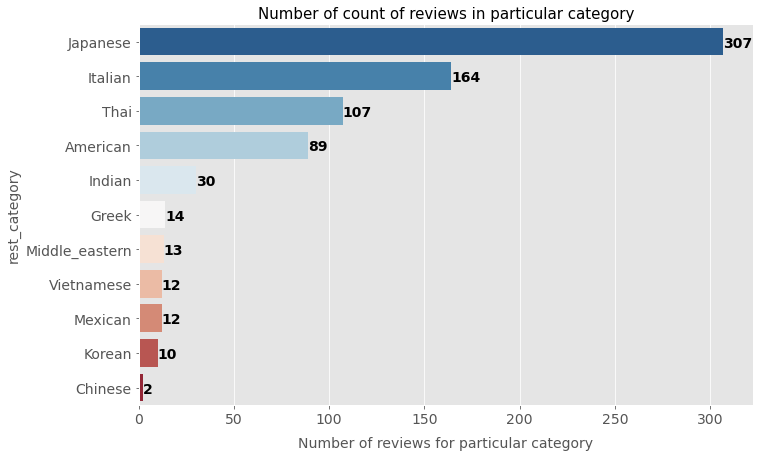

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = df_19103.rest_category.value_counts()
sns.countplot(y='rest_category',data=df_19103, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of reviews for particular category', fontsize=14, labelpad=10)
plt.ylabel('rest_category', fontsize=14)
plt.title('Number of count of reviews in particular category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(df_19103.rest_category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

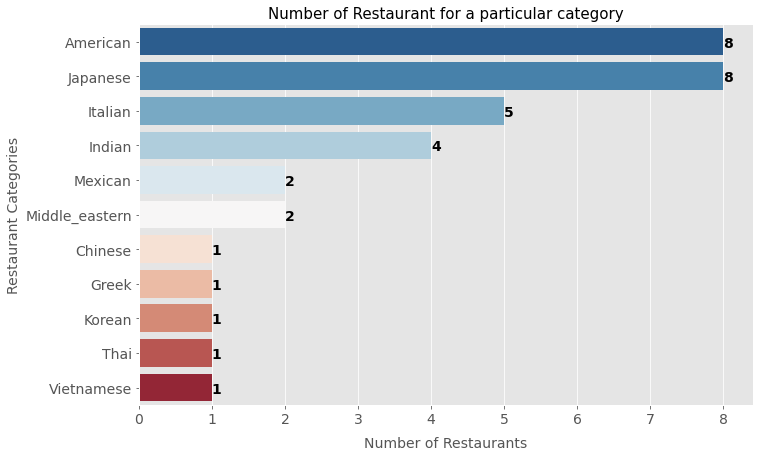

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = df_19103.groupby('rest_category').agg({'name':'nunique'}).sort_values(by='name',ascending=False)
grouped = grouped.reset_index()
sns.barplot(x='name',y='rest_category',data=grouped,orient = 'h',palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of Restaurants', fontsize=14, labelpad=10)
plt.ylabel('Restaurant Categories', fontsize=14)
plt.title('Number of Restaurant for a particular category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped.name):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)


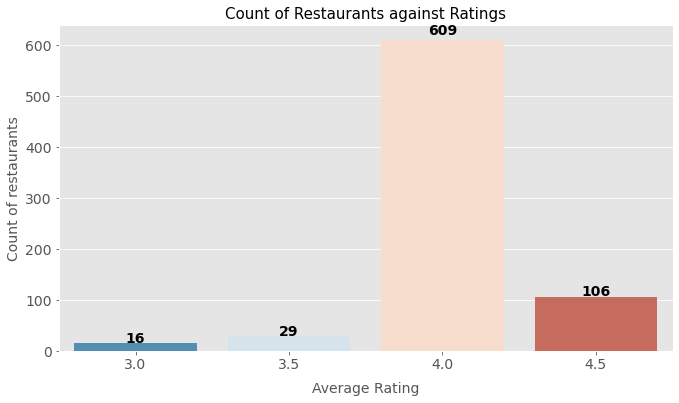

In [38]:
plt.figure(figsize=(11,6))
grouped = df_19103.overall_rest_rating.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In [39]:
df_19103.head(1)

Menu_text         name rest_category  review_stars  \
7  ak  roll  Crazy Sushi      Japanese       5.00000   

                                                text  postal_code  \
7  i like it here its right on my block and the f...        19103   

   overall_rest_rating                                         attributes  \
7              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   

   average_stars    labels  Price_num  \
7        4.83000  positive   15.00000   

                                MenuDescription_text  \
7  shrimp tempura cream cheese and avocado inside...   

                                         Menu_item_2   score Menu_text_copy  \
7  shrimp tempura fried banana mango and spicy cr... 0.81165       ak  roll   

   Price_num_copy  
7        15.00000

# 19107 Analysis 

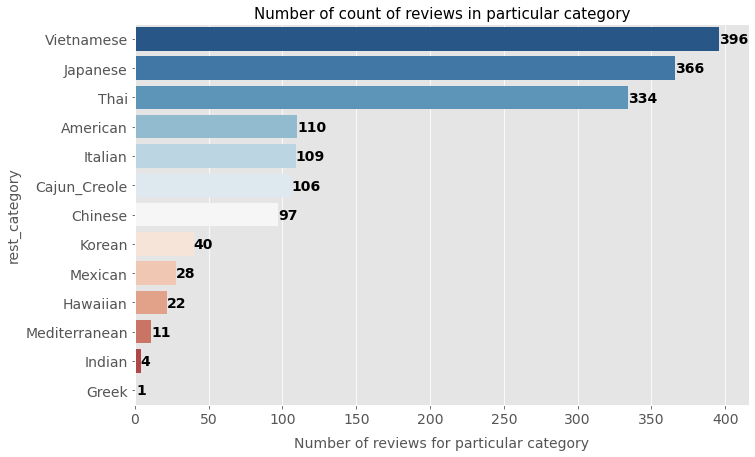

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = df_19107.rest_category.value_counts()
sns.countplot(y='rest_category',data=df_19107, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of reviews for particular category', fontsize=14, labelpad=10)
plt.ylabel('rest_category', fontsize=14)
plt.title('Number of count of reviews in particular category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(df_19107.rest_category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

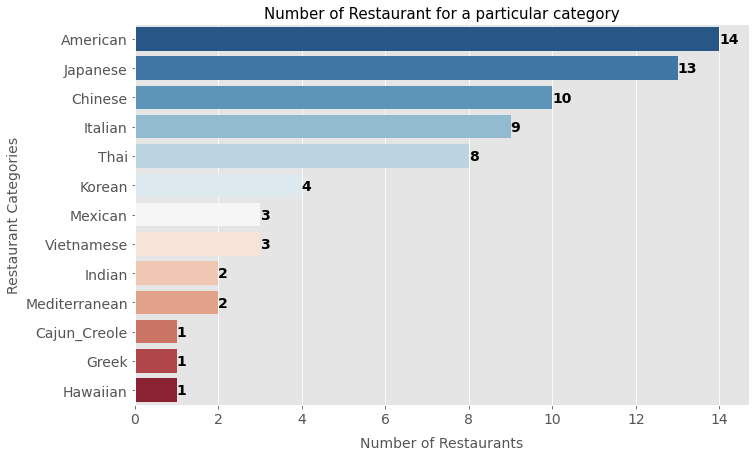

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = df_19107.groupby('rest_category').agg({'name':'nunique'}).sort_values(by='name',ascending=False)
grouped = grouped.reset_index()
sns.barplot(x='name',y='rest_category',data=grouped,orient = 'h',palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of Restaurants', fontsize=14, labelpad=10)
plt.ylabel('Restaurant Categories', fontsize=14)
plt.title('Number of Restaurant for a particular category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped.name):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

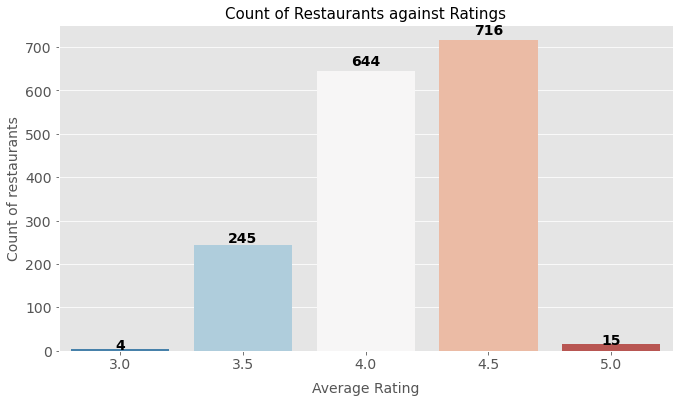

In [42]:
plt.figure(figsize=(11,6))
grouped = df_19107.overall_rest_rating.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# 70130 Analysis

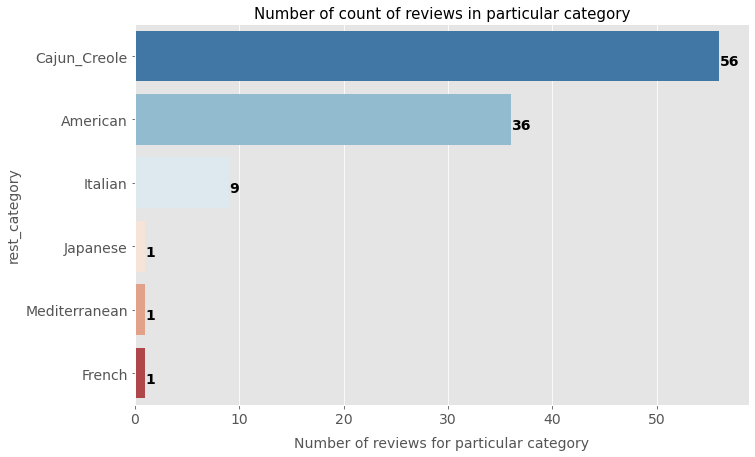

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = df_70130.rest_category.value_counts()
sns.countplot(y='rest_category',data=df_70130, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of reviews for particular category', fontsize=14, labelpad=10)
plt.ylabel('rest_category', fontsize=14)
plt.title('Number of count of reviews in particular category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(df_70130.rest_category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

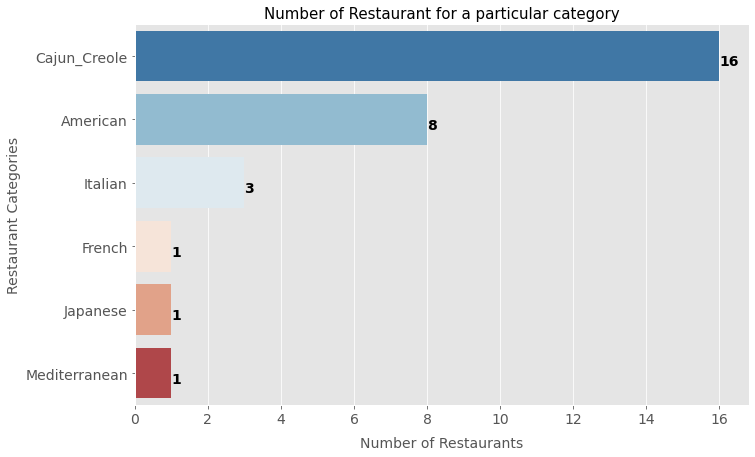

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = df_70130.groupby('rest_category').agg({'name':'nunique'}).sort_values(by='name',ascending=False)
grouped = grouped.reset_index()
sns.barplot(x='name',y='rest_category',data=grouped,orient = 'h',palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of Restaurants', fontsize=14, labelpad=10)
plt.ylabel('Restaurant Categories', fontsize=14)
plt.title('Number of Restaurant for a particular category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped.name):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

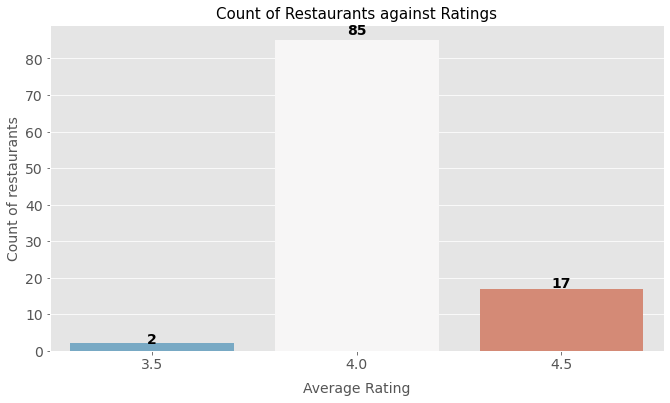

In [45]:
plt.figure(figsize=(11,6))
grouped = df_70130.overall_rest_rating.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# Working on a single Postal code-19107

In [46]:
df_19107.head(2)

Menu_text          name rest_category  review_stars  \
0  aac roll  Kabuki Sushi      Japanese       5.00000   
1     achat        Penang          Thai       5.00000   

                                                text  postal_code  \
0  very pleasant staff    i love to the spicy tun...        19107   
1  penang is a long established and reliable mala...        19107   

   overall_rest_rating                                         attributes  \
0              4.00000  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
1              3.50000  {'RestaurantsPriceRange2': '2', 'BikeParking':...   

   average_stars    labels  Price_num  \
0        5.00000  positive    5.00000   
1        4.50000  positive    6.66667   

                                MenuDescription_text  \
0                     asparagus avocado and cucumber   
1  pickled vegetables in turmeric and spicy herbs...   

                                         Menu_item_2   score Menu_text_copy  \
0                         mango avocado and cucumber 0.81566       aac roll   
1  vegetable pickled in turmeric powder and spicy... 0.95380          achat   

   Price_num_copy  
0         5.00000  
1         6.66667

In [47]:
# What are the top Restaurant categories based on overall restaurant ratings
# overall restaurant ratings is calculated by taking average of all reviews for that restaurant
a = df_19107.groupby('rest_category').agg({'overall_rest_rating':'mean'}).sort_values(by='overall_rest_rating',ascending=False).groupby('rest_category').agg({'overall_rest_rating':'mean'}).sort_values(by='overall_rest_rating',ascending=False).reset_index()
a

rest_category  overall_rest_rating
0      Vietnamese              4.51894
1           Greek              4.50000
2   Mediterranean              4.50000
3         Mexican              4.44643
4        Japanese              4.17350
5         Chinese              4.14948
6          Indian              4.12500
7    Cajun_Creole              4.00000
8        Hawaiian              4.00000
9          Korean              4.00000
10           Thai              3.96557
11        Italian              3.89908
12       American              3.69545

In [48]:
# What are the top Restaurant categories based on filtered review rating basis the number of restaurants in the dataset
alpha = df_19107.groupby('rest_category').agg({'review_stars':'mean','name':'nunique'}).sort_values(by='review_stars',ascending=False).reset_index()
alpha['normalized_score'] = (alpha['name']/alpha['review_stars'])
alpha=alpha.sort_values(by='normalized_score',ascending=False).reset_index(drop=True)
alpha.drop(columns=['name'],inplace=True)
alpha

rest_category  review_stars  normalized_score
0        American       4.92727           2.84133
1        Japanese       4.89617           2.65513
2         Chinese       4.95876           2.01663
3         Italian       4.88073           1.84398
4            Thai       4.95210           1.61548
5          Korean       4.90000           0.81633
6         Mexican       5.00000           0.60000
7      Vietnamese       5.00000           0.60000
8          Indian       5.00000           0.40000
9   Mediterranean       5.00000           0.40000
10       Hawaiian       4.81818           0.20755
11   Cajun_Creole       5.00000           0.20000
12          Greek       5.00000           0.20000

In [49]:
# Order value based on category
b = df_19107.groupby('rest_category').agg({'Price_num':'mean'}).sort_values(by='Price_num',ascending=False).reset_index()
b.rename(columns={'Price_num':'Mean_order_value'},inplace=True)
b

rest_category  Mean_order_value
0    Cajun_Creole          40.16038
1   Mediterranean          19.47397
2          Korean          18.12711
3        Japanese          17.67055
4           Greek          15.42857
5         Chinese          14.72855
6         Italian          13.97790
7        American          13.49853
8        Hawaiian          13.44053
9            Thai          11.93079
10     Vietnamese          11.91727
11        Mexican          10.68405
12         Indian           9.12500

In [50]:
# Order value based on category
beta = df_19107.groupby('rest_category').agg({'Price_num':'min'}).sort_values(by='Price_num',ascending=False).reset_index()
beta.rename(columns={'Price_num':'Minimum_order_value'},inplace=True)
beta

rest_category  Minimum_order_value
0           Greek             15.42857
1    Cajun_Creole             13.00000
2        Hawaiian             12.00000
3   Mediterranean             10.00000
4        American              7.00000
5          Korean              5.50000
6      Vietnamese              5.50000
7         Italian              4.00000
8            Thai              2.73529
9         Chinese              2.00000
10        Mexican              2.00000
11       Japanese              1.95833
12         Indian              1.00000

In [51]:
gamma = df_19107.groupby(['rest_category']).agg({'Menu_text':'nunique'}).sort_values(by='Menu_text',ascending=False).reset_index()
gamma.rename(columns={'Menu_text':'Dish_count'},inplace=True)
gamma

rest_category  Dish_count
0            Thai         158
1        Japanese         129
2        American          80
3      Vietnamese          61
4         Italian          56
5         Chinese          49
6          Korean          28
7    Cajun_Creole          24
8         Mexican          13
9        Hawaiian          10
10  Mediterranean           9
11         Indian           4
12          Greek           1

# Making a master Dataframe for the Code with all required Information

In [52]:
# Make a Master dataframe
df = pd.merge(a,alpha, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,b, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,beta, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,gamma, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = df.sort_values(by=['normalized_score','Dish_count'],ascending=False)
df

rest_category  overall_rest_rating  review_stars  normalized_score  \
12       American              3.69545       4.92727           2.84133   
4        Japanese              4.17350       4.89617           2.65513   
5         Chinese              4.14948       4.95876           2.01663   
11        Italian              3.89908       4.88073           1.84398   
10           Thai              3.96557       4.95210           1.61548   
9          Korean              4.00000       4.90000           0.81633   
0      Vietnamese              4.51894       5.00000           0.60000   
3         Mexican              4.44643       5.00000           0.60000   
2   Mediterranean              4.50000       5.00000           0.40000   
6          Indian              4.12500       5.00000           0.40000   
8        Hawaiian              4.00000       4.81818           0.20755   
7    Cajun_Creole              4.00000       5.00000           0.20000   
1           Greek              4.50000       5.00000           0.20000   

    Mean_order_value  Minimum_order_value  Dish_count  
12          13.49853              7.00000          80  
4           17.67055              1.95833         129  
5           14.72855              2.00000          49  
11          13.97790              4.00000          56  
10          11.93079              2.73529         158  
9           18.12711              5.50000          28  
0           11.91727              5.50000          61  
3           10.68405              2.00000          13  
2           19.47397             10.00000           9  
6            9.12500              1.00000           4  
8           13.44053             12.00000          10  
7           40.16038             13.00000          24  
1           15.42857             15.42857           1

# Word Cloud Of Most Sold Dishes

In [53]:
# for word cloud
from PIL import Image
from wordcloud import WordCloud 

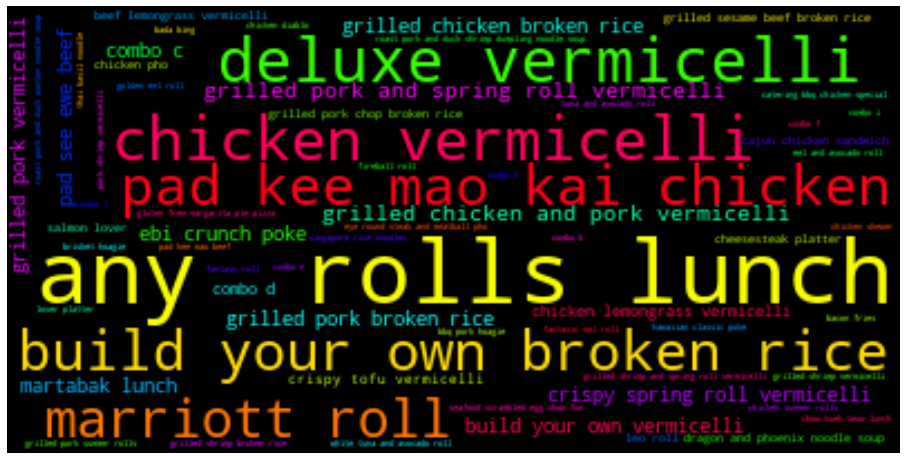

In [54]:
from collections import Counter
dictionary=Counter(df_19107.Menu_text)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv",contour_color = "firebrick").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Making the Menu 

In [55]:
# Make a Menu of Know items
# Map menu item

def f(x):
    if any(word in x for word in ['roll','wrap']):
        return('Rolls & Wraps')
    elif 'salad' in x :
        return('Salads')
    elif any(word in x for word in ['ramen','noodles','pasta','macaroni']):
        return('Snacks')
    elif any(word in x for word in ['brunch','sandwich','hoagie','omelette','pancakes']):
        return('Breakfast')
    elif any(word in x for word in ['lunch','croquettes']):
        return('Lunch')
    elif any(word in x for word in ['fries','burger','ricotta','pizza']):
        return('Fries, Burger & Pizza')
    elif any(word in x for word in ['soup','tea','coffee','wine','smoothie','tequilas' ]):
        return('Drinks')
    elif any(word in x for word in ['icecream','waffles']):
        return('Desserts')
    else:
        return('Dinner')
    
df_19107['Menu_category'] =  df_19107['Menu_text'].apply(f) 
df_19107['Menu_category'].value_counts(dropna=False)
# df_19107.head(30)

Dinner                   951
Rolls & Wraps            326
Drinks                   112
Lunch                     86
Breakfast                 63
Snacks                    38
Salads                    33
Fries, Burger & Pizza     13
Desserts                   2
Name: Menu_category, dtype: int64

In [56]:
df_agg = df_19107.groupby(['Menu_category','Menu_text']).agg({'Menu_text':'count','Price_num':'mean'}).rename(columns={'Menu_text':'count','Price_num':'Price_num_mean'}).reset_index()
g = df_agg[['Menu_category','Menu_text','Price_num_mean','count']].groupby('Menu_category', group_keys=False)
final_menu = g.head(12).reset_index()
final_menu.drop(columns=['index'],inplace=True)
final_menu
################################ Done #######################

Menu_category                                 Menu_text  \
0               Breakfast                      adana kebab sandwich   
1               Breakfast                           bbq pork hoagie   
2               Breakfast                            brisket hoagie   
3               Breakfast                     build your own hoagie   
4               Breakfast                    cajun chicken sandwich   
5               Breakfast              cheese steak omelette brunch   
6               Breakfast                        cheesesteak hoagie   
7               Breakfast                chicken cheesesteak hoagie   
8               Breakfast              chicken cheesesteak sandwich   
9               Breakfast                  chicken sandwich package   
10              Breakfast              chicken veggie melt sandwich   
11              Breakfast                             coop sandwich   
12               Desserts                       chicken and waffles   
13               Desserts                     waffles and ice cream   
14                 Dinner                                     achat   
15                 Dinner                            aged tofu poke   
16                 Dinner                         alligator sausage   
17                 Dinner                        american breakfast   
18                 Dinner                            american sushi   
19                 Dinner            aromatic mixed platter  flavor   
20                 Dinner                              arroz blanco   
21                 Dinner                       arroz con camarones   
22                 Dinner                                asam laksa   
23                 Dinner                                bacon tots   
24                 Dinner                                 bada bing   
25                 Dinner                  banana leaf chicken wing   
26                 Drinks                            beef dubu soup   
27                 Drinks                       berry good smoothie   
28                 Drinks                  braised beef noodle soup   
29                 Drinks  braised beef shrimp dumpling noodle soup   
30                 Drinks           braised beef wonton noodle soup   
31                 Drinks               buffalo chicken cheesesteak   
32                 Drinks                  chargrilled ribeye steak   
33                 Drinks                       cheesesteak platter   
34                 Drinks            dragon and phoenix noodle soup   
35                 Drinks           eye round steak and brisket pho   
36                 Drinks          eye round steak and meatball pho   
37                 Drinks                       eye round steak pho   
38  Fries, Burger & Pizza                               bacon fries   
39  Fries, Burger & Pizza                           barbuzzo burger   
40  Fries, Burger & Pizza                             buffalo fries   
41  Fries, Burger & Pizza                         california burger   
42  Fries, Burger & Pizza                chicken fingers with fries   
43  Fries, Burger & Pizza                     sheryls salmon burger   
44  Fries, Burger & Pizza                   turkey and grain burger   
45                  Lunch                   asam laksa noodle lunch   
46                  Lunch                banana leaf pad thai lunch   
47                  Lunch              banana leaf young tofu lunch   
48                  Lunch               beef broccoli lunch special   
49                  Lunch                       beef chow fun lunch   
50                  Lunch          beef with scallion lunch special   
51                  Lunch            chicken broccoli lunch special   
52                  Lunch                      chow kueh teow lunch   
53                  Lunch                         cumin style lunch   
54                  Lunch                 double cooked style lunch   
55                  Lunch           

In [57]:
df_agg = df_19107.groupby(['Menu_category','Menu_text']).agg({'Menu_text':'count','Price_num':'mean'})
g = df_agg[['Menu_text','Price_num']].groupby('Menu_category', group_keys=False)
final_menu = g.head(12)
final_menu

Menu_text  \
Menu_category         Menu_text                                             
Breakfast             adana kebab sandwich                              2   
                      bbq pork hoagie                                   6   
                      brisket hoagie                                    6   
                      build your own hoagie                             4   
                      cajun chicken sandwich                            9   
                      cheese steak omelette brunch                      2   
                      cheesesteak hoagie                                2   
                      chicken cheesesteak hoagie                        1   
                      chicken cheesesteak sandwich                      1   
                      chicken sandwich package                          1   
                      chicken veggie melt sandwich                      1   
                      coop sandwich                                     1   
Desserts              chicken and waffles                               1   
                      waffles and ice cream                             1   
Dinner                achat                                             1   
                      aged tofu poke                                    1   
                      alligator sausage                                 1   
                      american breakfast                                1   
                      american sushi                                    2   
                      aromatic mixed platter  flavor                    1   
                      arroz blanco                                      1   
                      arroz con camarones                               1   
                      asam laksa                                        2   
                      bacon tots                                        2   
                      bada bing                                         8   
                      banana leaf chicken wing                          1   
Drinks                beef dubu soup                                    4   
                      berry good smoothie                               3   
                      braised beef noodle soup                          1   
                      braised beef shrimp dumpling noodle soup          5   
                      braised beef wonton noodle soup                   3   
                      buffalo chicken cheesesteak                       1   
                      chargrilled ribeye steak                          1   
                      cheesesteak platter                              10   
                      dragon and phoenix noodle soup                    9   
                      eye round steak and brisket pho                   3   
                      eye round steak and meatball pho                  9   
                      eye round steak pho                               5   
Fries, Burger & Pizza bacon fries                                       6   
                      barbuzzo burger                                   1   
                      buffalo fries                                     2   
                      california burger                                 1   
                      chicken fingers with fries                        1   
                      sheryls salmon burger                             1   
                      turkey and grain burger                           1   
Lunch                 asam laksa noodle lunch                           1   
                      banana leaf pad thai lunch                        1   
                      banana leaf young tofu lunch                      2   
                      beef broccoli lunch special                       1   
                      beef chow fun lunch                               4   
                      beef with scallion lunch special      

In [58]:
# df_19107.to_csv('Mltraining.csv',index=False)
# df_19103.to_csv('Mltraining2.csv',index=False)
# df_70130.to_csv('Mltraining3.csv',index=False)

In [60]:
1) Top 10 popular restaurant categories in that pin code based on review count 
2) Top 10 popular restaurant categories in that pin code based on overall ratings normalized by the number of reviews
3) Minimum order value for the restaurant category
4) Word Cloud Of most ordered stuff
4) Make a single menu out based on best category(American) based on reviews

In [ ]:
########################################## Thank You #################################################

# Work On 19103

In [62]:
df_19103.head(2)

Menu_text         name rest_category  review_stars  \
7  ak  roll  Crazy Sushi      Japanese       5.00000   
8  ak  roll  Crazy Sushi      Japanese       5.00000   

                                                text  postal_code  \
7  i like it here its right on my block and the f...        19103   
8  i like it here its right on my block and the f...        19103   

   overall_rest_rating                                         attributes  \
7              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   
8              4.00000  {'RestaurantsPriceRange2': '2', 'NoiseLevel': ...   

   average_stars    labels  Price_num  \
7        4.83000  positive   15.00000   
8        4.83000  positive   15.00000   

                                MenuDescription_text  \
7  shrimp tempura cream cheese and avocado inside...   
8  shrimp tempura cream cheese and avocado inside...   

                                         Menu_item_2   score Menu_text_copy  \
7  shrimp tempura fried banana mango and spicy cr... 0.81165       ak  roll   
8  shrimp tempura spicy crunchy tuna crunchy lobs... 0.85094       ak  roll   

   Price_num_copy  
7        15.00000  
8        15.00000

In [63]:
# What are the top Restaurant categories based on overall restaurant ratings
# overall restaurant ratings is calculated by taking average of all reviews for that restaurant
a = df_19103.groupby('rest_category').agg({'overall_rest_rating':'mean'}).sort_values(by='overall_rest_rating',ascending=False).groupby('rest_category').agg({'overall_rest_rating':'mean'}).sort_values(by='overall_rest_rating',ascending=False).reset_index()
a

rest_category  overall_rest_rating
0         Japanese              4.12378
1   Middle_eastern              4.11538
2          Italian              4.04268
3           Indian              4.03333
4          Chinese              4.00000
5            Greek              4.00000
6           Korean              4.00000
7          Mexican              4.00000
8             Thai              4.00000
9       Vietnamese              4.00000
10        American              3.71910

In [64]:
# What are the top Restaurant categories based on filtered review rating basis the number of restaurants in the dataset
alpha = df_19103.groupby('rest_category').agg({'review_stars':'mean','name':'nunique'}).sort_values(by='review_stars',ascending=False).reset_index()
alpha['normalized_score'] = (alpha['name']/alpha['review_stars'])
alpha=alpha.sort_values(by='normalized_score',ascending=False).reset_index(drop=True)
alpha.drop(columns=['name'],inplace=True)
alpha

rest_category  review_stars  normalized_score
0         Japanese       4.82410           1.65834
1         American       4.87640           1.64055
2          Italian       4.62195           1.08179
3           Indian       4.90000           0.81633
4          Mexican       4.58333           0.43636
5   Middle_eastern       5.00000           0.40000
6             Thai       4.90654           0.20381
7            Greek       4.92857           0.20290
8          Chinese       5.00000           0.20000
9           Korean       5.00000           0.20000
10      Vietnamese       5.00000           0.20000

In [65]:
# Mean Order value based on category
b = df_19103.groupby('rest_category').agg({'Price_num':'mean'}).sort_values(by='Price_num',ascending=False).reset_index()
b.rename(columns={'Price_num':'Mean_order_value'},inplace=True)
b


rest_category  Mean_order_value
0         Japanese          18.77712
1   Middle_eastern          16.09402
2           Korean          15.96528
3           Indian          15.53889
4          Chinese          15.50000
5          Italian          14.51884
6       Vietnamese          12.95480
7            Greek          12.75959
8             Thai          10.49318
9         American          10.03371
10         Mexican           9.25000

In [66]:
# Minimum Order value based on category
beta = df_19103.groupby('rest_category').agg({'Price_num':'min'}).sort_values(by='Price_num',ascending=False).reset_index()
beta.rename(columns={'Price_num':'Minimum_order_value'},inplace=True)
beta

rest_category  Minimum_order_value
0          Chinese             15.00000
1       Vietnamese             12.45759
2           Korean             11.37500
3   Middle_eastern             10.00000
4         American              5.00000
5            Greek              5.00000
6           Indian              5.00000
7         Japanese              5.00000
8          Mexican              4.00000
9             Thai              3.00000
10         Italian              1.00000

In [68]:
# Number of Dishes Category wise
gamma = df_19103.groupby(['rest_category']).agg({'Menu_text':'nunique'}).sort_values(by='Menu_text',ascending=False).reset_index()
gamma.rename(columns={'Menu_text':'Dish_count'},inplace=True)
gamma

rest_category  Dish_count
0         Japanese         144
1          Italian          87
2             Thai          48
3         American          41
4           Indian          21
5            Greek          12
6          Mexican          12
7   Middle_eastern           8
8       Vietnamese           7
9          Chinese           2
10          Korean           2

In [69]:
# Make a Master dataframe
df = pd.merge(a,alpha, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,b, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,beta, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,gamma, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = df.sort_values(by=['normalized_score','Dish_count'],ascending=False)
df

rest_category  overall_rest_rating  review_stars  normalized_score  \
0         Japanese              4.12378       4.82410           1.65834   
10        American              3.71910       4.87640           1.64055   
2          Italian              4.04268       4.62195           1.08179   
3           Indian              4.03333       4.90000           0.81633   
7          Mexican              4.00000       4.58333           0.43636   
1   Middle_eastern              4.11538       5.00000           0.40000   
8             Thai              4.00000       4.90654           0.20381   
5            Greek              4.00000       4.92857           0.20290   
9       Vietnamese              4.00000       5.00000           0.20000   
4          Chinese              4.00000       5.00000           0.20000   
6           Korean              4.00000       5.00000           0.20000   

    Mean_order_value  Minimum_order_value  Dish_count  
0           18.77712              5.00000         144  
10          10.03371              5.00000          41  
2           14.51884              1.00000          87  
3           15.53889              5.00000          21  
7            9.25000              4.00000          12  
1           16.09402             10.00000           8  
8           10.49318              3.00000          48  
5           12.75959              5.00000          12  
9           12.95480             12.45759           7  
4           15.50000             15.00000           2  
6           15.96528             11.37500           2

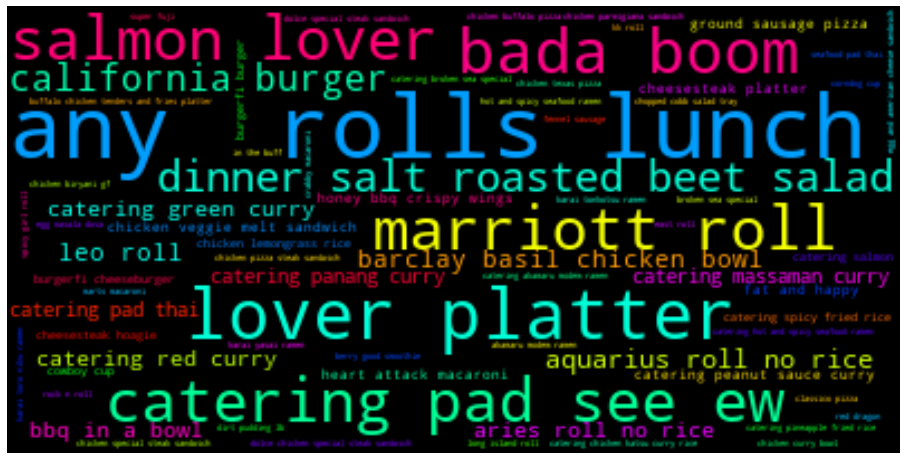

In [70]:
from collections import Counter
dictionary=Counter(df_19103.Menu_text)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv",contour_color = "firebrick").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
# Make a Menu of Know items
# Map menu item

def f(x):
    if any(word in x for word in ['roll','wrap']):
        return('Rolls & Wraps')
    elif 'salad' in x :
        return('Salads')
    elif any(word in x for word in ['ramen','noodles','pasta','macaroni']):
        return('Snacks')
    elif any(word in x for word in ['brunch','sandwich','hoagie','omelette','pancakes']):
        return('Breakfast')
    elif any(word in x for word in ['lunch','croquettes']):
        return('Lunch')
    elif any(word in x for word in ['fries','burger','ricotta','pizza']):
        return('Fries, Burger & Pizza')
    elif any(word in x for word in ['soup','tea','coffee','wine','smoothie','tequilas' ]):
        return('Drinks')
    elif any(word in x for word in ['icecream','waffles']):
        return('Desserts')
    else:
        return('Dinner')

df_19103['Menu_category'] =  df_19103['Menu_text'].apply(f) 
df_19103['Menu_category'].value_counts(dropna=False)

Dinner                   339
Rolls & Wraps            156
Fries, Burger & Pizza     87
Snacks                    67
Breakfast                 47
Salads                    31
Drinks                    28
Lunch                      5
Name: Menu_category, dtype: int64

In [75]:
df_agg = df_19103.groupby(['Menu_category','Menu_text']).agg({'Menu_text':'count','Price_num':'mean'}).rename(columns={'Menu_text':'count','Price_num':'Price_num_mean'}).reset_index()
g = df_agg[['Menu_category','Menu_text','Price_num_mean','count']].groupby('Menu_category', group_keys=False)
final_menu = g.head(12).reset_index()
final_menu.drop(columns=['index'],inplace=True)
final_menu

Menu_category                                  Menu_text  \
0               Breakfast                     cajun chicken sandwich   
1               Breakfast                         cheesesteak hoagie   
2               Breakfast                       cheesesteak sandwich   
3               Breakfast                chicken parmigiana sandwich   
4               Breakfast                     chicken pesto sandwich   
5               Breakfast               chicken pizza steak sandwich   
6               Breakfast             chicken special steak sandwich   
7               Breakfast                     chicken steak sandwich   
8               Breakfast               chicken veggie melt sandwich   
9               Breakfast       dolce chicken special steak sandwich   
10              Breakfast               dolce special steak sandwich   
11              Breakfast           egg and american cheese sandwich   
12                 Dinner                                   aka buns   
13                 Dinner                          alligator sausage   
14                 Dinner                                  aloo saag   
15                 Dinner                american wagyu beef hot dog   
16                 Dinner                                   animo md   
17                 Dinner                             apollo chicken   
18                 Dinner                                  apple pie   
19                 Dinner                              avocado crudo   
20                 Dinner                                  bada boom   
21                 Dinner                            bang bang tacos   
22                 Dinner                            bangkok chicken   
23                 Dinner                 barclay basil chicken bowl   
24                 Drinks                            avgolemono soup   
25                 Drinks                        berry good smoothie   
26                 Drinks                 build your own noodle soup   
27                 Drinks                           camaron tequilas   
28                 Drinks              catering chicken coconut soup   
29                 Drinks           catering chicken lemongrass soup   
30                 Drinks                         catering fruit tea   
31                 Drinks               catering shrimp coconut soup   
32                 Drinks            catering shrimp lemongrass soup   
33                 Drinks                       cheese steak paninis   
34                 Drinks                        cheesesteak platter   
35                 Drinks                           cheesesteak tray   
36  Fries, Burger & Pizza                               bacon burger   
37  Fries, Burger & Pizza                                bacon fries   
38  Fries, Burger & Pizza                     barbecue chicken pizza   
39  Fries, Burger & Pizza  buffalo chicken tenders and fries platter   
40  Fries, Burger & Pizza                              buffalo fries   
41  Fries, Burger & Pizza                            burgerfi burger   
42  Fries, Burger & Pizza                      burgerfi cheeseburger   
43  Fries, Burger & Pizza                         burgerfi jr burger   
44  Fries, Burger & Pizza                   burgerfi jr cheeseburger   
45  Fries, Burger & Pizza                          california burger   
46  Fries, Burger & Pizza                         cheeseburgers tray   
47  Fries, Burger & Pizza                      chicken buffalo pizza   
48                  Lunch                        beef chow fun lunch   
49                  Lunch                             chirashi lunch   
50                  Lunch                       lunch seafood bisque   
51                  Lunch        spicy thai chicken rice combo lunch   
52          Rolls & Wraps                                   ak  roll   
53          Rolls & Wraps                           any  rolls lunch   
54          Rolls & Wraps                      aquar

In [76]:
df_agg = df_19103.groupby(['Menu_category','Menu_text']).agg({'Menu_text':'count','Price_num':'mean'})
g = df_agg[['Menu_text','Price_num']].groupby('Menu_category', group_keys=False)
final_menu = g.head(12)
final_menu

Menu_text  \
Menu_category         Menu_text                                              
Breakfast             cajun chicken sandwich                             1   
                      cheesesteak hoagie                                 4   
                      cheesesteak sandwich                               2   
                      chicken parmigiana sandwich                        3   
                      chicken pesto sandwich                             1   
                      chicken pizza steak sandwich                       3   
                      chicken special steak sandwich                     3   
                      chicken steak sandwich                             1   
                      chicken veggie melt sandwich                       6   
                      dolce chicken special steak sandwich               4   
                      dolce special steak sandwich                       4   
                      egg and american cheese sandwich                   3   
Dinner                aka buns                                           1   
                      alligator sausage                                  1   
                      aloo saag                                          2   
                      american wagyu beef hot dog                        2   
                      animo md                                           1   
                      apollo chicken                                     1   
                      apple pie                                          1   
                      avocado crudo                                      1   
                      bada boom                                         10   
                      bang bang tacos                                    1   
                      bangkok chicken                                    1   
                      barclay basil chicken bowl                         7   
Drinks                avgolemono soup                                    1   
                      berry good smoothie                                3   
                      build your own noodle soup                         2   
                      camaron tequilas                                   1   
                      catering chicken coconut soup                      2   
                      catering chicken lemongrass soup                   1   
                      catering fruit tea                                 1   
                      catering shrimp coconut soup                       2   
                      catering shrimp lemongrass soup                    1   
                      cheese steak paninis                               1   
                      cheesesteak platter                                5   
                      cheesesteak tray                                   1   
Fries, Burger & Pizza bacon burger                                       1   
                      bacon fries                                        1   
                      barbecue chicken pizza                             2   
                      buffalo chicken tenders and fries platter          3   
                      buffalo fries                                      1   
                      burgerfi burger                                    4   
                      burgerfi cheeseburger                              4   
                      burgerfi jr burger                                 2   
                      burgerfi jr cheeseburger                           1   
                      california burger                                  8   
                      cheeseburgers tray                                 2   
                      chicken buffalo pizza                              3   
Lunch                 beef chow fun lunch                                1   
                      chirashi lunch                                     2   
         

# Working on 70130

In [77]:
df_70130.head(2)

Menu_text                 name rest_category  review_stars  \
2   acme special poboy    Acme Oyster House  Cajun_Creole       5.00000   
23    alligator omelet  Daisy Dukes Express  Cajun_Creole       5.00000   

                                                 text  postal_code  \
2   there seems to be a lot of acme haters out the...        70130   
23  food and coffe were fantastic made this our sp...        70130   

    overall_rest_rating                                         attributes  \
2               4.00000  {'RestaurantsTakeOut': 'True', 'Alcohol': "'fu...   
23              4.00000  {'HasTV': 'True', 'RestaurantsAttire': "u'casu...   

    average_stars    labels  Price_num  \
2         5.00000  positive   13.00000   
23        5.00000  positive   12.00000   

                                 MenuDescription_text  \
2   hot debrisstyle roast beef ham turkey american...   
23  with cheese alligator sausage onion parsley to...   

                                          Menu_item_2   score  \
2        roast beef debris ham and turkey with cheese 0.84034   
23  with cheese hot sausage onion parsley tomato p... 0.93609   

        Menu_text_copy  Price_num_copy  
2   acme special poboy        13.00000  
23    alligator omelet        12.00000

In [78]:
# What are the top Restaurant categories based on overall restaurant ratings
# overall restaurant ratings is calculated by taking average of all reviews for that restaurant
a = df_70130.groupby('rest_category').agg({'overall_rest_rating':'mean'}).sort_values(by='overall_rest_rating',ascending=False).groupby('rest_category').agg({'overall_rest_rating':'mean'}).sort_values(by='overall_rest_rating',ascending=False).reset_index()
a

rest_category  overall_rest_rating
0       Japanese              4.50000
1  Mediterranean              4.50000
2       American              4.16667
3        Italian              4.05556
4   Cajun_Creole              4.00000
5         French              4.00000

In [79]:
# What are the top Restaurant categories based on filtered review rating basis the number of restaurants in the dataset
alpha = df_70130.groupby('rest_category').agg({'review_stars':'mean','name':'nunique'}).sort_values(by='review_stars',ascending=False).reset_index()
alpha['normalized_score'] = (alpha['name']/alpha['review_stars'])
alpha=alpha.sort_values(by='normalized_score',ascending=False).reset_index(drop=True)
alpha.drop(columns=['name'],inplace=True)
alpha

rest_category  review_stars  normalized_score
0   Cajun_Creole       4.94643           3.23466
1       American       5.00000           1.60000
2        Italian       5.00000           0.60000
3         French       5.00000           0.20000
4       Japanese       5.00000           0.20000
5  Mediterranean       5.00000           0.20000

In [80]:
# Mean Order value based on category
b = df_70130.groupby('rest_category').agg({'Price_num':'mean'}).sort_values(by='Price_num',ascending=False).reset_index()
b.rename(columns={'Price_num':'Mean_order_value'},inplace=True)
b

rest_category  Mean_order_value
0         French          48.00000
1  Mediterranean          17.77778
2   Cajun_Creole          15.89733
3       American          13.12411
4        Italian          11.57226
5       Japanese           9.01802

In [81]:
# Minimum Order value based on category
beta = df_70130.groupby('rest_category').agg({'Price_num':'min'}).sort_values(by='Price_num',ascending=False).reset_index()
beta.rename(columns={'Price_num':'Minimum_order_value'},inplace=True)
beta

rest_category  Minimum_order_value
0         French             48.00000
1  Mediterranean             17.77778
2        Italian             10.03636
3       Japanese              9.01802
4       American              6.00000
5   Cajun_Creole              1.00000

In [82]:
# Number of Dishes
gamma = df_70130.groupby(['rest_category']).agg({'Menu_text':'nunique'}).sort_values(by='Menu_text',ascending=False).reset_index()
gamma.rename(columns={'Menu_text':'Dish_count'},inplace=True)
gamma

rest_category  Dish_count
0   Cajun_Creole          43
1       American          28
2        Italian           3
3         French           1
4       Japanese           1
5  Mediterranean           1

In [83]:
# Make a Master dataframe
df = pd.merge(a,alpha, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,b, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,beta, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = pd.merge(df,gamma, how='left', left_on=['rest_category'], right_on = ['rest_category'])
df = df.sort_values(by=['normalized_score','Dish_count'],ascending=False)
df

rest_category  overall_rest_rating  review_stars  normalized_score  \
4   Cajun_Creole              4.00000       4.94643           3.23466   
2       American              4.16667       5.00000           1.60000   
3        Italian              4.05556       5.00000           0.60000   
0       Japanese              4.50000       5.00000           0.20000   
1  Mediterranean              4.50000       5.00000           0.20000   
5         French              4.00000       5.00000           0.20000   

   Mean_order_value  Minimum_order_value  Dish_count  
4          15.89733              1.00000          43  
2          13.12411              6.00000          28  
3          11.57226             10.03636           3  
0           9.01802              9.01802           1  
1          17.77778             17.77778           1  
5          48.00000             48.00000           1

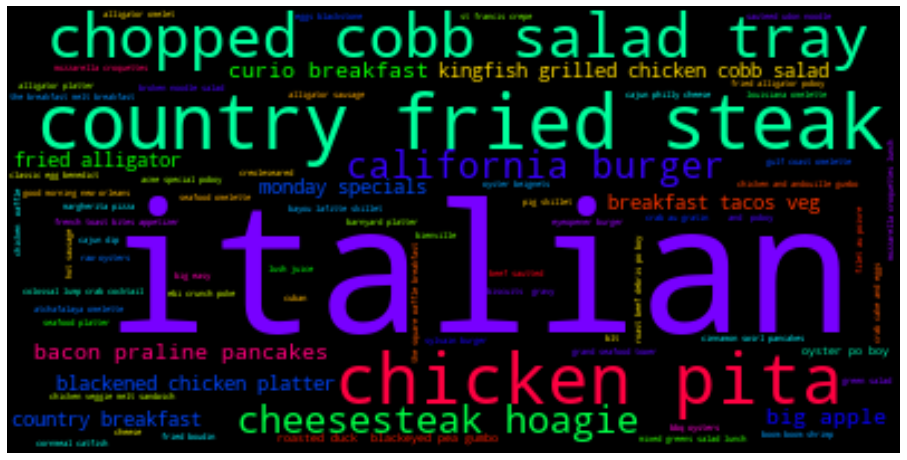

In [84]:
from collections import Counter
dictionary=Counter(df_70130.Menu_text)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv",contour_color = "firebrick").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
# Make a Menu of Know items
# Map menu item

def f(x):
    if any(word in x for word in ['roll','wrap']):
        return('Rolls & Wraps')
    elif 'salad' in x :
        return('Salads')
    elif any(word in x for word in ['ramen','noodles','pasta','macaroni']):
        return('Snacks')
    elif any(word in x for word in ['brunch','sandwich','hoagie','omelette','pancakes']):
        return('Breakfast')
    elif any(word in x for word in ['lunch','croquettes']):
        return('Lunch')
    elif any(word in x for word in ['fries','burger','ricotta','pizza']):
        return('Fries, Burger & Pizza')
    elif any(word in x for word in ['soup','tea','coffee','wine','smoothie','tequilas']):
        return('Drinks')
    elif any(word in x for word in ['icecream','waffles']):
        return('Desserts')
    else:
        return('Dinner')

df_70130['Menu_category'] =  df_70130['Menu_text'].apply(f) 
df_70130['Menu_category'].value_counts(dropna=False)

Dinner                   74
Breakfast                10
Salads                    8
Fries, Burger & Pizza     5
Drinks                    5
Lunch                     2
Name: Menu_category, dtype: int64

In [89]:
df_agg = df_70130.groupby(['Menu_category','Menu_text']).agg({'Menu_text':'count','Price_num':'mean'}).rename(columns={'Menu_text':'count','Price_num':'Price_num_mean'}).reset_index()
g = df_agg[['Menu_category','Menu_text','Price_num_mean','count']].groupby('Menu_category', group_keys=False)
final_menu = g.head(12).reset_index()
final_menu.drop(columns=['index'],inplace=True)
final_menu   

Menu_category                            Menu_text  \
0               Breakfast                 atchafalaya omelette   
1               Breakfast               bacon praline pancakes   
2               Breakfast                   cheesesteak hoagie   
3               Breakfast         chicken veggie melt sandwich   
4               Breakfast              cinnamon swirl pancakes   
5               Breakfast                  gulf coast omelette   
6               Breakfast                   louisiana omelette   
7               Breakfast                     seafood omelette   
8                  Dinner                   acme special poboy   
9                  Dinner                     alligator omelet   
10                 Dinner                    alligator platter   
11                 Dinner                    alligator sausage   
12                 Dinner                           and  poboy   
13                 Dinner                     barnyard platter   
14                 Dinner                bayou lafitte skillet   
15                 Dinner                          bbq oysters   
16                 Dinner                         beef sautted   
17                 Dinner                            bienville   
18                 Dinner                            big apple   
19                 Dinner                             big easy   
20                 Drinks                  country fried steak   
21  Fries, Burger & Pizza                    california burger   
22  Fries, Burger & Pizza                     eyeopener burger   
23  Fries, Burger & Pizza                     margherita pizza   
24  Fries, Burger & Pizza                       sylvain burger   
25                  Lunch                mozzarella croquettes   
26                  Lunch          mozzarella croquettes lunch   
27                 Salads                  broken noodle salad   
28                 Salads              chopped cobb salad tray   
29                 Salads                          green salad   
30                 Salads  kingfish grilled chicken cobb salad   
31                 Salads             mixed greens salad lunch   

    Price_num_mean  count  
0         14.00000      1  
1         13.00000      2  
2         10.75000      2  
3         11.50000      1  
4         13.00000      1  
5         13.00000      1  
6         16.00000      1  
7          3.00000      1  
8         13.00000      1  
9         12.00000      1  
10        18.00000      1  
11        14.00000      1  
12        16.00000      1  
13        10.00000      1  
14        14.00000      1  
15         1.00000      1  
16        17.77778      1  
17        16.00000      1  
18        10.00000      2  
19        10.00000      1  
20        10.00000      5  
21        10.61667      2  
22        18.00000      1  
23        17.65190      1  
24        17.00000      1  
25        13.00000      1  
26        13.00000      1  
27        14.00000      1  
28        14.50000      3  
29         9.01802      1  
30        18.00000      2  
31         9.00000      1

In [90]:
df_agg = df_70130.groupby(['Menu_category','Menu_text']).agg({'Menu_text':'count','Price_num':'mean'})
g = df_agg[['Menu_text','Price_num']].groupby('Menu_category', group_keys=False)
final_menu = g.head(12)
final_menu

Menu_text  \
Menu_category         Menu_text                                        
Breakfast             atchafalaya omelette                         1   
                      bacon praline pancakes                       2   
                      cheesesteak hoagie                           2   
                      chicken veggie melt sandwich                 1   
                      cinnamon swirl pancakes                      1   
                      gulf coast omelette                          1   
                      louisiana omelette                           1   
                      seafood omelette                             1   
Dinner                acme special poboy                           1   
                      alligator omelet                             1   
                      alligator platter                            1   
                      alligator sausage                            1   
                      and  poboy                                   1   
                      barnyard platter                             1   
                      bayou lafitte skillet                        1   
                      bbq oysters                                  1   
                      beef sautted                                 1   
                      bienville                                    1   
                      big apple                                    2   
                      big easy                                     1   
Drinks                country fried steak                          5   
Fries, Burger & Pizza california burger                            2   
                      eyeopener burger                             1   
                      margherita pizza                             1   
                      sylvain burger                               1   
Lunch                 mozzarella croquettes                        1   
                      mozzarella croquettes lunch                  1   
Salads                broken noodle salad                          1   
                      chopped cobb salad tray                      3   
                      green salad                                  1   
                      kingfish grilled chicken cobb salad          2   
                      mixed greens salad lunch                     1   

                                                           Price_num  
Menu_category         Menu_text                                       
Breakfast             atchafalaya omelette                  14.00000  
                      bacon praline pancakes                13.00000  
                      cheesesteak hoagie                    10.75000  
                      chicken veggie melt sandwich          11.50000  
                      cinnamon swirl pancakes               13.00000  
                      gulf coast omelette                   13.00000  
                      louisiana omelette                    16.00000  
                      seafood omelette                       3.00000  
Dinner                acme special poboy                    13.00000  
                      alligator omelet                      12.00000  
                      alligator platter                     18.00000  
                      alligator sausage                     14.00000  
                      and  poboy                            16.00000  
                      barnyard platter                      10.00000  
                      bayou lafitte skillet                 14.00000  
                      bbq oysters                            1.00000  
                      beef sautted                          17.77778  
                      bienville                             16.00000  
                      big apple                             10.00000  
                      big easy                              10.00000  
Drinks                country fried steak       

In [ ]:
######################################### THANK YOU ##################################################